# Questions
What variables determine the value of any homes a builder plans to construct so that they can maximize return from their investment?
Choose one variable to explore in depth as a feature to watch for the future, what does the trend suggest and what is the recommendation to the builder?

# L10 Final Project Housing Data

## Assignment Instructions
Rename with your name in place of Studentname and make your edits and updates here. There are several questions for you to answer, please use **ANS:** to clearly mark your answers.


# Final Project

## Scenario

Using this notebook you will perform a challenge project. Your goal is to correctly answer a series of questions, which you will answer throuh exploration and modeling of a data set. You will use **summary statistical methods**, **visualization methods**, and **construct and test a linear regression model** to predict home prices. 


<div style="background-color: ivory; padding: 10px; border: thin solid #444;">
<p>A home builder is interested in constructing a number of homes in King County WA, USA. The builder will invest in the construction of homes which they then hope to sell at a profit. Understandably, the builder would like to understand which variables determine the value of any homes they plan to build so that they can maximize return from their investment.</p> </div>

## The data set

For this challenge, you are using a public domain data set available from [Kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction). These data include all home sales in King Co WA from May 2014 to May 2015. The label is `price`. There are 20 potential features. 

***
**Hints:** 
1. There are several features in this data set which you do not need to consider:
  - **id** is a transaction id that is independent of price.
  - **date** is the date of the transaction, but since there is only one year of data, it is not terribly useful.
  - **lat** and **long** can be ignored since geographic analysis is beyond the scope of this course.
  - **sqft_living15** and **sqft_lot15** are generally collinear to other features of similar names. 
2. The coding of missing values can be a bit problematic with this data set. Missing values are coded as zeros (0). In some cases, you may find it hard to differentiate between missing values and values that are in fact zero. 
***

***
**Note:** it is recommended that you have the following packages installed before proceeding with this challenge exercise:

- tidyverse
- hexbin
- repr

***

In [1]:
# Create a function: load_library
load_library <- function(x) {
    if(!require(x, character.only=TRUE)) {
        install.packages(x, repos = "https://cloud.r-project.org")
    }
}

In [2]:
# Load libraries
library_names <- c("tidyverse", "hexbin", "repr", "stringr")

#library_names %>% walk(load_library)

library(tidyverse)
library(hexbin)
library(repr)
library(stringr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.3.4     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Load and Prepare the Data Set

As a first step in the analysis of this data set you will load and perform some basic preparation of these data. Using the `dplyr` package the recommended processing of these data are:

1. Read the csv file, verifying that the file read correctly. 
2. For variables where are fundamentally categorical, like `bedrooms`, `grade` and `zipcode`, compute new columns of type factor. By categorical features in this case we mean features with named categories or with a small number of discrete numeric values. 
3. Verify that data types of the columns are as expected.

<div class="alert alert-block alert-success">Run the code below to perform these steps. </div>

In [3]:
## A possible solution is here:
##
## Change the full path to the  file. If in working directory use ''.
read.house = function(file = 'kc_house_data.csv'){
  require(tidyverse)
  house = read_csv(file)
  house = house %>% mutate(bedrooms_fac = as.factor(bedrooms), 
                           bathrooms_fac = as.factor(bathrooms), 
                           floors_fac = as.factor(floors), 
                           waterfront_fac = as.factor(waterfront), 
                           view_fac = as.factor(view), 
                           condition_fac = as.factor(condition), 
                           grade_fac = as.factor(grade), 
                           zipcode_fac = as.factor(zipcode))
  house
}
house = read.house()
glimpse(house)

Parsed with column specification:
cols(
  .default = col_integer(),
  id = col_character(),
  date = col_datetime(format = ""),
  price = col_double(),
  bathrooms = col_double(),
  floors = col_double(),
  lat = col_double(),
  long = col_double()
)
See spec(...) for full column specifications.


Observations: 21,613
Variables: 29
$ id             <chr> "7129300520", "6414100192", "5631500400", "248720087...
$ date           <dttm> 2014-10-13, 2014-12-09, 2015-02-25, 2014-12-09, 201...
$ price          <dbl> 221900, 538000, 180000, 604000, 510000, 1225000, 257...
$ bedrooms       <int> 3, 3, 2, 4, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 5, 4, 3, 4...
$ bathrooms      <dbl> 1.00, 2.25, 1.00, 3.00, 2.00, 4.50, 2.25, 1.50, 1.00...
$ sqft_living    <int> 1180, 2570, 770, 1960, 1680, 5420, 1715, 1060, 1780,...
$ sqft_lot       <int> 5650, 7242, 10000, 5000, 8080, 101930, 6819, 9711, 7...
$ floors         <dbl> 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1....
$ waterfront     <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ view           <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0...
$ condition      <int> 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 4...
$ grade          <int> 7, 7, 6, 7, 8, 11, 7, 7, 7, 7, 8, 7, 7, 7, 7, 9, 7, ...
$ sqft_above     

Next, you need to consider the distribution of the label column, `price`. In the cell below create and execute a function, using ggplot2, to compute the histogram and/or density estimation of the `price` column.  

**Hints:** 
1. Make sure your plot has a proper title and axis labels. 
2. You will be creating other histograms in this lab, so make sure your function can work for any column name you specify. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


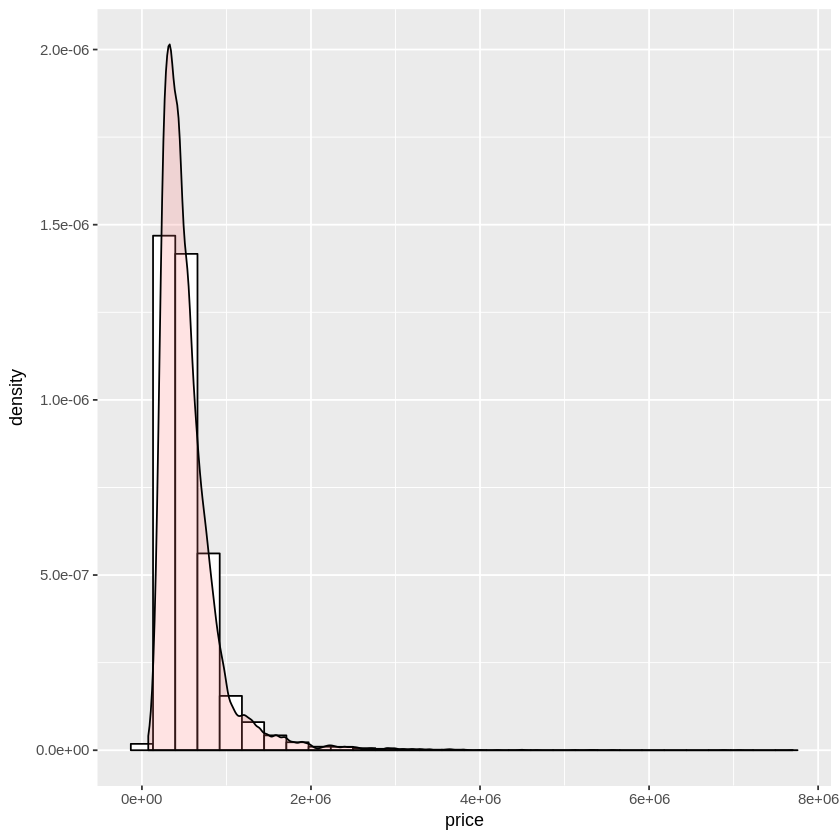

In [4]:
# Create a function gg_histogram() to plot the histogram and density curve.
#histoinfo <- hist(house$price, plot = FALSE)

gg_histogram = function(data, x_col){
    plt <- data %>% ggplot(mapping = aes_string(x = x_col)) +
    geom_histogram(aes(y = ..density..),
                   #bins = length(histoinfo$count),
                  color = 'black', fill = 'white') +
    geom_density(alpha=.2, fill="#FF7777")
    
    plt %>% print()
}

house %>% gg_histogram("price")


<div class="alert alert-block alert-info">
Answer the following questions about your plot:</div>

1. Is this distribution left skewed or right skewed? **Hint:** a left skewed distribution has a long right tail. <br>
 --It is left skewed
2. Do you think a log transformation of these values will create a distribution closer to Normal? <br>
-- Yes, it does.

To understand and model the factors determining home price it is necessary to transform this label value. In the cell below, use functions from the tidyverse to write code to do the following:

1. Compute a new column in the data frame containing the natural log transformation of the `price` column.
2. Plot the histogram and/or density function for the transformed column. 

Observations: 21,613
Variables: 30
$ id             <chr> "7129300520", "6414100192", "5631500400", "248720087...
$ date           <dttm> 2014-10-13, 2014-12-09, 2015-02-25, 2014-12-09, 201...
$ price          <dbl> 221900, 538000, 180000, 604000, 510000, 1225000, 257...
$ bedrooms       <int> 3, 3, 2, 4, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 5, 4, 3, 4...
$ bathrooms      <dbl> 1.00, 2.25, 1.00, 3.00, 2.00, 4.50, 2.25, 1.50, 1.00...
$ sqft_living    <int> 1180, 2570, 770, 1960, 1680, 5420, 1715, 1060, 1780,...
$ sqft_lot       <int> 5650, 7242, 10000, 5000, 8080, 101930, 6819, 9711, 7...
$ floors         <dbl> 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1....
$ waterfront     <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ view           <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0...
$ condition      <int> 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 4...
$ grade          <int> 7, 7, 6, 7, 8, 11, 7, 7, 7, 7, 8, 7, 7, 7, 7, 9, 7, ...
$ sqft_above     

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


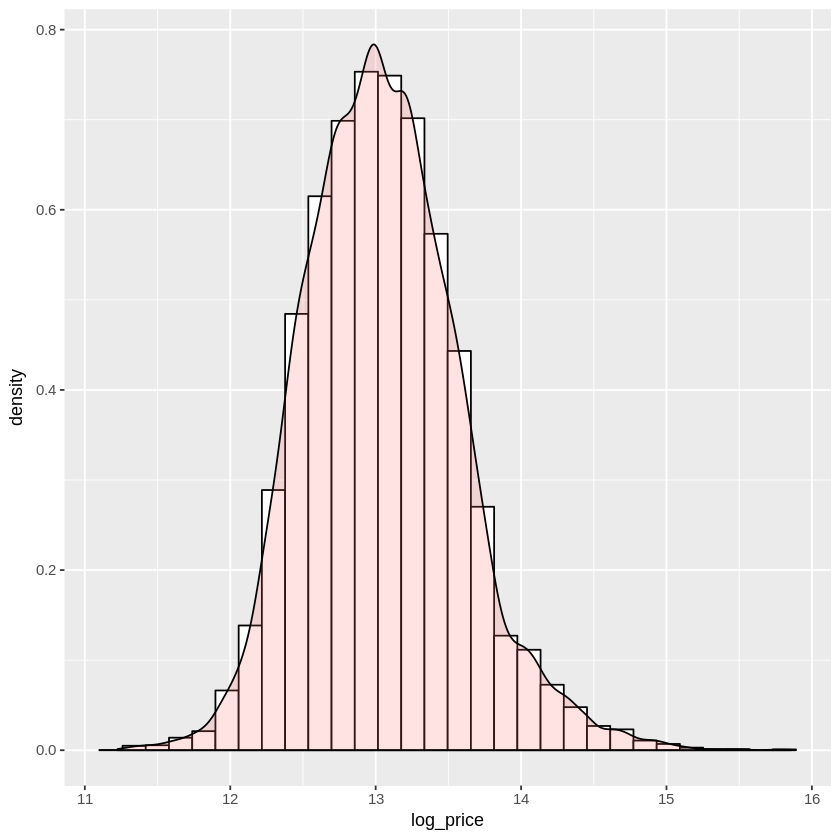

In [5]:
# Natural log transformation for the price column
house <- house %>%
    mutate(log_price = log(price))

glimpse(house)

house %>% gg_histogram('log_price')



<div class="alert alert-block alert-info">Compare the distribution of the transformed label to the original `price` column. Is the transformed distribution significantly more symmetric? </div>
* Yes. After log-transformation, the transformed distribution is significantly more symmetric.

## Explore the Relationships in the Data

You will now use a series of plots to visualize these data and understand the relationships.   

### Univariate plots
First, in the cell below, use ggplot2 create a series of histogram and/or density estimation plot for the following features:
- sqft_living
- sqft_lot
- sqft_above
- sqft_basement
- yr_built

In [6]:
# summary(house)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


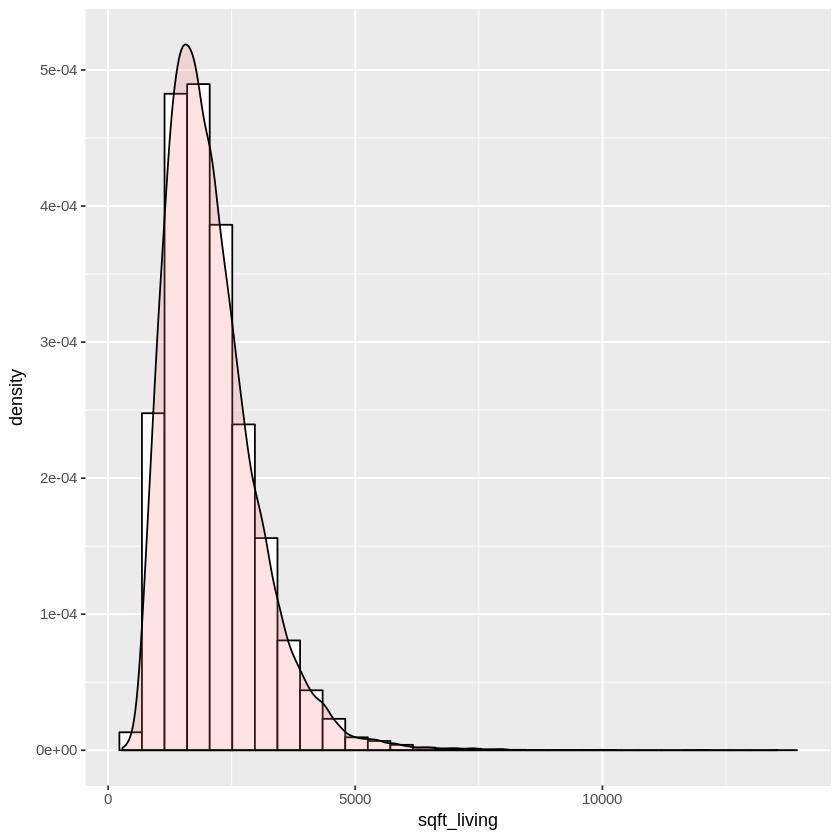

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


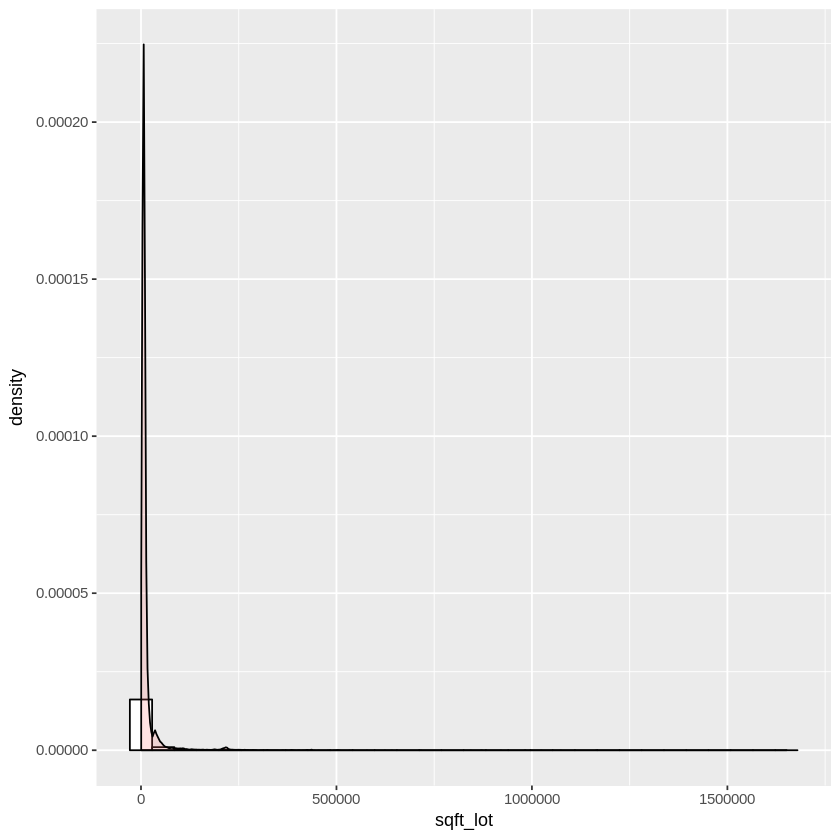

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


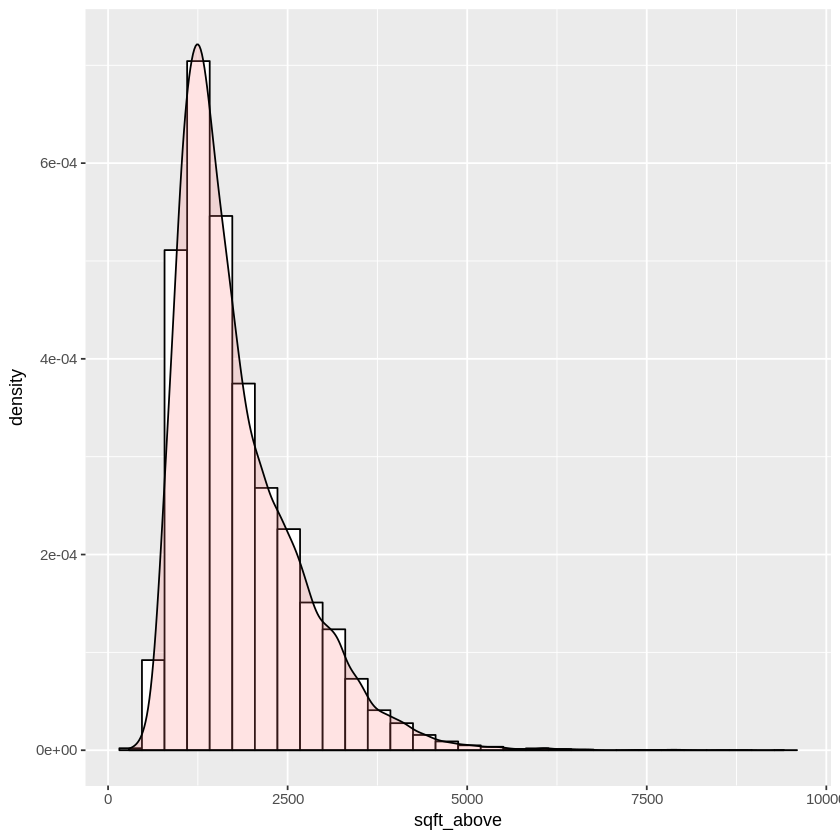

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


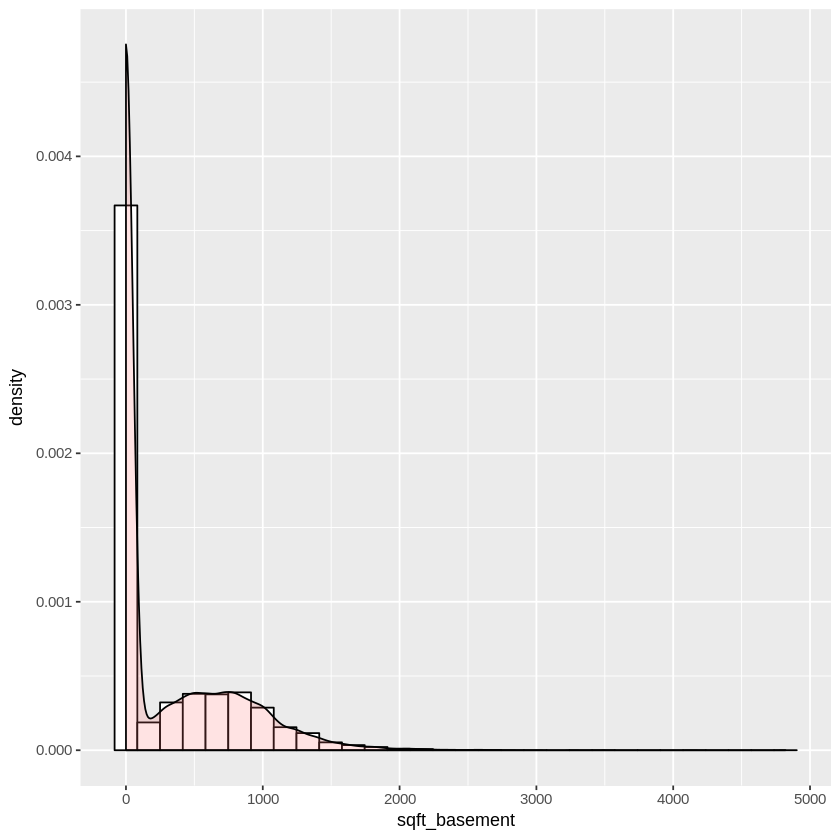

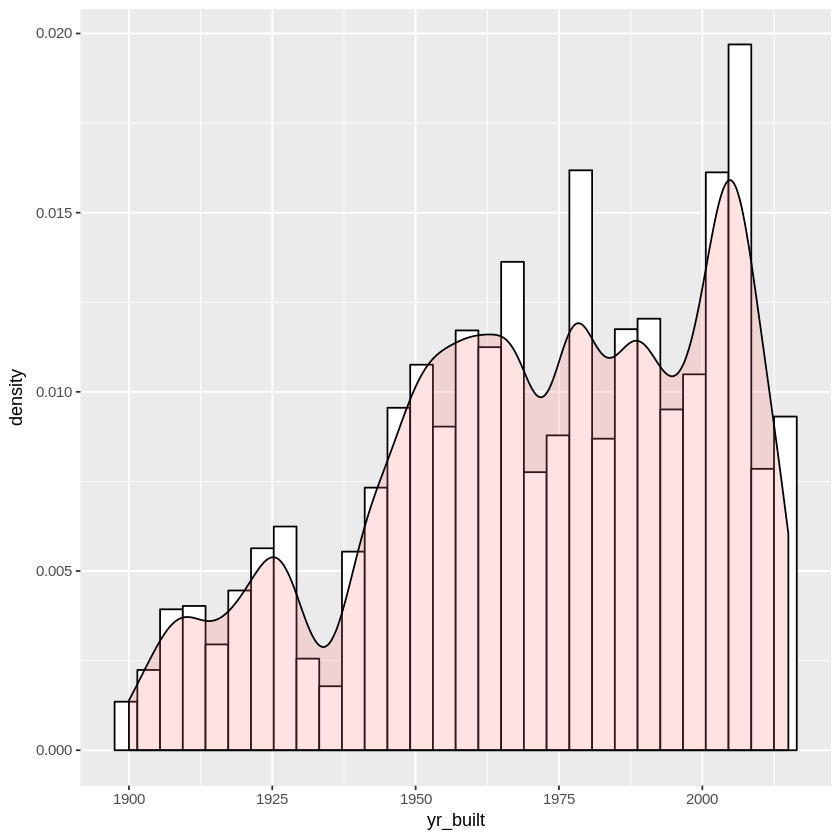

In [7]:
# Use walk() to call gg_histogram plotting multiple features
x_cols <- c("sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "yr_built")

x_cols %>% walk(gg_histogram, data = house)

<div class="alert alert-block alert-info">Examine these histograms and answer the following questions:</div>

1. Which two features are dominated by zero values? <br>
    sqft_lot; sqft_basement
2. Which two features, not dominated by zero values, are strongly left skewed? <br>
    sqft_living; sqft_above

### Bivariate plots

Now, you will create a series of plots to explore the relationship between the transformed label and some features in the data set. In the cell below, use ggplot2 create a series of scatter plots for the numeric features.

**Hints:** 
1. Use a high transparency value, e.g. `alpha = 0.1` to deal with the overplotting. Or, use a hexbin plot, `geom_hex` from the hexbin package.
2. Include a non-linear regression line on the plots, using `geom_smooth`, to get a better idea of the trends in these data. 

`geom_smooth()` using method = 'gam'
`geom_smooth()` using method = 'gam'


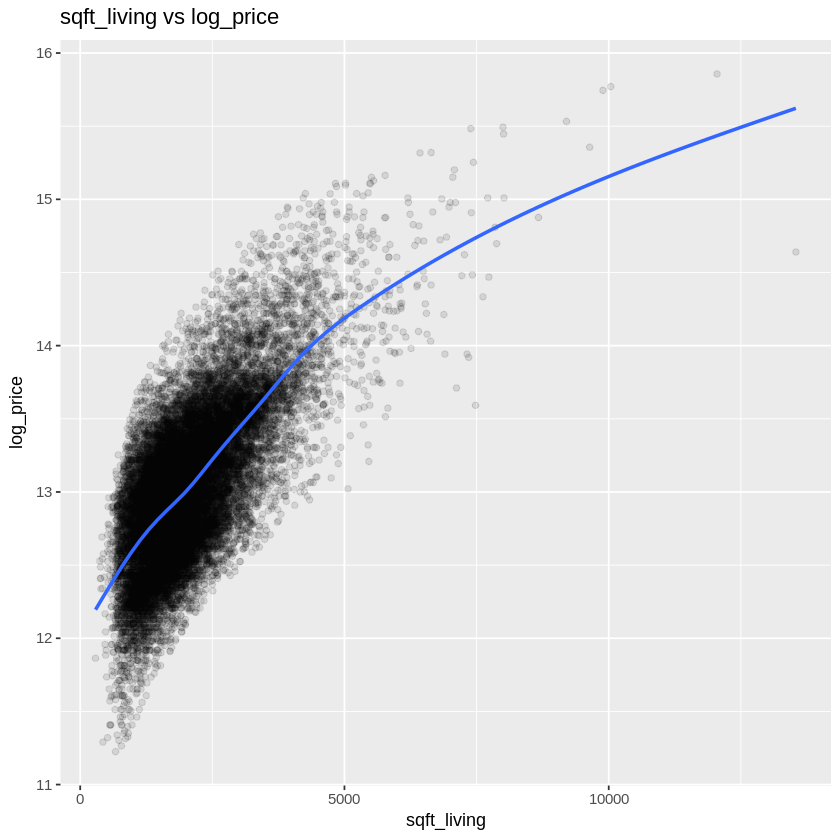

`geom_smooth()` using method = 'gam'


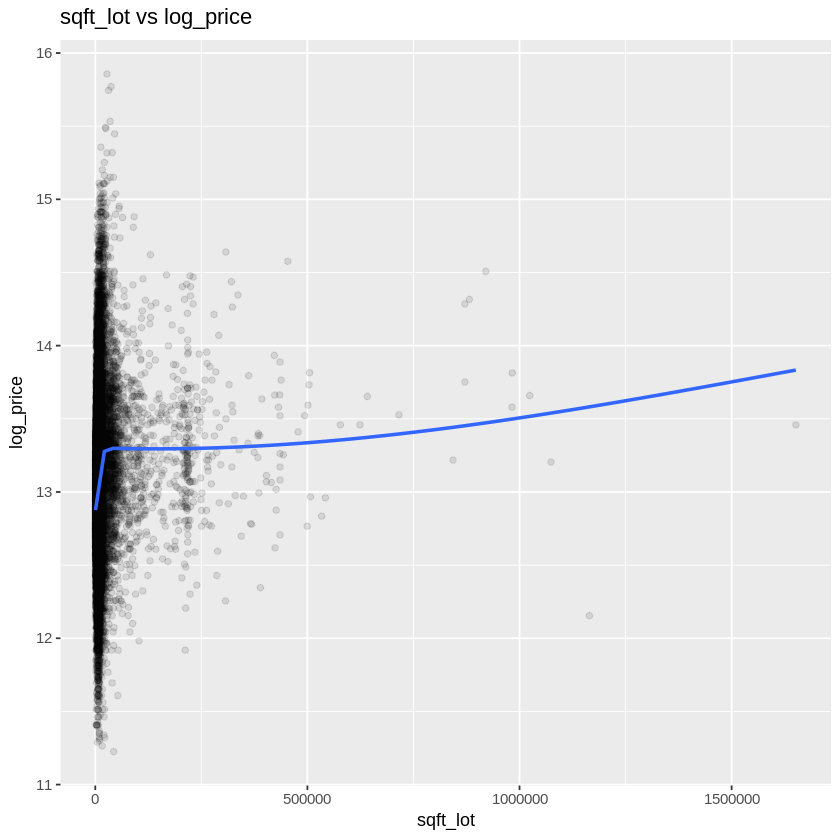

`geom_smooth()` using method = 'gam'


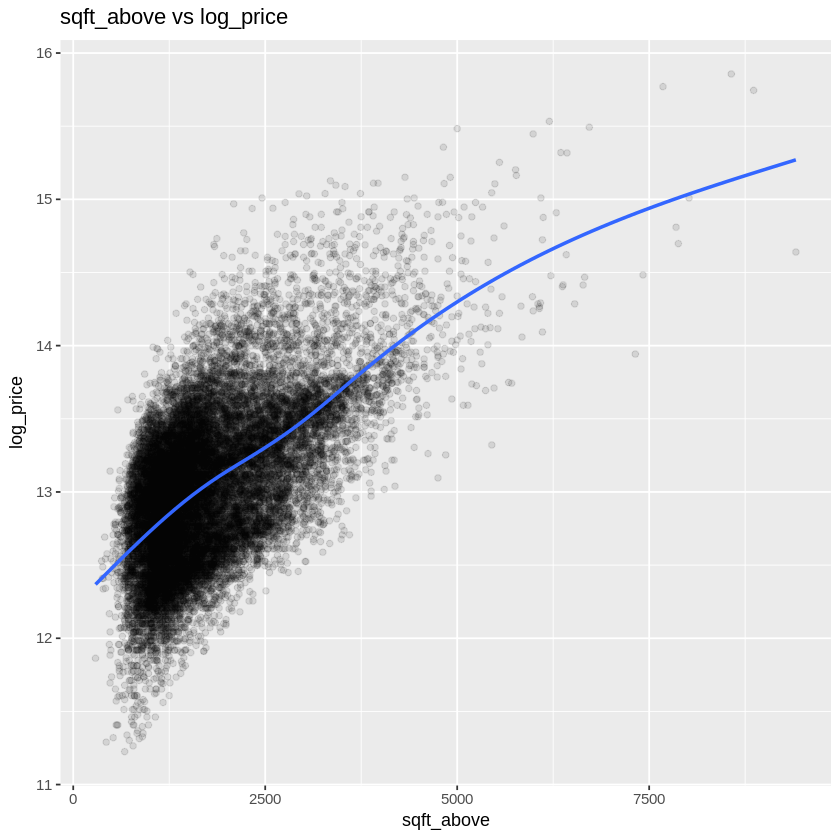

`geom_smooth()` using method = 'gam'


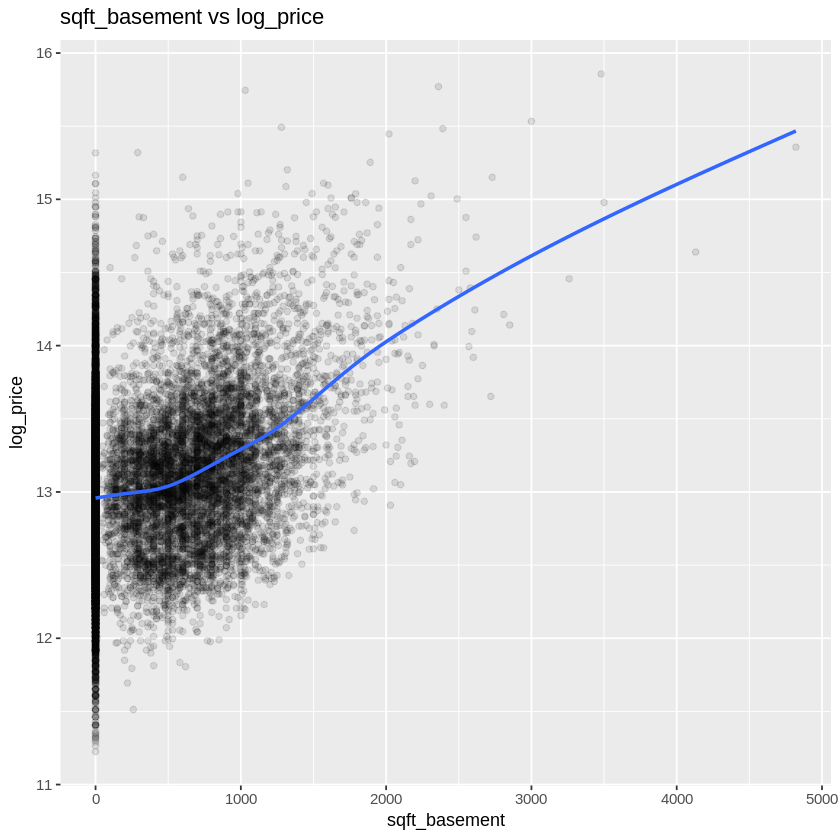

`geom_smooth()` using method = 'gam'


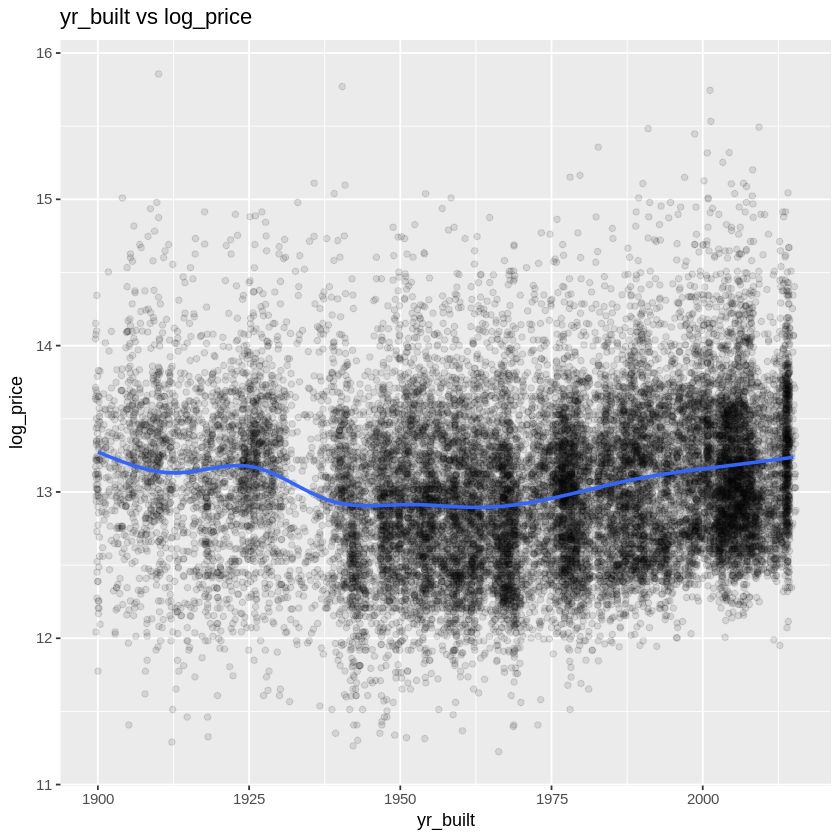

`geom_smooth()` using method = 'gam'


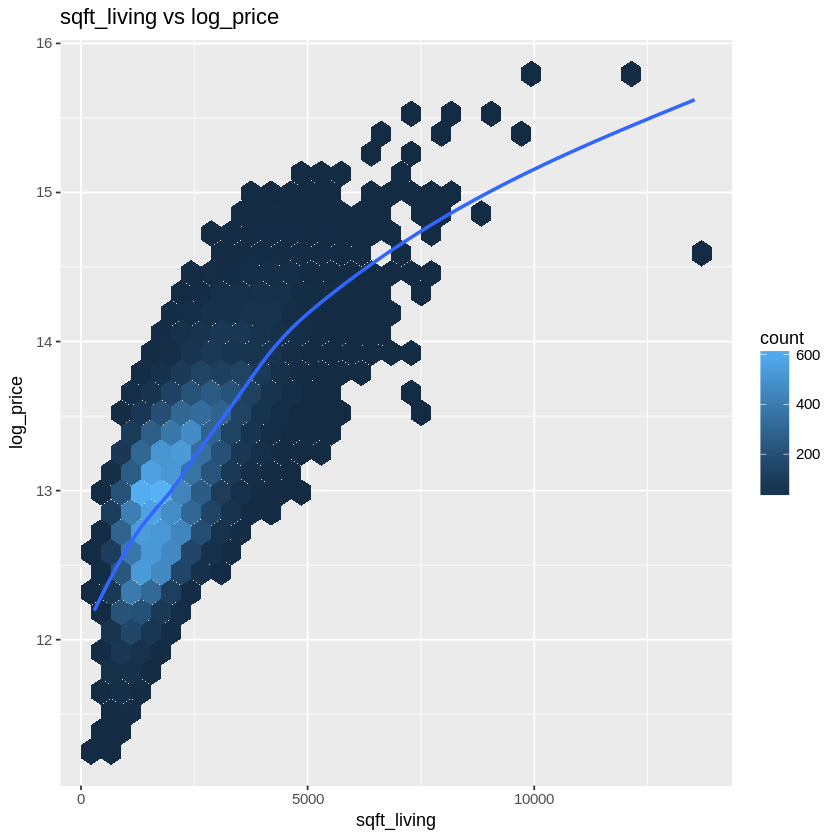

`geom_smooth()` using method = 'gam'


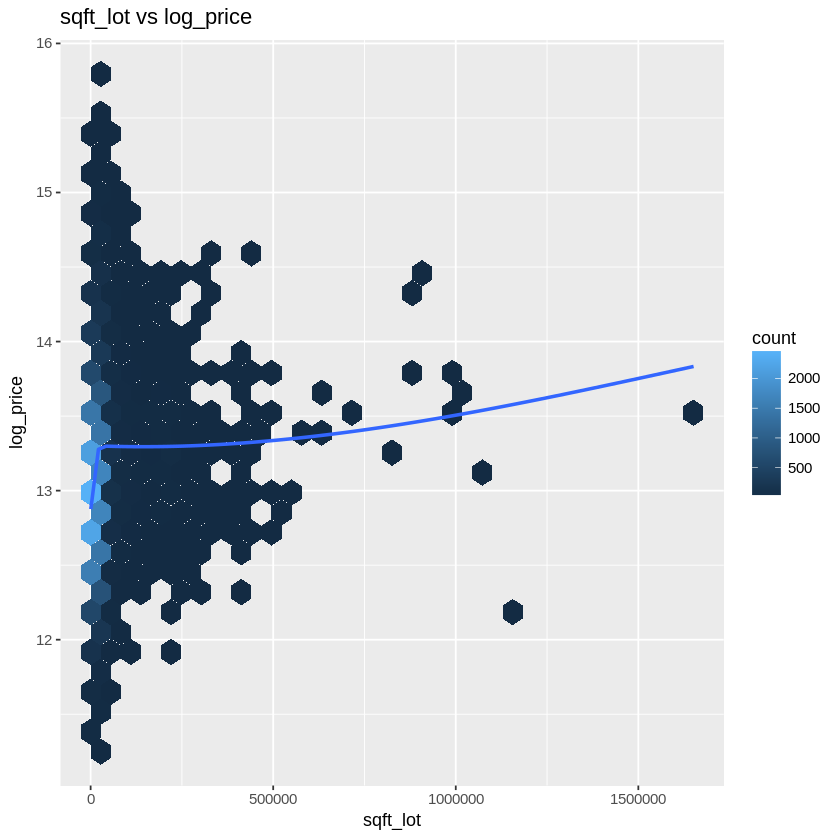

`geom_smooth()` using method = 'gam'


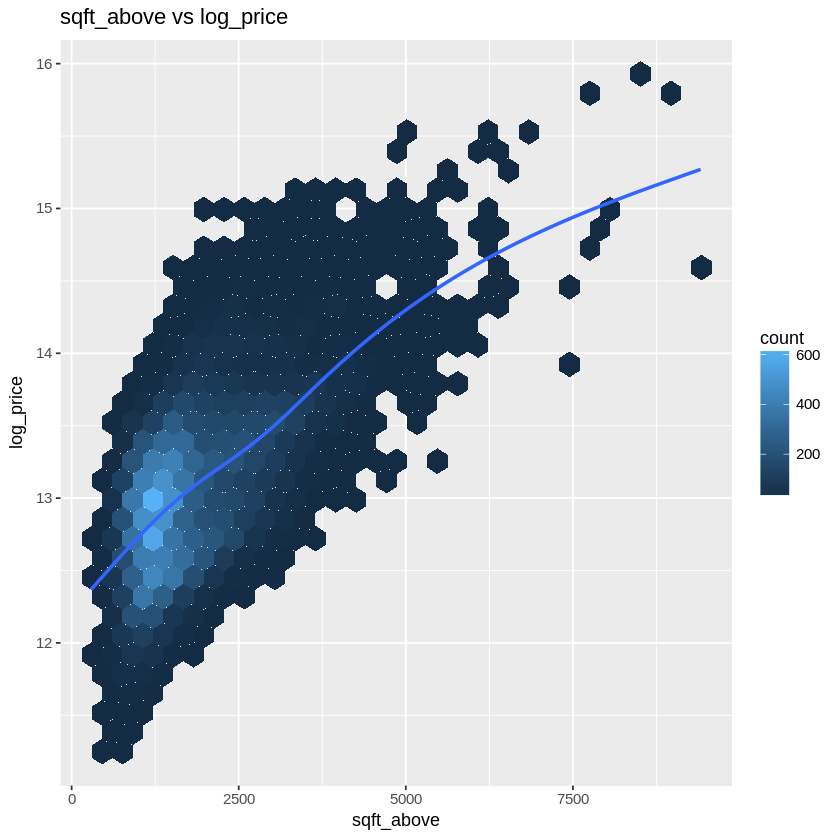

`geom_smooth()` using method = 'gam'


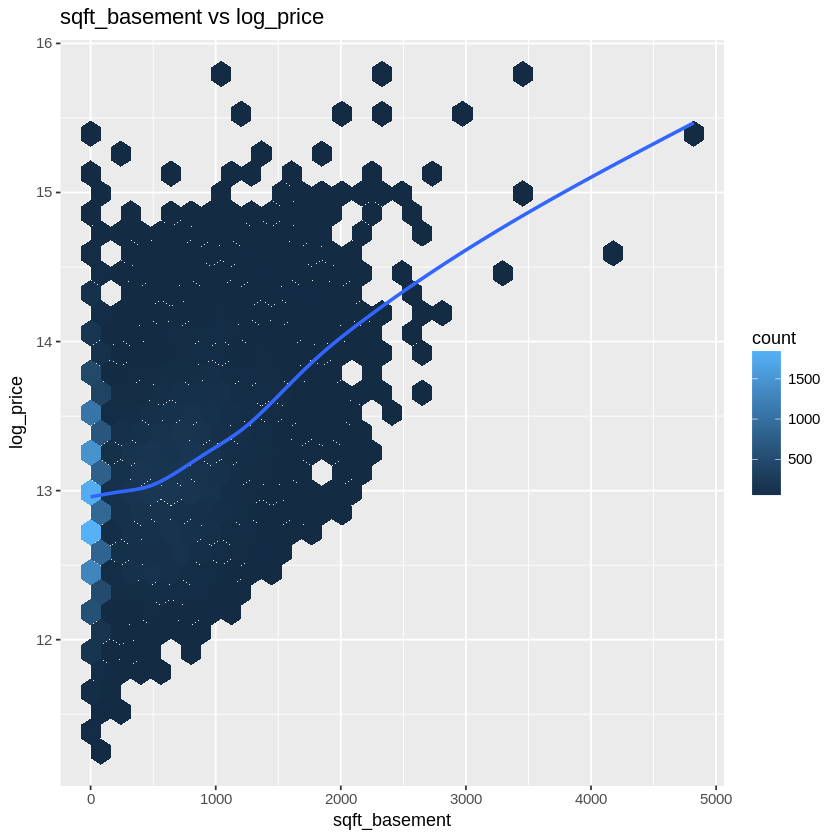

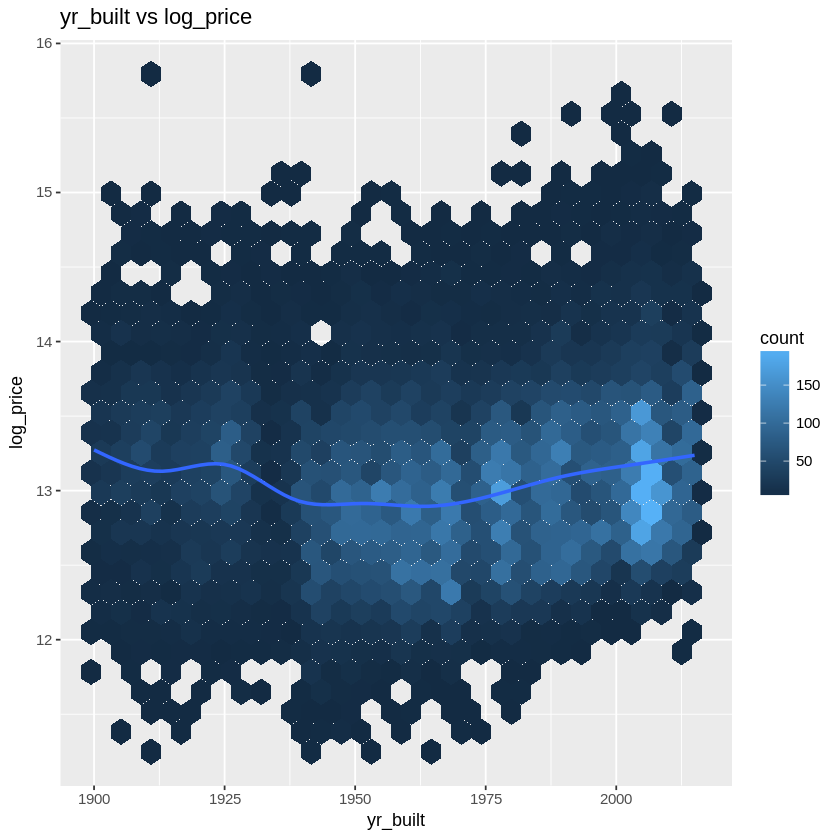

In [8]:
# Create a function gg_scatter to draw a scatter plot
gg_scatter <- function(data, x_col, y_col){
    plt <- data %>% ggplot(mapping = aes_string(x = x_col, y = y_col)) +
        geom_jitter(alpha = 0.1) +
        geom_smooth(se = FALSE) +
        ggtitle(str_c(x_col, " vs ", y_col))
    
    plt %>% print()
}

# Create a function gg_hexbin to draw a hexbin plot
gg_hexbin <- function(data, x_col, y_col) {
    plt <- data %>% ggplot(mapping = aes_string(x = x_col, y = y_col)) +
    geom_hex() +
    geom_smooth(se = FALSE) +
    ggtitle(str_c(x_col, " vs ", y_col))
    
    plt %>% print()
}

x_cols <- c("sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "yr_built")
y_col <- 'log_price'

x_cols %>% walk(gg_scatter, data = house, y_col) # scatter plots

x_cols %>% walk(gg_hexbin, data = house, y_col) # hexbin plots

<div class="alert alert-block alert-info">Examine these plots and answer the following questions:</div>
1. Which two features exhibit essentially no trend with respect to log of price? <br>
    yr_built; sqft_lot
2. Which features have significant numbers of zeros?  Do you think these zeros might be real values of missing values.<br>
    -- sqft_basement. We think that the zero values are not missing values in sqft_basement because a house can have no basement.<br>
    -- sqft_lot. Data dispersion fot this variable is too vast. WIth minimum value of 520 sq ft and max value of 1651359, so for analysis purpose we can consider the values are close to zero, but not exact zero values.
3. Which features appear to have a strong trend with log price? Is the behavior of these features similar? <br>
    sqft_living; sqft_above. Yes, these variables impact price in similar way, we see a positvie correlation here.

Next, you will explore the relationship between the label and the categorical features. By categorical features in this case we mean features with named categories or with a small number of discrete numeric values. These features include:

- bedrooms
- bathrooms
- floors
- zipcode
- waterfront
- view_fac
- condition
- grade

In the cell below use ggplot2 create and execute a function to display either box plots, or, ideally, violin plots, of log price stratified by the values of these variables.

**Hint:** Make sure you have created new columns containing these features converted to an R factor type. Else, ggplot2 will not display the stratification correctly.

In [9]:
names(house)

[1] "id"             "date"           "price"          "bedrooms"      
 [5] "bathrooms"      "sqft_living"    "sqft_lot"       "floors"        
 [9] "waterfront"     "view"           "condition"      "grade"         
[13] "sqft_above"     "sqft_basement"  "yr_built"       "yr_renovated"  
[17] "zipcode"        "lat"            "long"           "sqft_living15" 
[21] "sqft_lot15"     "bedrooms_fac"   "bathrooms_fac"  "floors_fac"    
[25] "waterfront_fac" "view_fac"       "condition_fac"  "grade_fac"     
[29] "zipcode_fac"    "log_price"

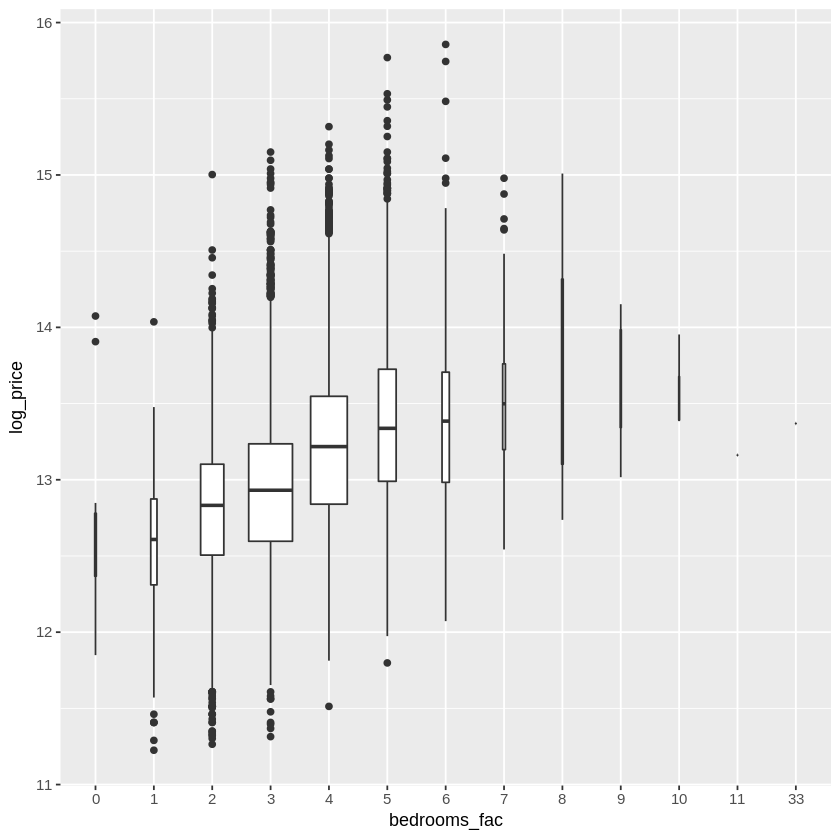

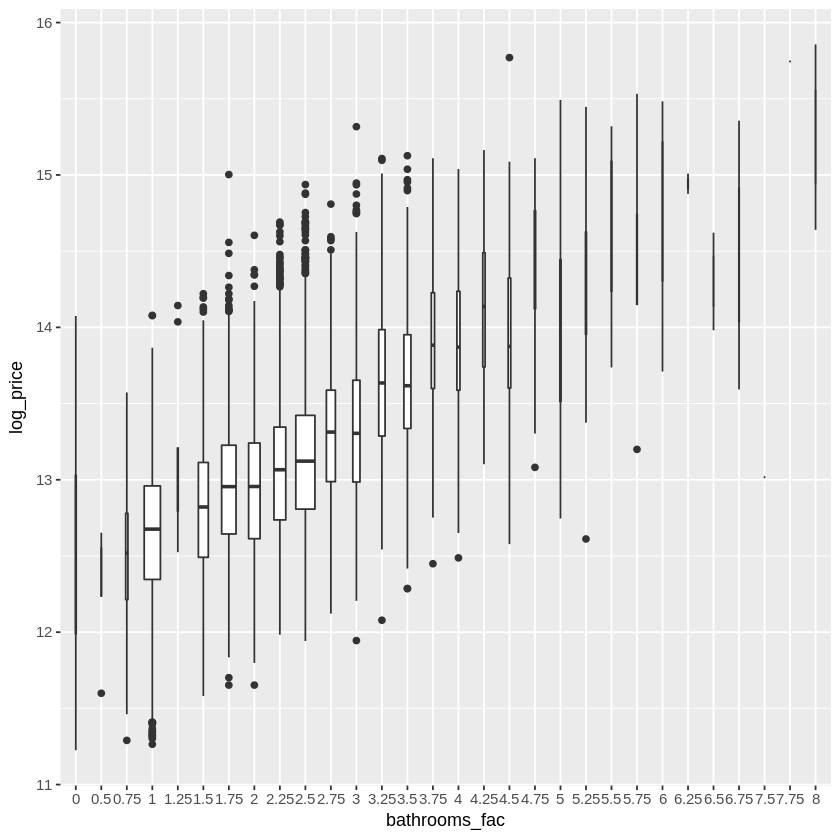

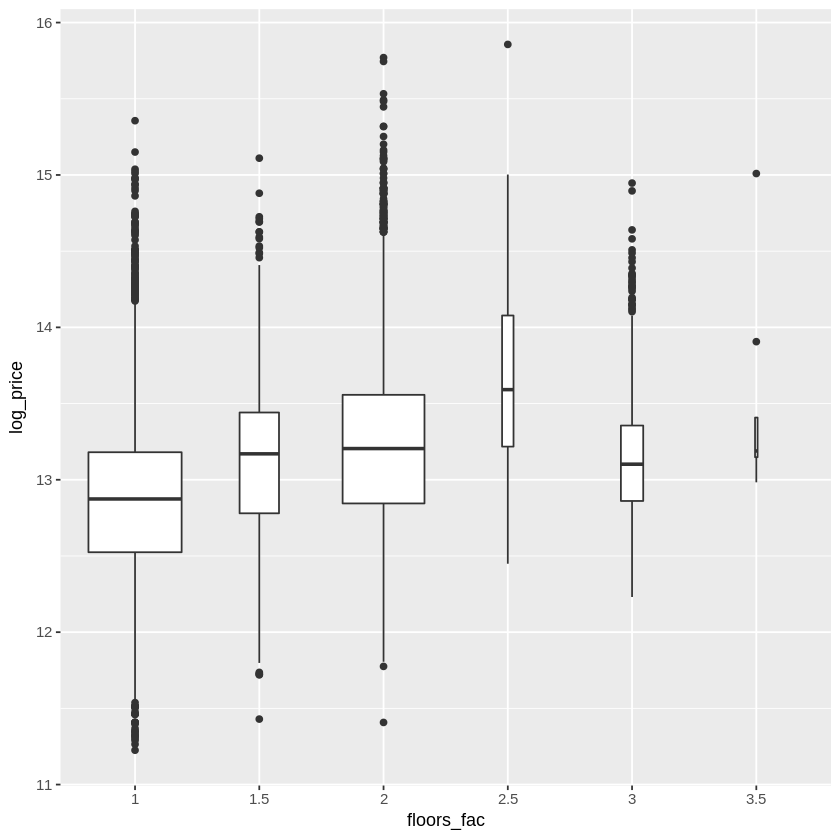

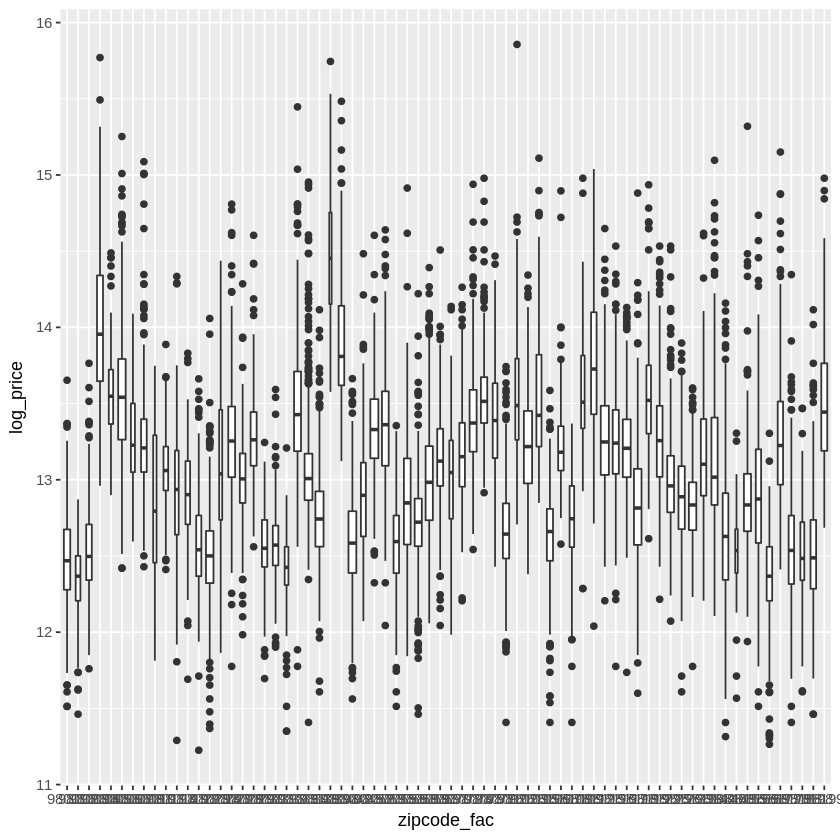

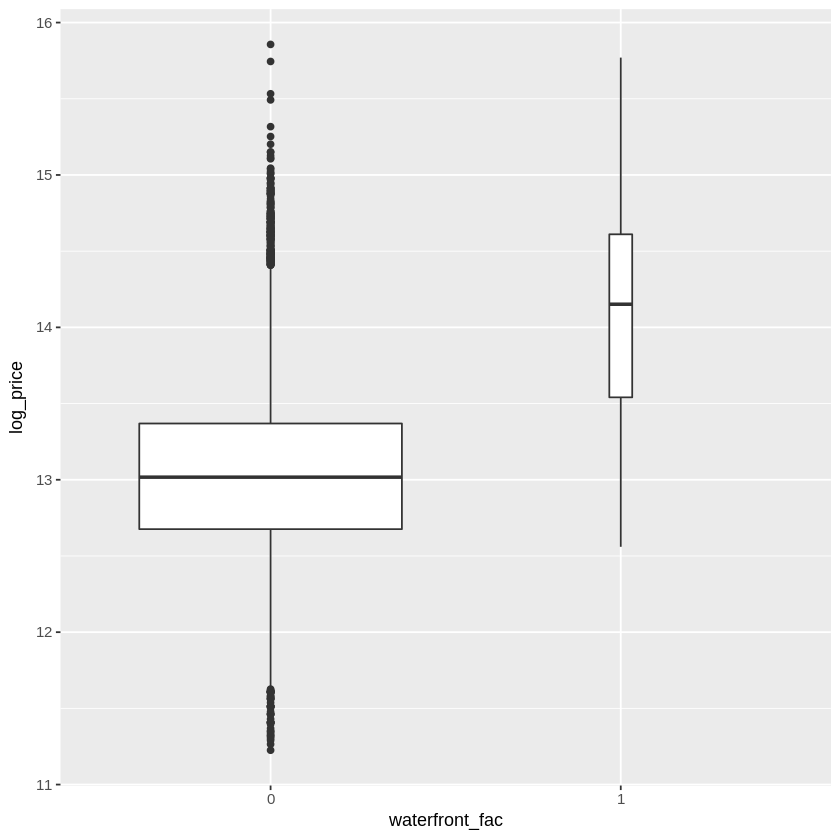

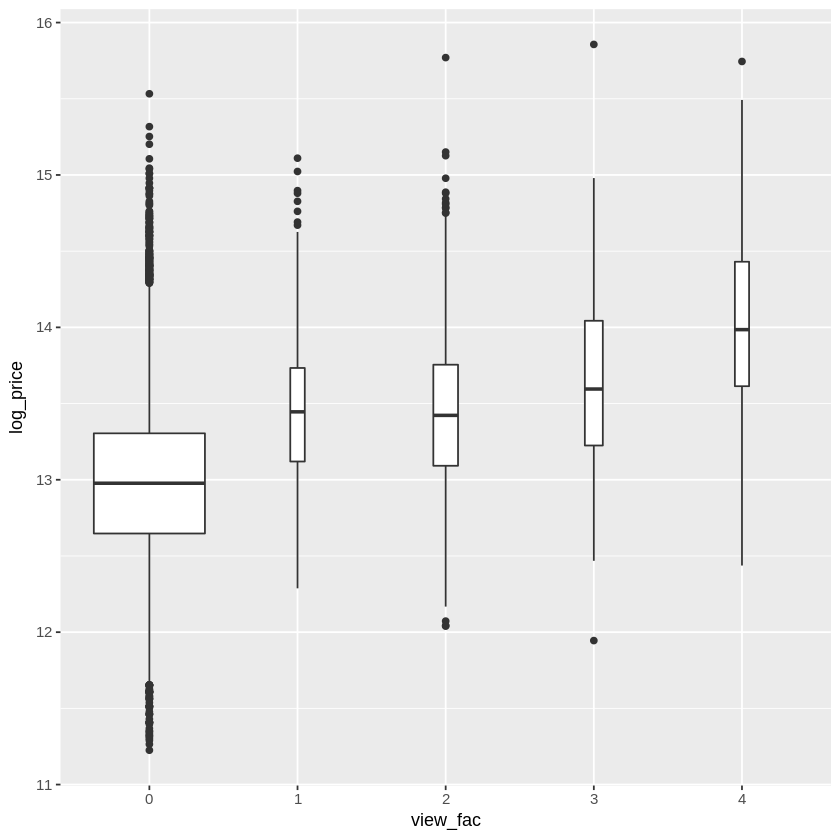

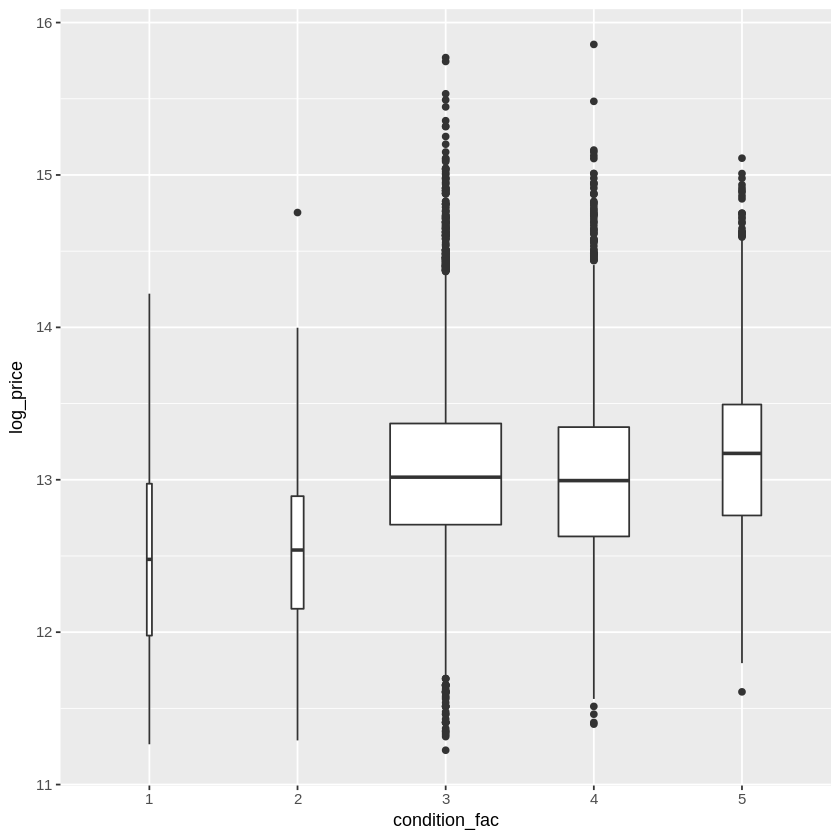

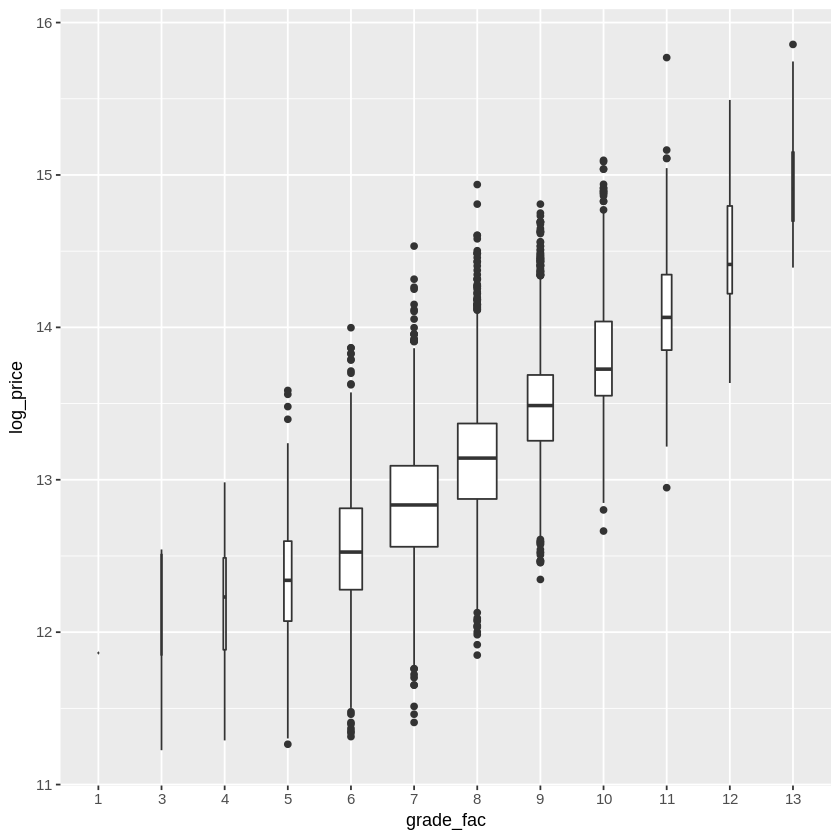

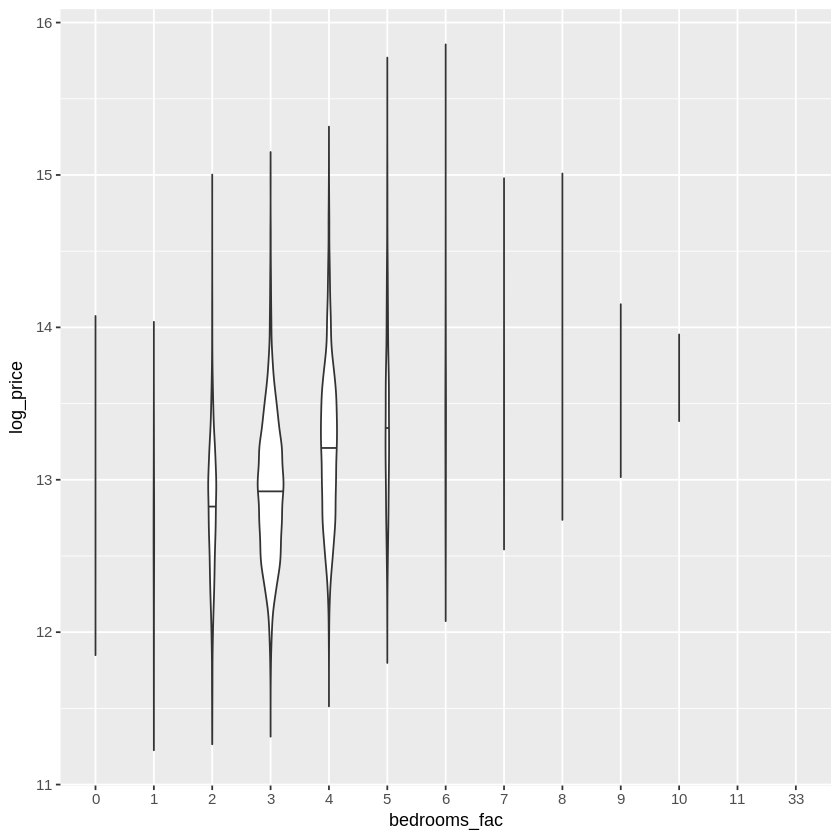

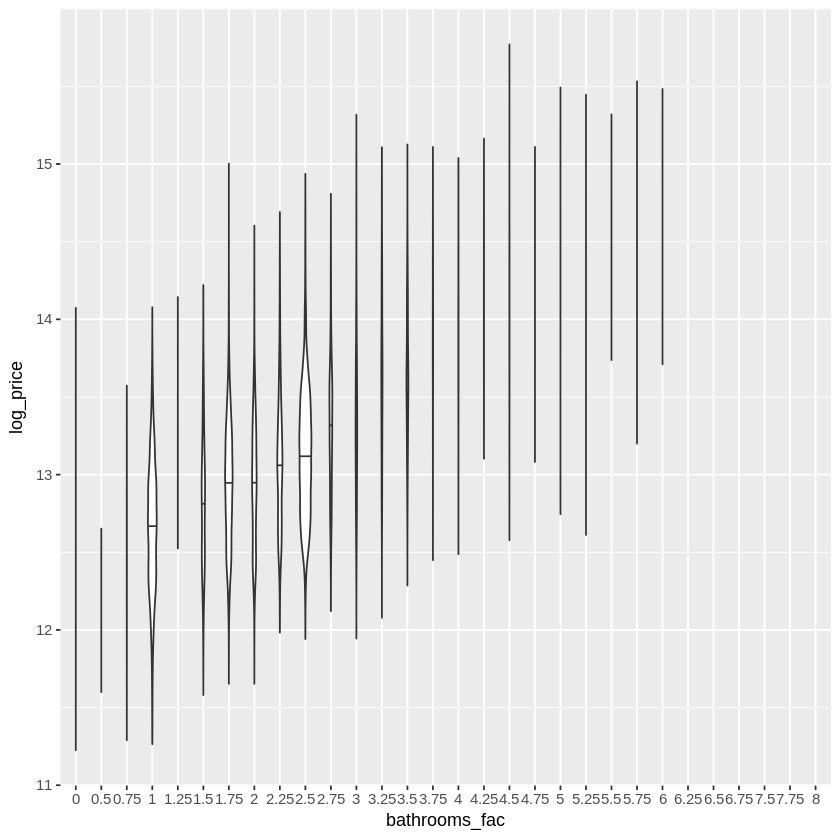

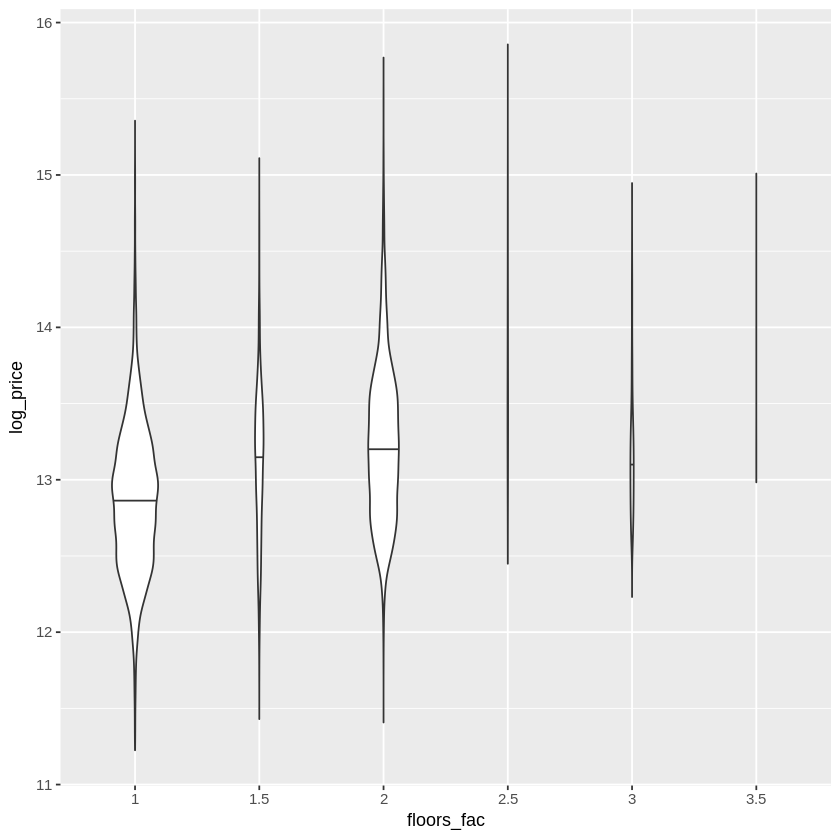

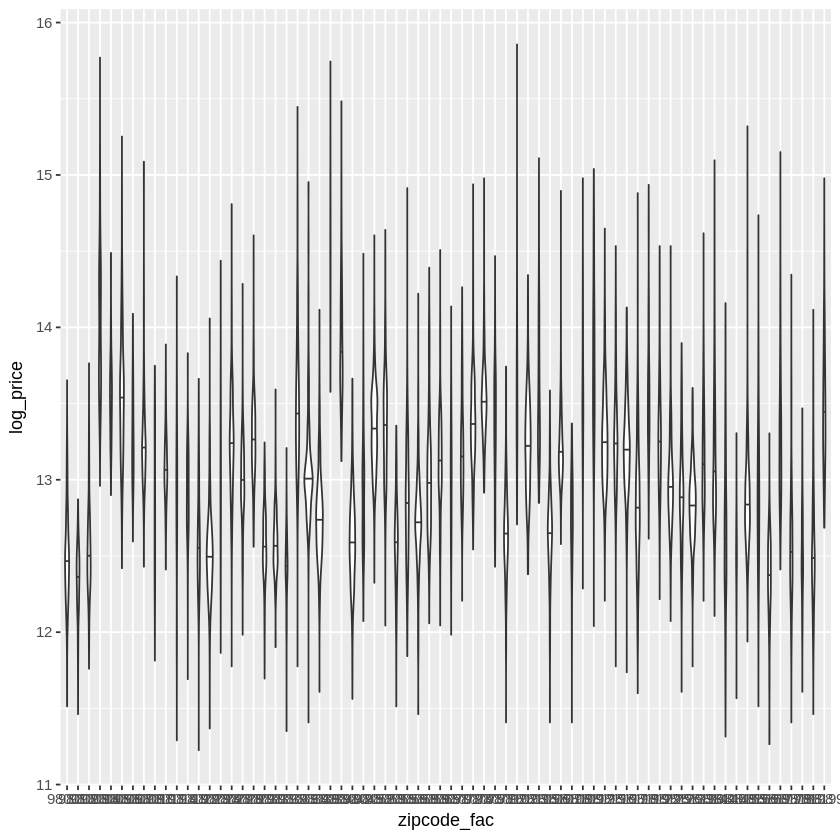

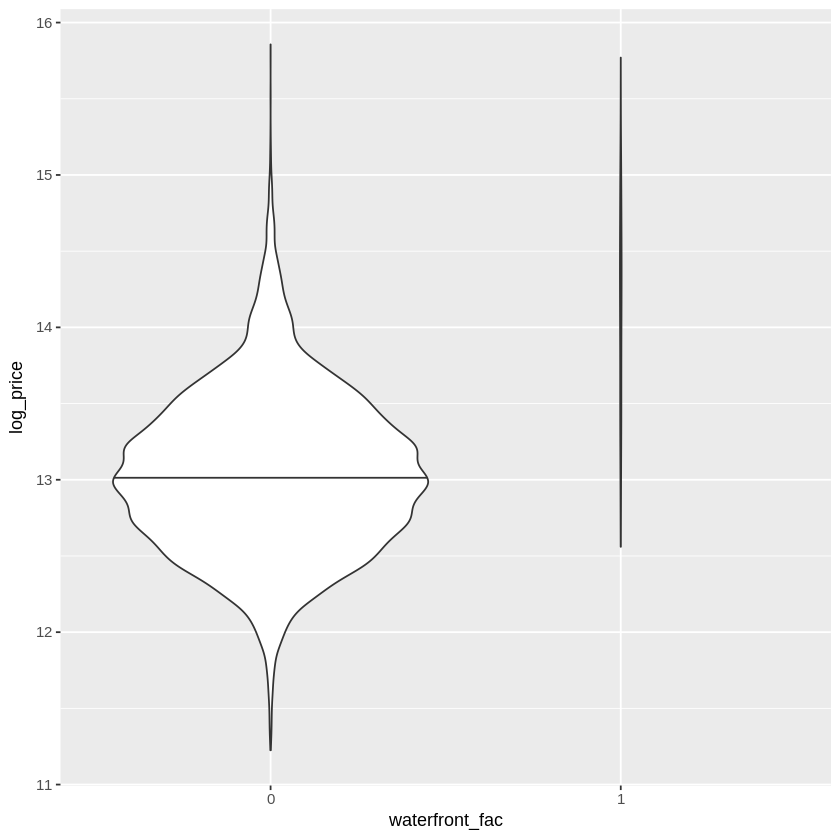

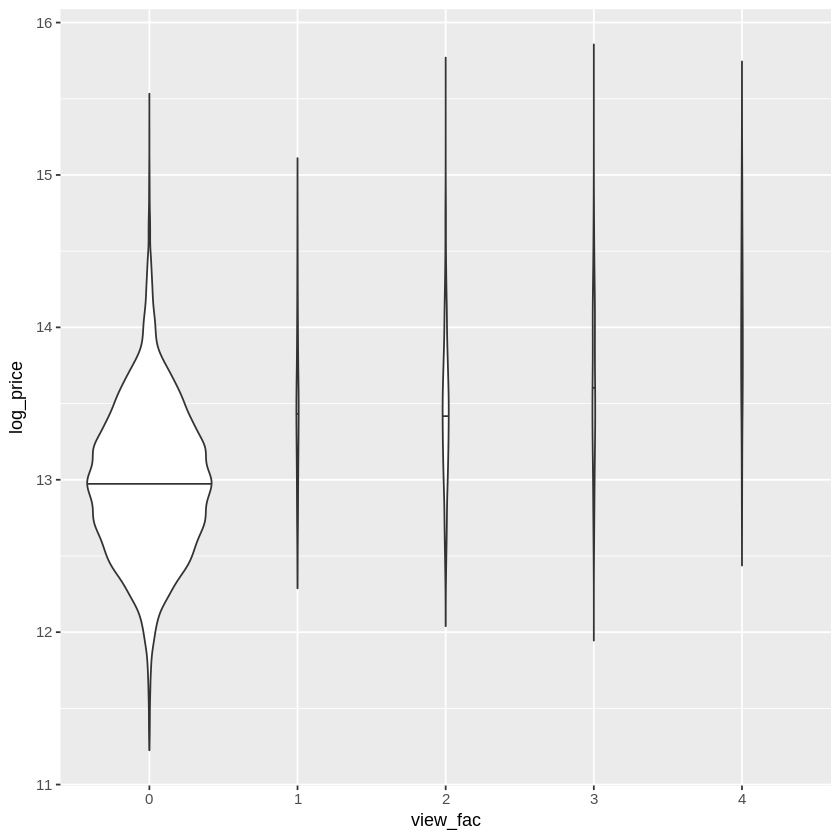

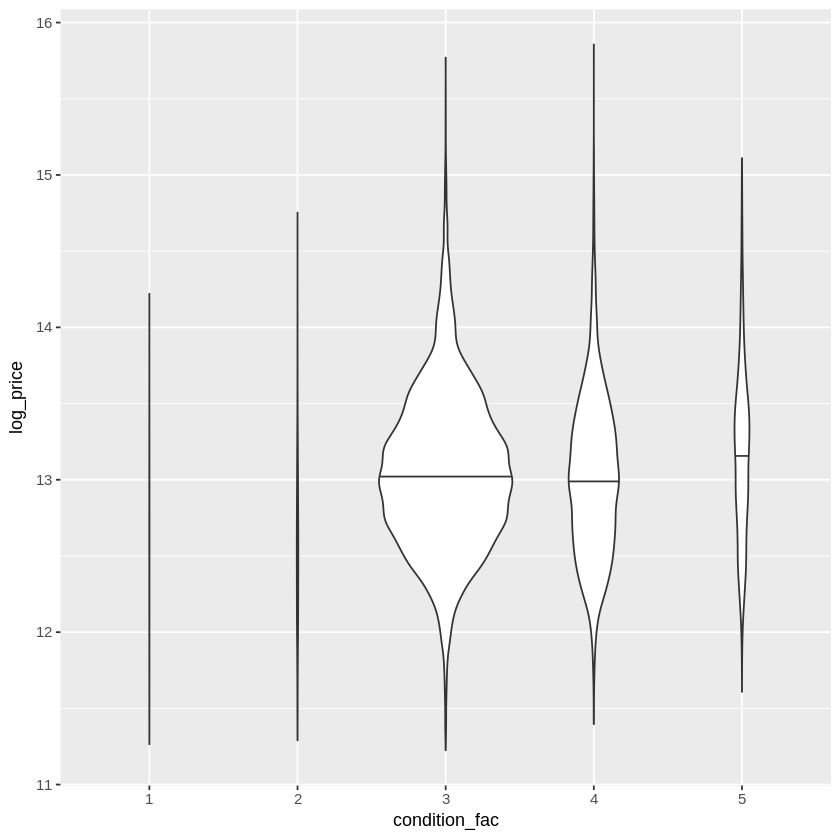

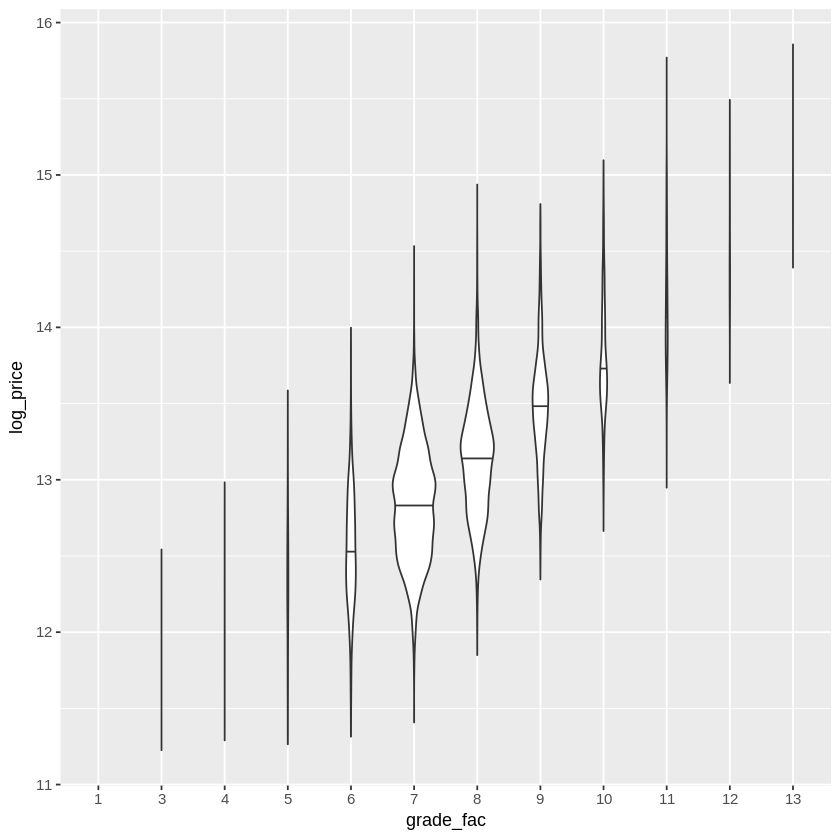

In [10]:
# Create a function gg_boxplot
gg_boxplot <- function(data, x_col, y_col){
    plt <- data %>% 
        ggplot(mapping = aes_string(x = x_col, y = y_col)) +
        geom_boxplot(varwidth = TRUE)
    
    plt %>% print()
}

# Create a function gg_violinplot. http://ggplot2.tidyverse.org/reference/geom_violin.html
gg_violinplot <- function(data, x_col, y_col) {
    plt <- data %>%
        ggplot(mapping = aes_string(x = x_col, y = y_col)) +
        geom_violin(
            #adjust= .5, # Use a smaller bandwidth for closer density fit (default is 1)
            scale='count', # Scale maximum width proportional to sample size
            #scale='width', # Scale maximum width to 1 for all violins
            draw_quantiles=0.5)  # Show quartiles. It can be c(0.25, 0.5, 0.75)
        #geom_jitter(alpha=0.1, height=0, width=0.1) # Add scatter plot
    
    plt %>% print()
}

x_cols <- c("bedrooms_fac", "bathrooms_fac", "floors_fac", 
            "zipcode_fac", "waterfront_fac", "view_fac", "condition_fac", "grade_fac")

y_col = 'log_price'

x_cols %>% walk(gg_boxplot, data = house, y_col)
x_cols %>% walk(gg_violinplot, data = house, y_col)

<div class="alert alert-block alert-info">Examine the plots you have created and answer the following questions:</div>

1. Most of these plots show a significant changes in log price as you might expect. For example, waterfront homes cost more than other homes, and homes with greater numbers of bedrooms, bathrooms, or grade, cost more than lesser homes. Excluding zip code, which of these features does not exhibit a clear trend? 
    - floors (price going down for 3 floors) 
    - view (most of data with view = 0; price going down for view = 2)
    - condition ( a slight price going down for condition = 4 compared with condition = 3)
2. How much does location seem to matter in determining the price of homes. Are there significant changes in price with zip code? <br>
    Yes. There is a change in price with zip code.

There is a potential pit fall in the visual analysis you just performed. It is evident from the forgoing charts that the size of the living area is a significant factor in the price of the house. It might be important to apply a normalization and explore the relationship between log price per square foot and  the features. 

### Relationship to a new variable

In the cell below, use the tidyverse functions to add a new column to your data frame containing log price per square foot, and plot the histogram/density estimate. **Hint:** Use the values of `sqft_living` for this normalization.

Observations: 21,613
Variables: 31
$ id             <chr> "7129300520", "6414100192", "5631500400", "248720087...
$ date           <dttm> 2014-10-13, 2014-12-09, 2015-02-25, 2014-12-09, 201...
$ price          <dbl> 221900, 538000, 180000, 604000, 510000, 1225000, 257...
$ bedrooms       <int> 3, 3, 2, 4, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 5, 4, 3, 4...
$ bathrooms      <dbl> 1.00, 2.25, 1.00, 3.00, 2.00, 4.50, 2.25, 1.50, 1.00...
$ sqft_living    <int> 1180, 2570, 770, 1960, 1680, 5420, 1715, 1060, 1780,...
$ sqft_lot       <int> 5650, 7242, 10000, 5000, 8080, 101930, 6819, 9711, 7...
$ floors         <dbl> 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1....
$ waterfront     <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ view           <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0...
$ condition      <int> 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 4...
$ grade          <int> 7, 7, 6, 7, 8, 11, 7, 7, 7, 7, 8, 7, 7, 7, 7, 9, 7, ...
$ sqft_above     

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


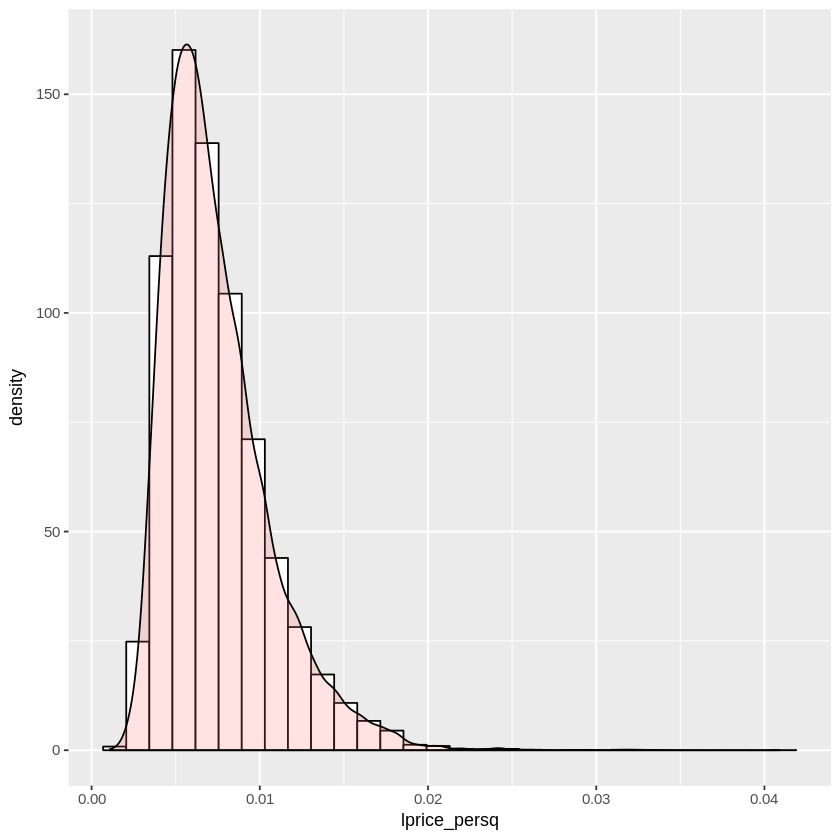

In [11]:
# Add a new column "lprice_persq" -- log price per square foot
house <- house %>% mutate(lprice_persq = log_price/sqft_living) # ?? log(price/sqft_living)
#house <- house %>% mutate(lprice_persq = log(price/sqft_living))


glimpse(house)

# Histogram plot for log price per square foot
house %>% gg_histogram('lprice_persq')

<div class="alert alert-block alert-info">Examine your plot of the new column. Is the distribution symmetric, slightly skewed to the right or slightly skewed to the left?</div>
    The distribution is slightly skewed to the left, having a long right tail.

Next, you will explore the relationship between this new variable and the other features. 

As a first step you will create and examine charts of log of price per square foot vs. the numeric features. In the code cell below create and execute code to  display these plots. 

`geom_smooth()` using method = 'gam'
`geom_smooth()` using method = 'gam'


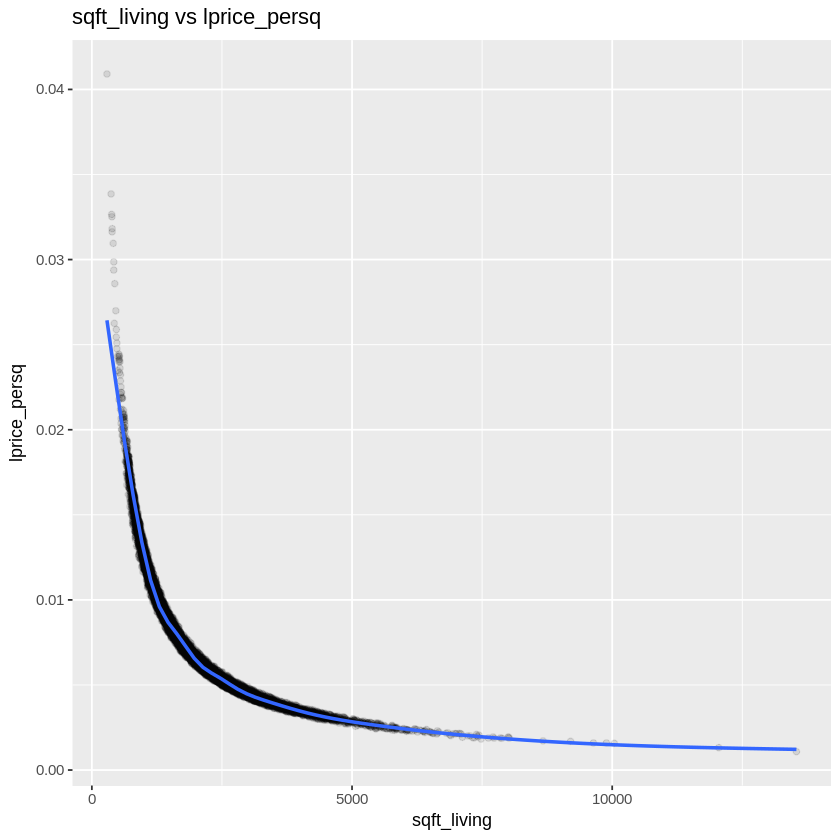

`geom_smooth()` using method = 'gam'


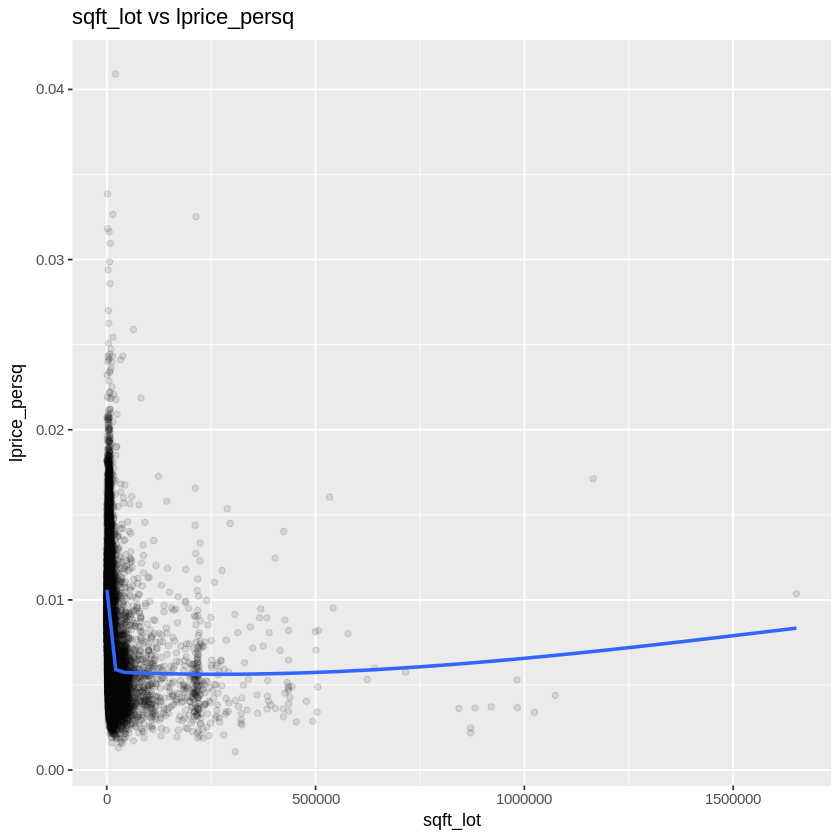

`geom_smooth()` using method = 'gam'


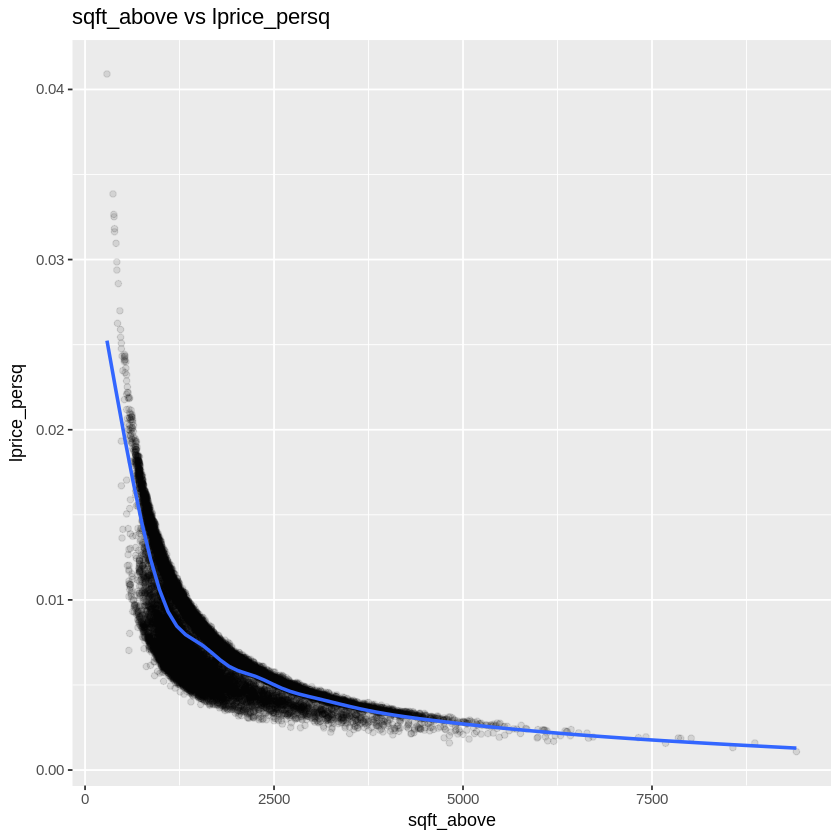

`geom_smooth()` using method = 'gam'


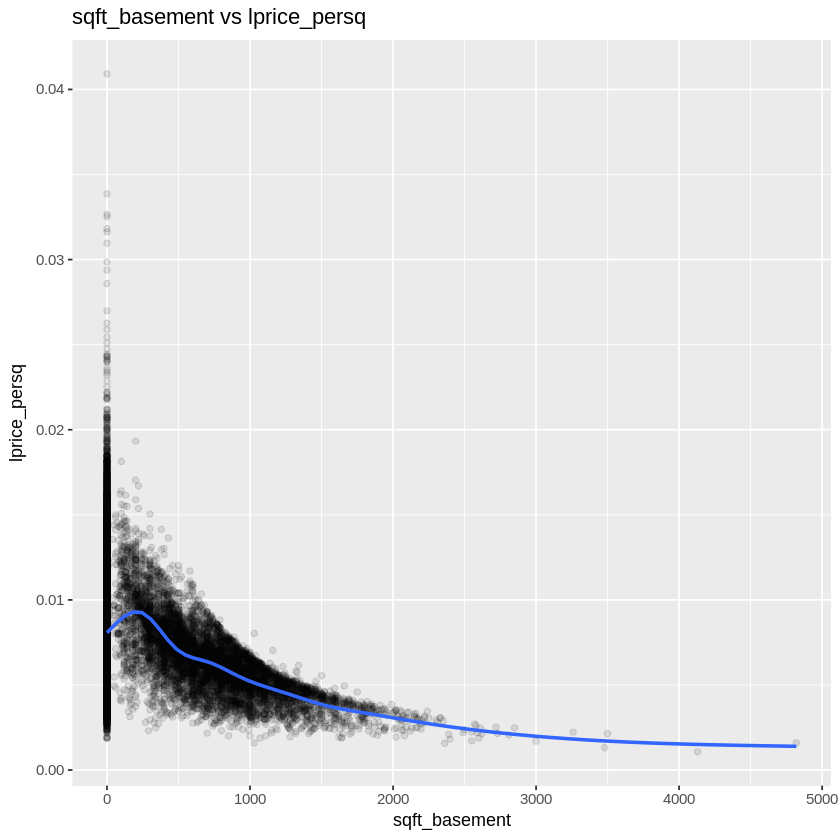

`geom_smooth()` using method = 'gam'


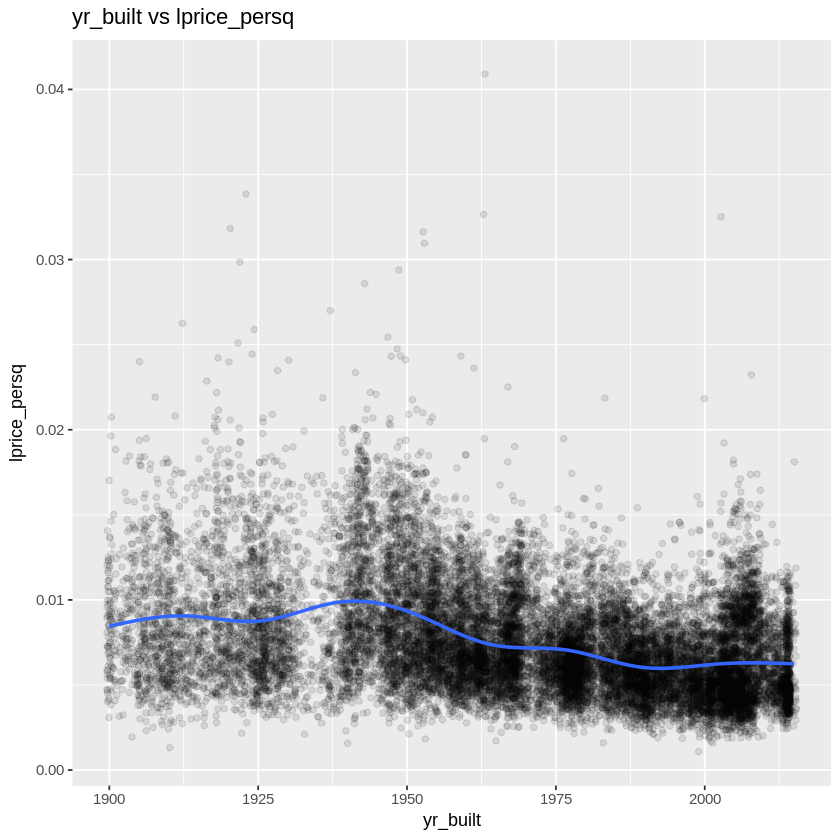

`geom_smooth()` using method = 'gam'


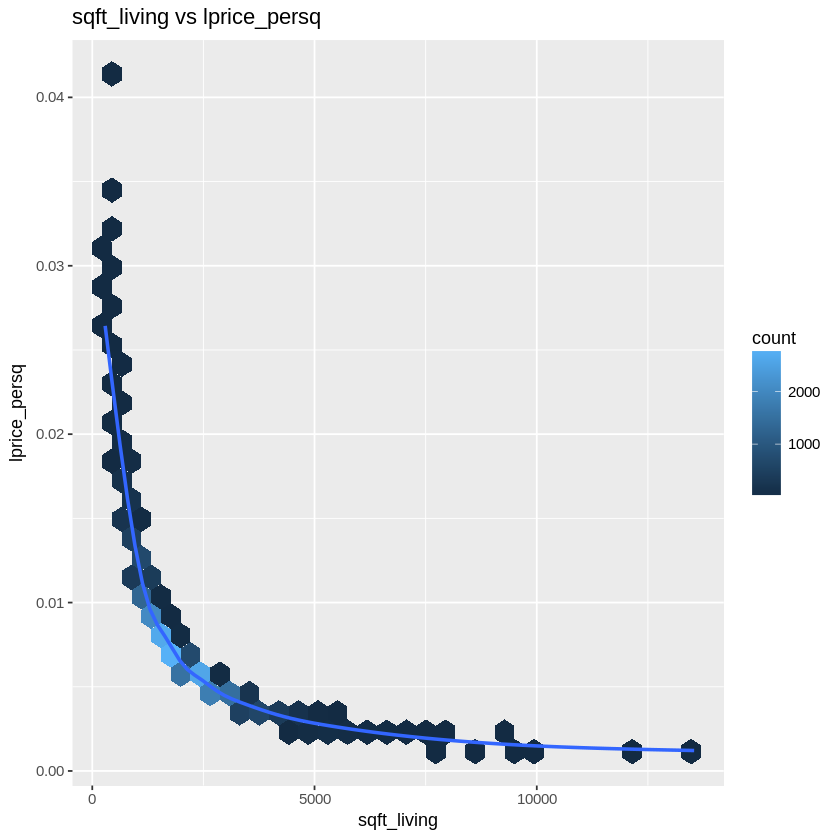

`geom_smooth()` using method = 'gam'


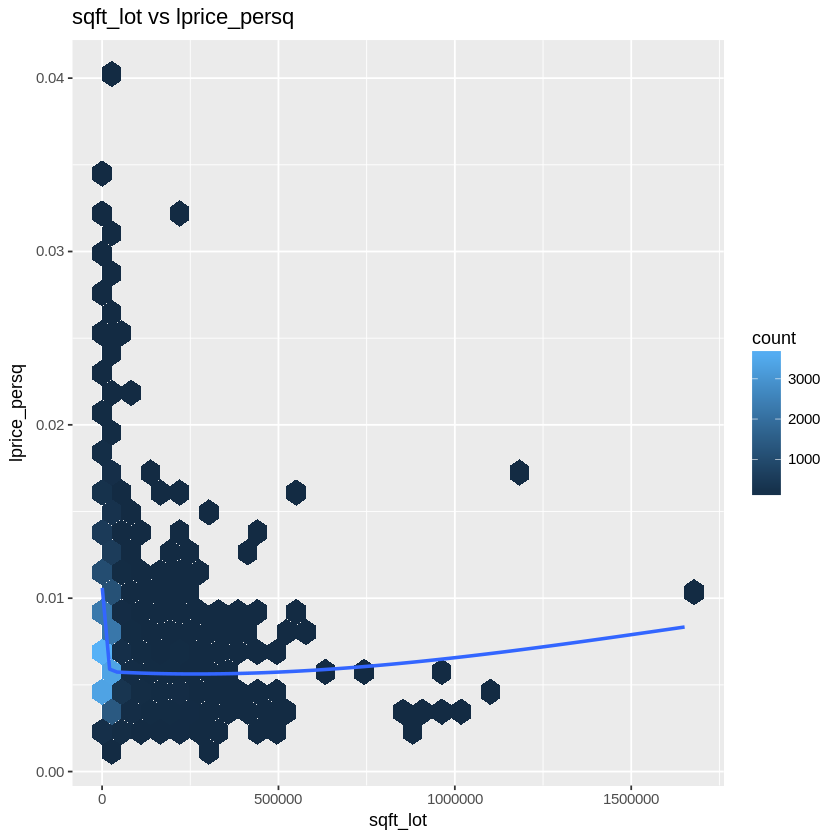

`geom_smooth()` using method = 'gam'


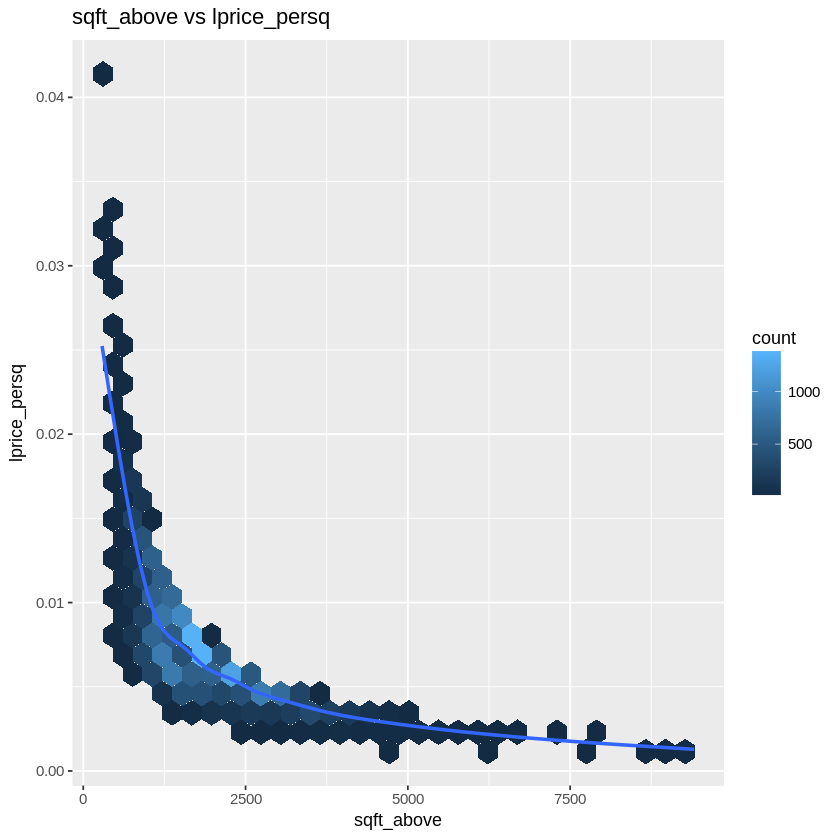

`geom_smooth()` using method = 'gam'


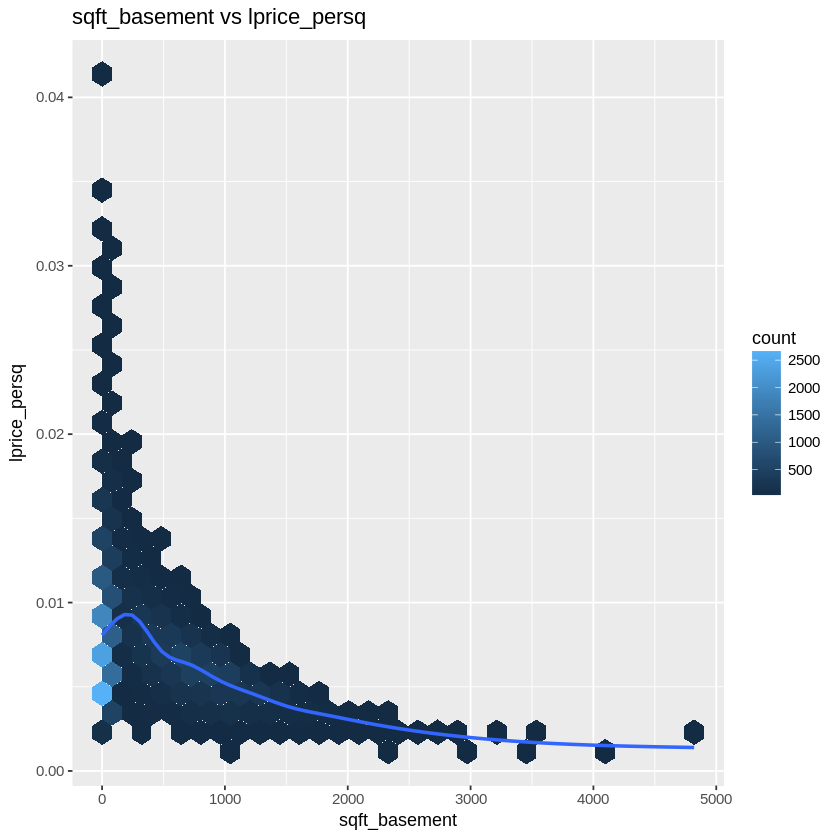

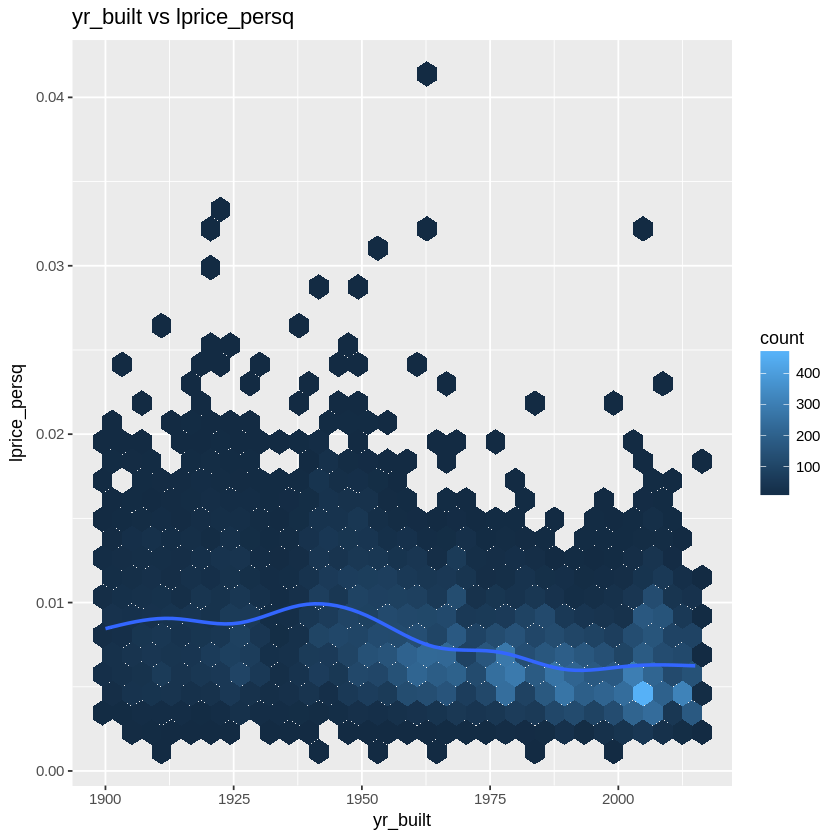

In [12]:
# Explore the relationship between the log price per square foot and the other 5 numeric features
x_cols <- c("sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "yr_built")
y_col <- 'lprice_persq'

x_cols %>% walk(gg_scatter, data = house, y_col) # scatter plots

x_cols %>% walk(gg_hexbin, data = house, y_col) # hexbin plots

<div class="alert alert-block alert-info">Examine these plots and answer the following questions:</div>
1. Is there a dependency of log price per square foot with size of the home and if so what? <br>
    Yes. The plots show the negative nonlinear relationship between log price per square foot and other 3 features of size of the home -- sqft_living, sqft_above, sqft_basement. 
2. Does the log price per square foot generally increase or decrease with the age of the home. <br>
    The log price per square foot generally increases with the age of the home. The houses built before 1950 have the higher log price per squre foot than the houses built after 1950. 

Now, you will examine the relationship between the log price per square foot and the categorical features. In the cell below create and execute code to display these plots.

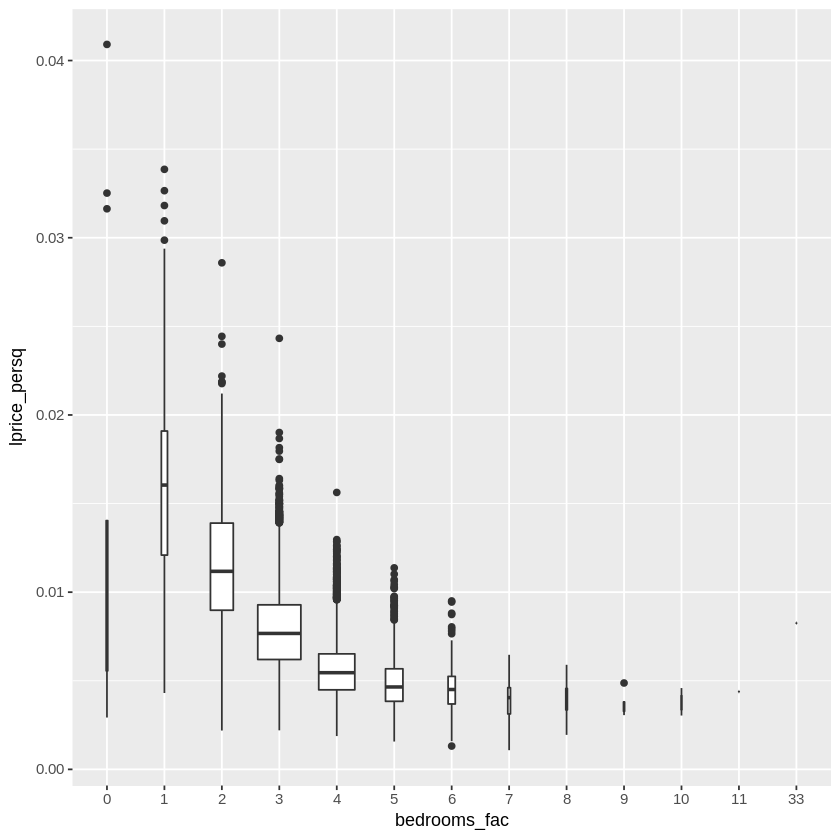

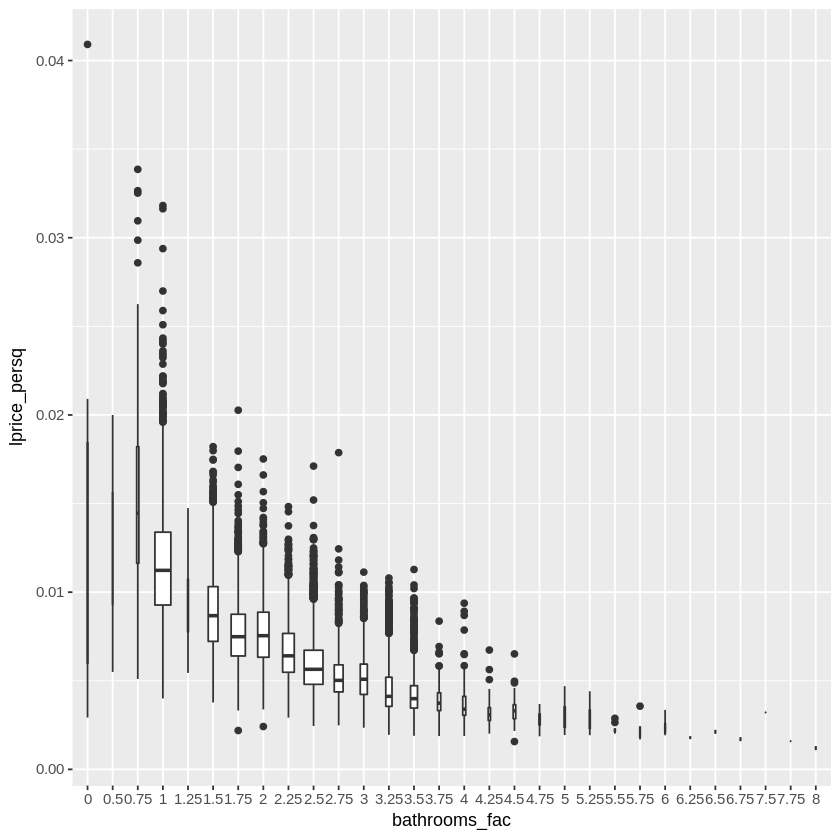

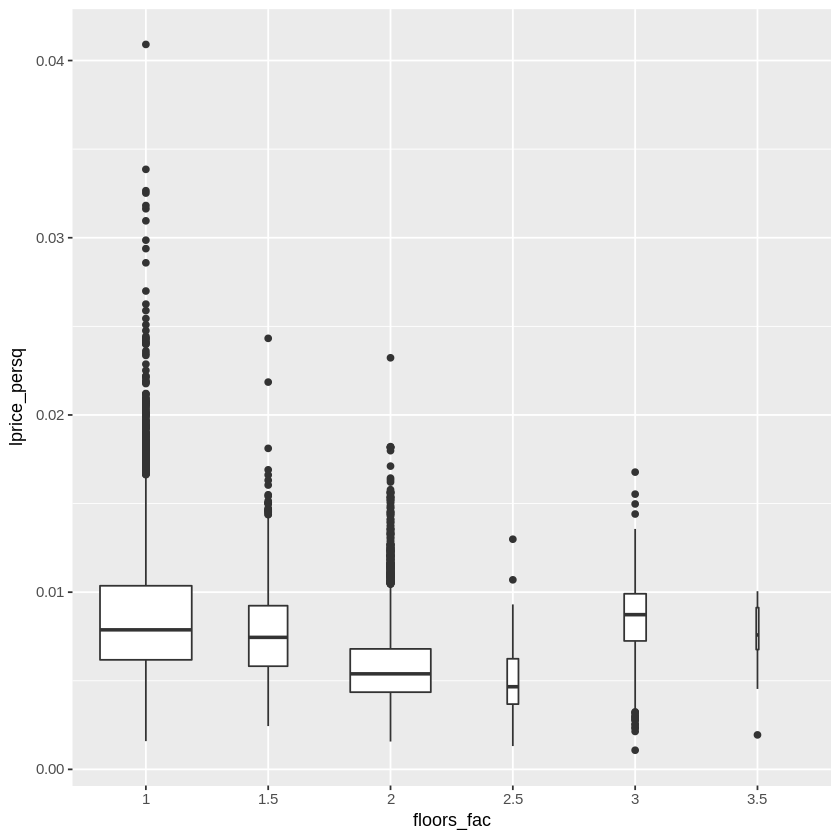

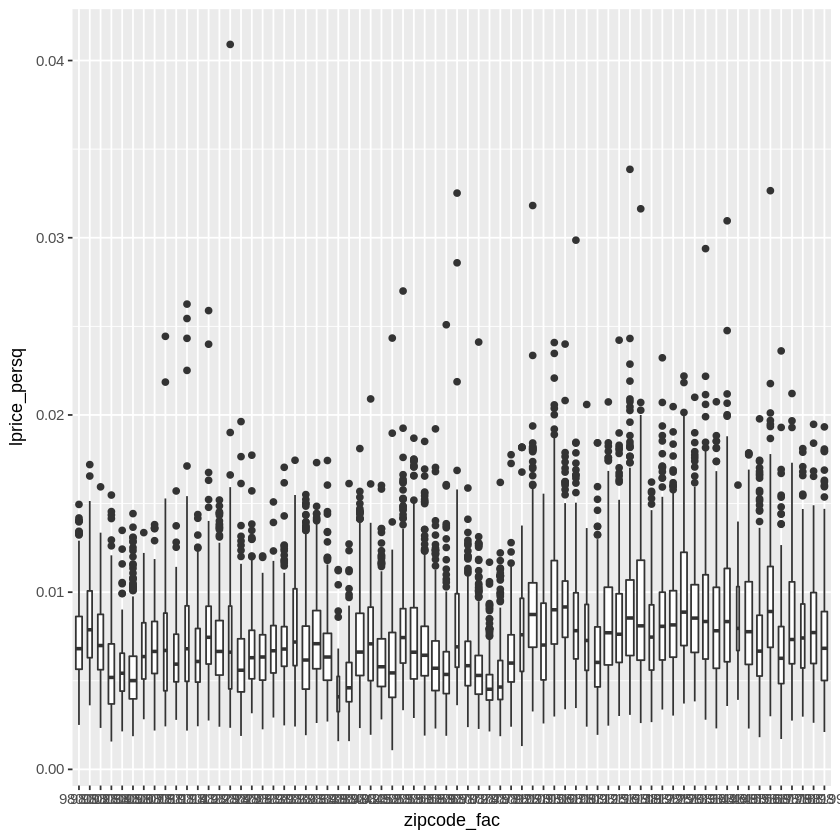

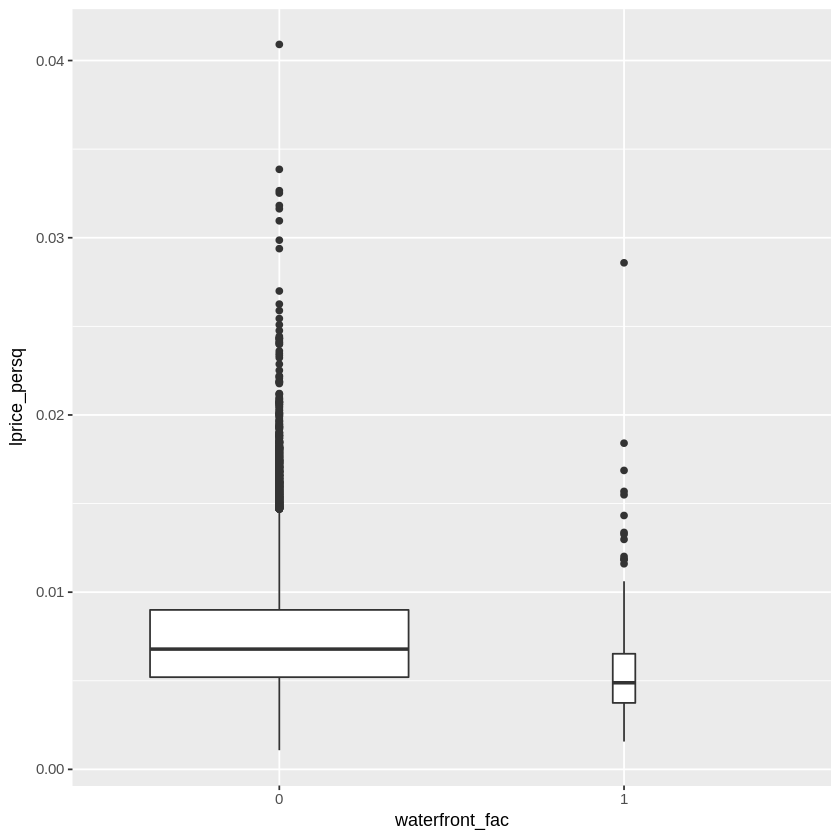

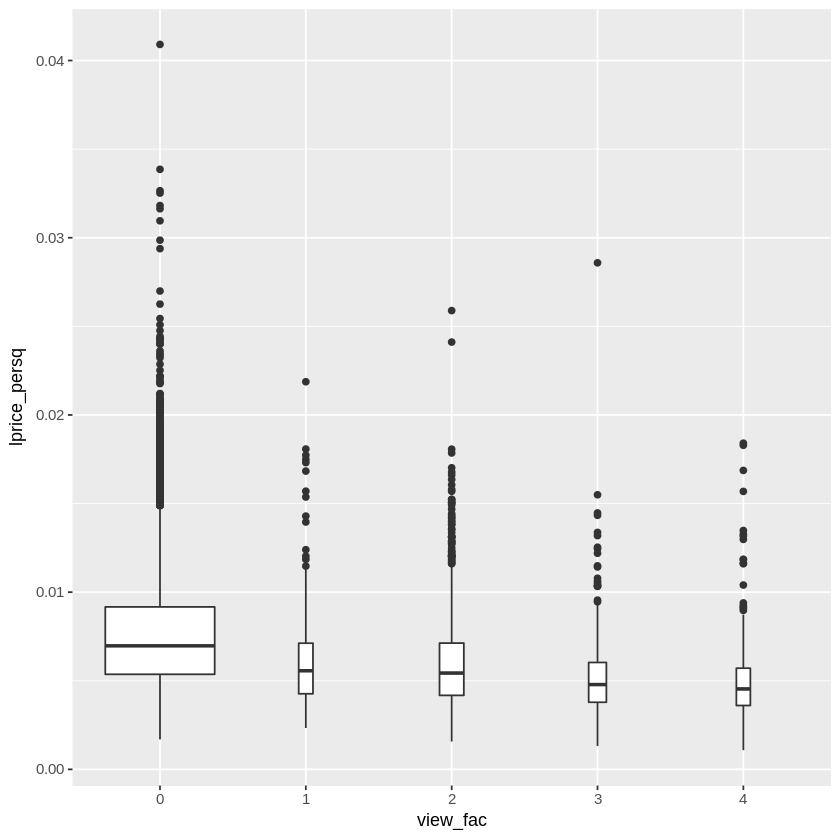

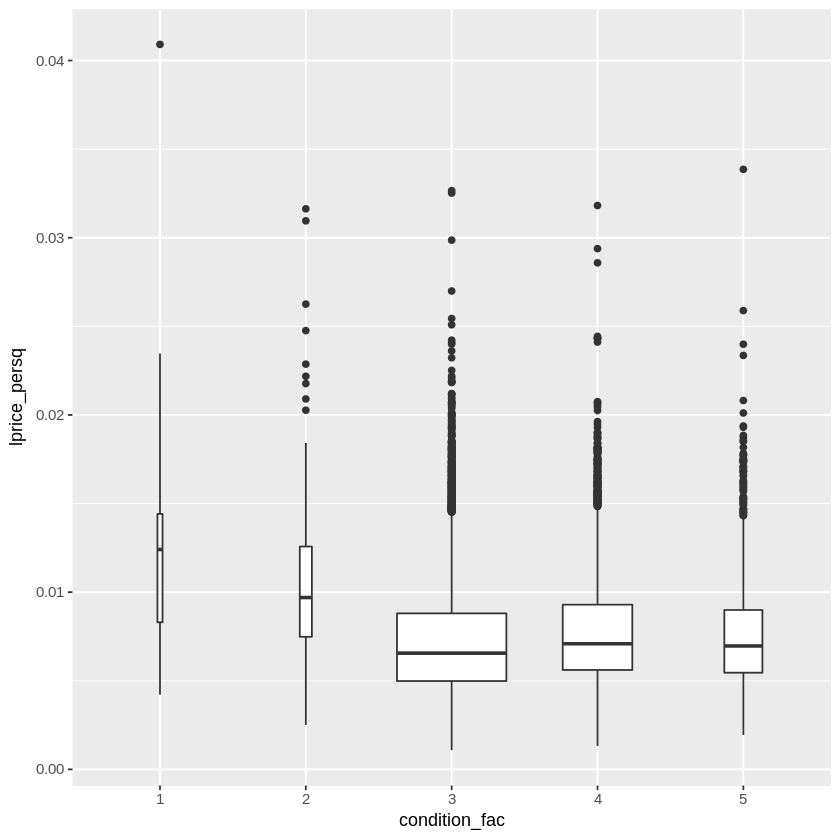

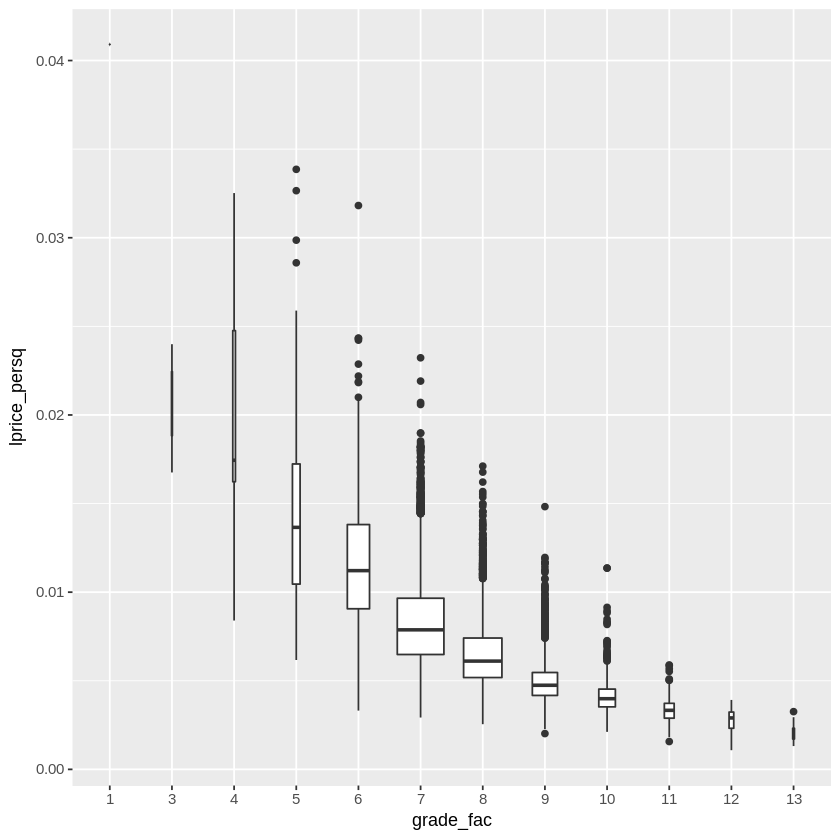

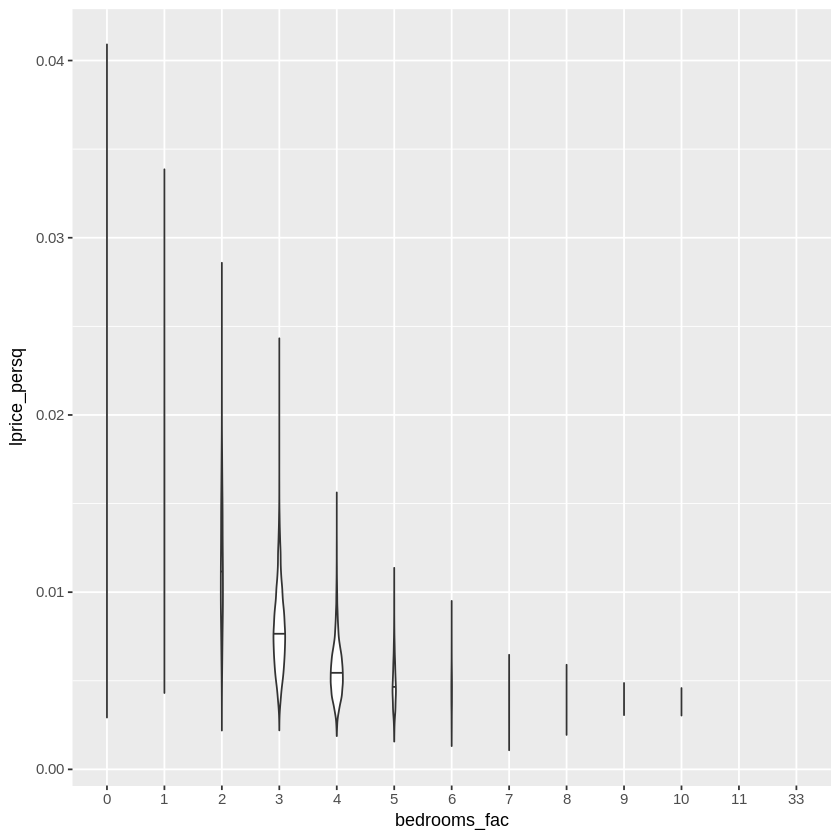

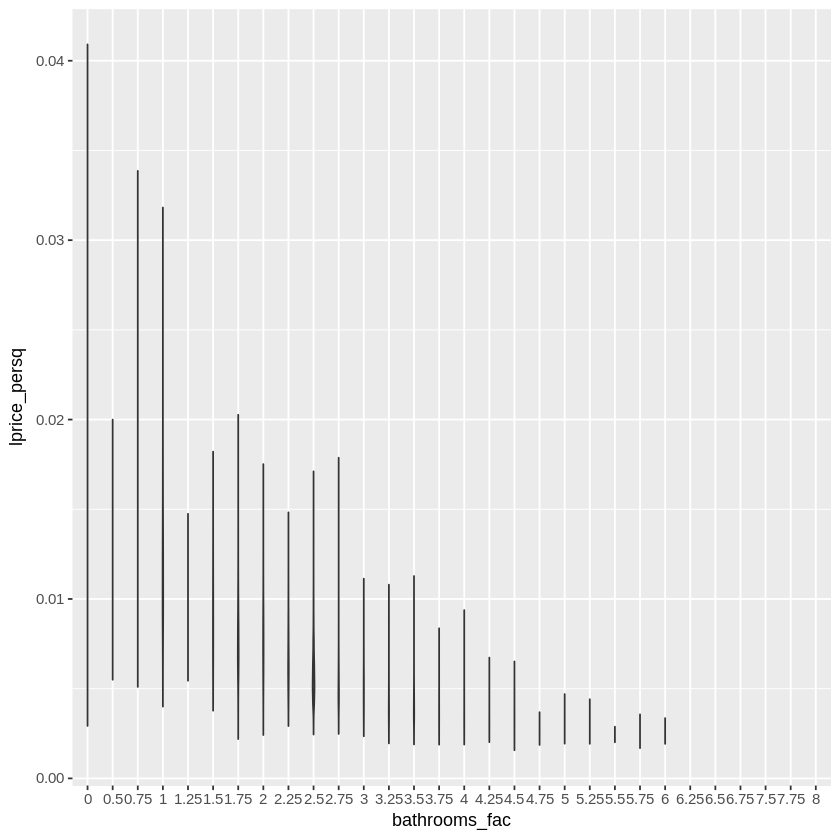

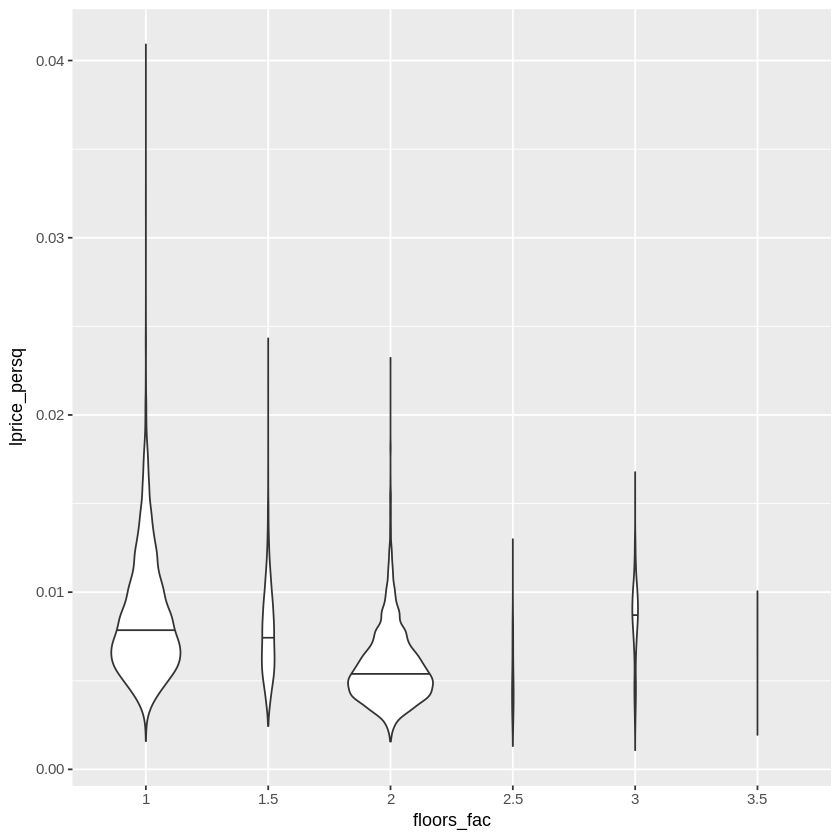

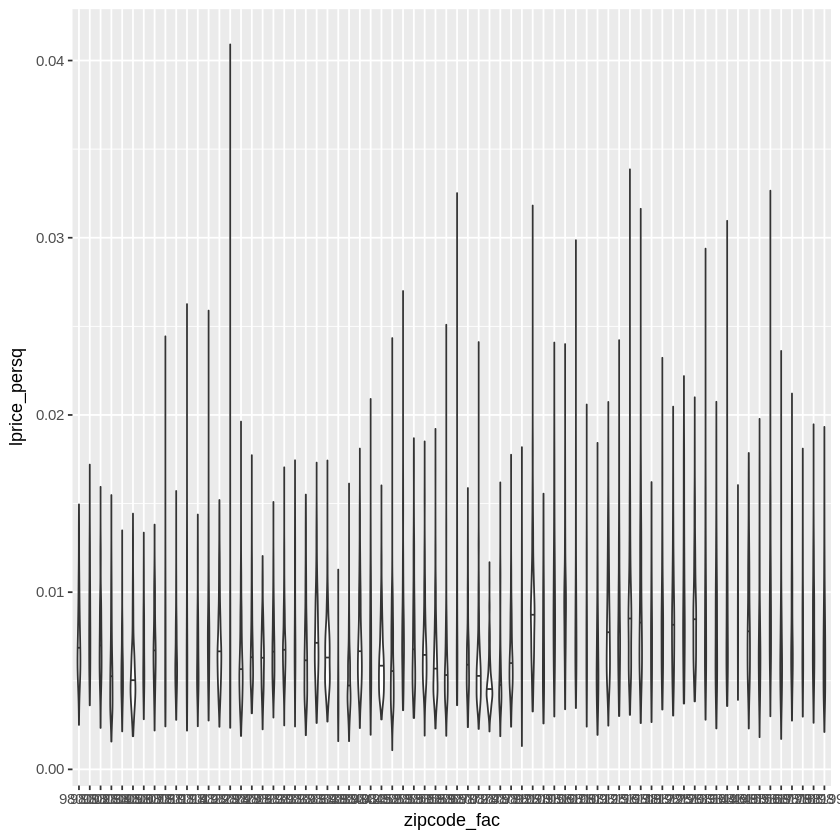

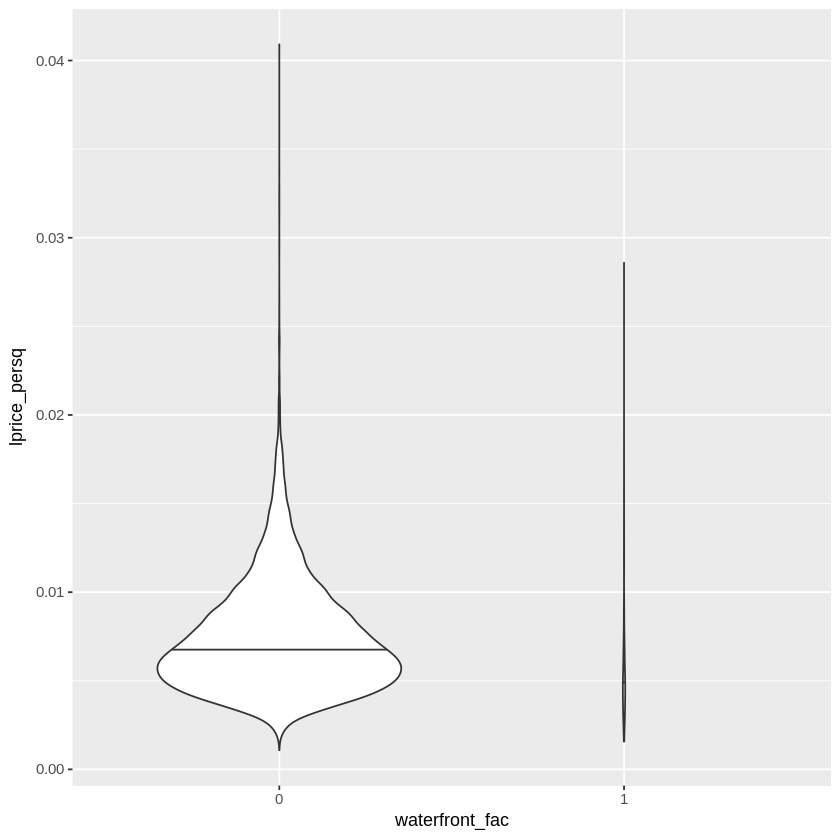

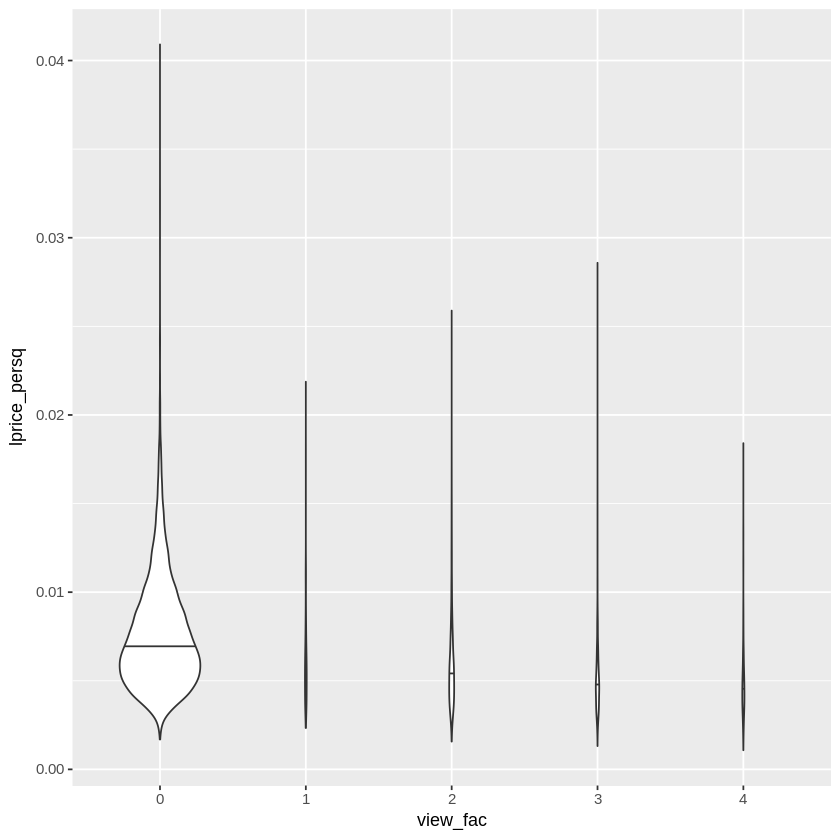

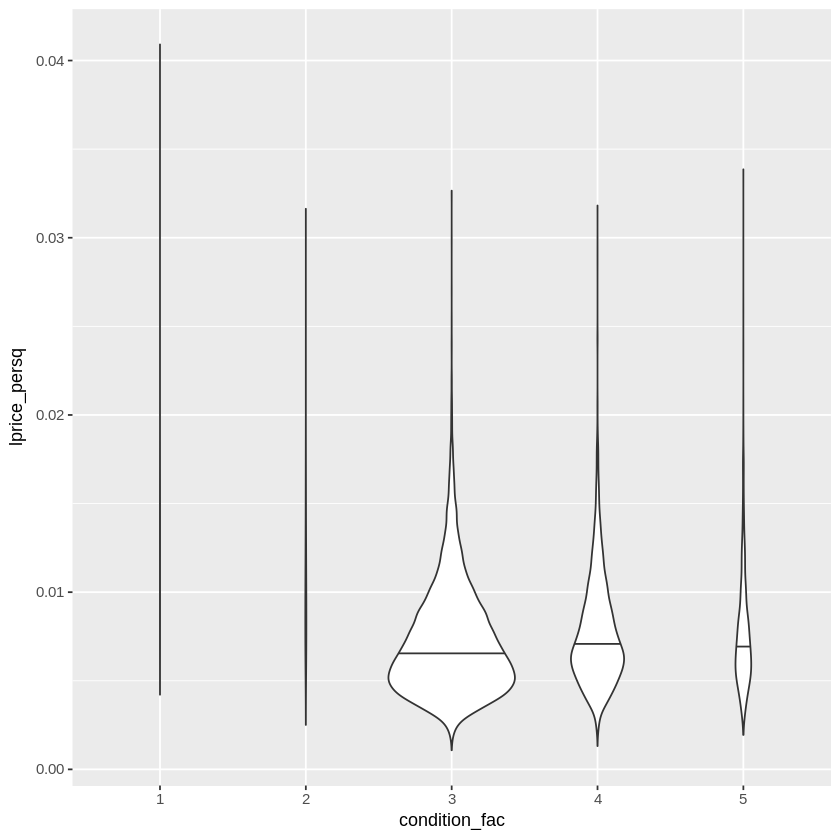

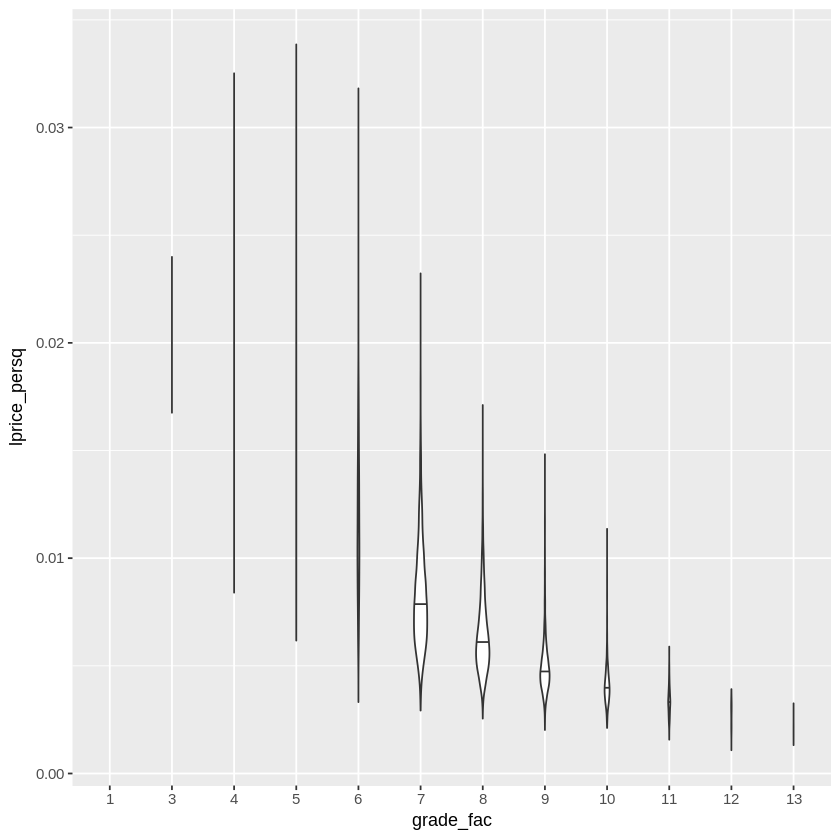

In [13]:
# Explore the relationship between the log price per square foot and the other 8 categorical features.
x_cols <- c("bedrooms_fac", "bathrooms_fac", "floors_fac", 
            "zipcode_fac", "waterfront_fac", "view_fac", "condition_fac", "grade_fac")

y_col = 'lprice_persq'

x_cols %>% walk(gg_boxplot, data = house, y_col)
x_cols %>% walk(gg_violinplot, data = house, y_col)

<div class="alert alert-block alert-info">Examine these plots and answer the following questions:</div>
1. Which two features show the most consistent difference or trend with the log price per square foot? <br>
    bedrooms (negative relationship); grade (negative relationship); waterfront(positive relationship)
2. Are there noticeable differences in log price per square foot between different zip code areas? <br>
    Yes, there is difference

### Another variable transformation

Review the plots you made of the log of price vs. `sqft_living`. Notice that the trend is not perfectly straight. Further, recall that the histogram of `sqft_living` was quite asymmetric. Is it possible to improve this situation with some kind of transformation? 

In the cell below try the following:
1. Use dplyr to compute the square root and log of `sqft_living`, and add these new features to your data frame.
2. Plot the histogram and/or density function of these new features. 

Observations: 21,613
Variables: 33
$ id               <chr> "7129300520", "6414100192", "5631500400", "2487200...
$ date             <dttm> 2014-10-13, 2014-12-09, 2015-02-25, 2014-12-09, 2...
$ price            <dbl> 221900, 538000, 180000, 604000, 510000, 1225000, 2...
$ bedrooms         <int> 3, 3, 2, 4, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 5, 4, 3,...
$ bathrooms        <dbl> 1.00, 2.25, 1.00, 3.00, 2.00, 4.50, 2.25, 1.50, 1....
$ sqft_living      <int> 1180, 2570, 770, 1960, 1680, 5420, 1715, 1060, 178...
$ sqft_lot         <int> 5650, 7242, 10000, 5000, 8080, 101930, 6819, 9711,...
$ floors           <dbl> 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, ...
$ waterfront       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ view             <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,...
$ condition        <int> 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3,...
$ grade            <int> 7, 7, 6, 7, 8, 11, 7, 7, 7, 7, 8, 7, 7, 7, 7, 9, 7...
$ sqft_above     

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


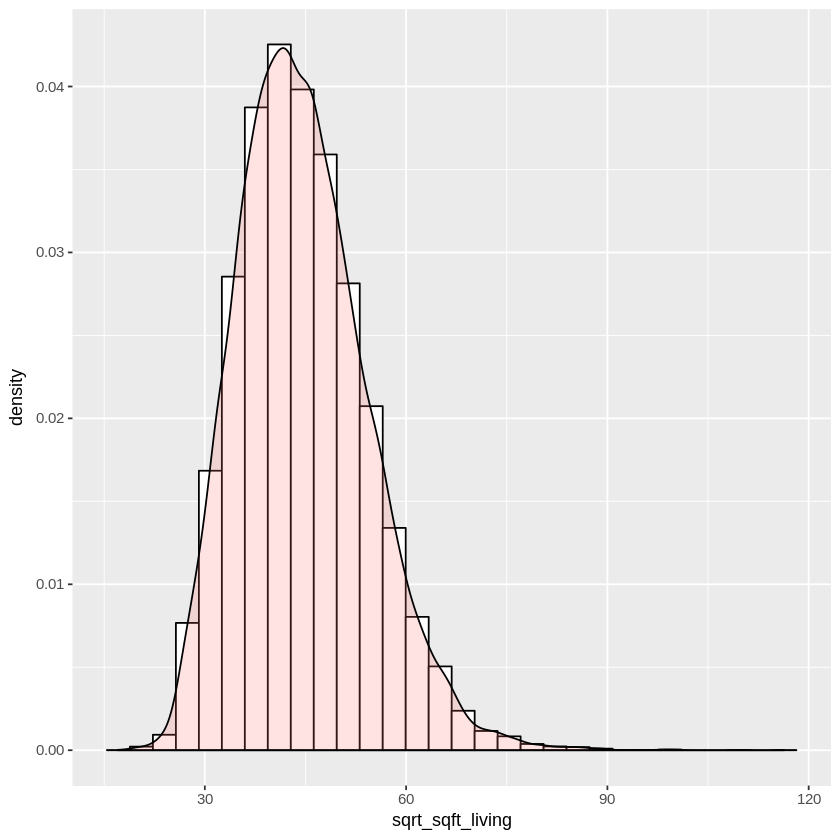

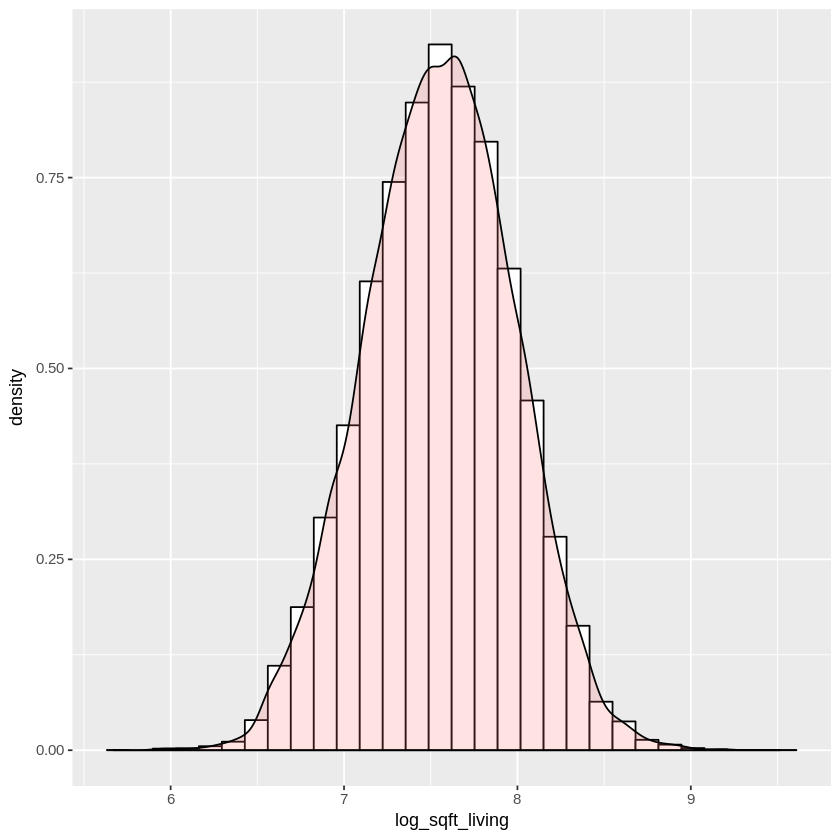

In [14]:
house <- house %>%
      mutate(sqrt_sqft_living = sqrt(sqft_living),
             log_sqft_living = log(sqft_living))

glimpse(house)

house %>% gg_histogram("sqrt_sqft_living")
house %>% gg_histogram("log_sqft_living")

<div class="alert alert-block alert-info">Which of the histograms and/or density functions for the transformed feature is more symmetric? <br>
    The histogram and density functions for log of sqft_living is more symmetric.</div>
    

A remaining question is if the relationship between the square root of living area and log price is noticeably different, when compared to the relationship living area and log price. To answer this question, use ggplot2, to plot a scatter plot or hexbin plot of square root of living area vs. log price. Be sure to include a smoother trend line in your plot.

`geom_smooth()` using method = 'gam'
`geom_smooth()` using method = 'gam'


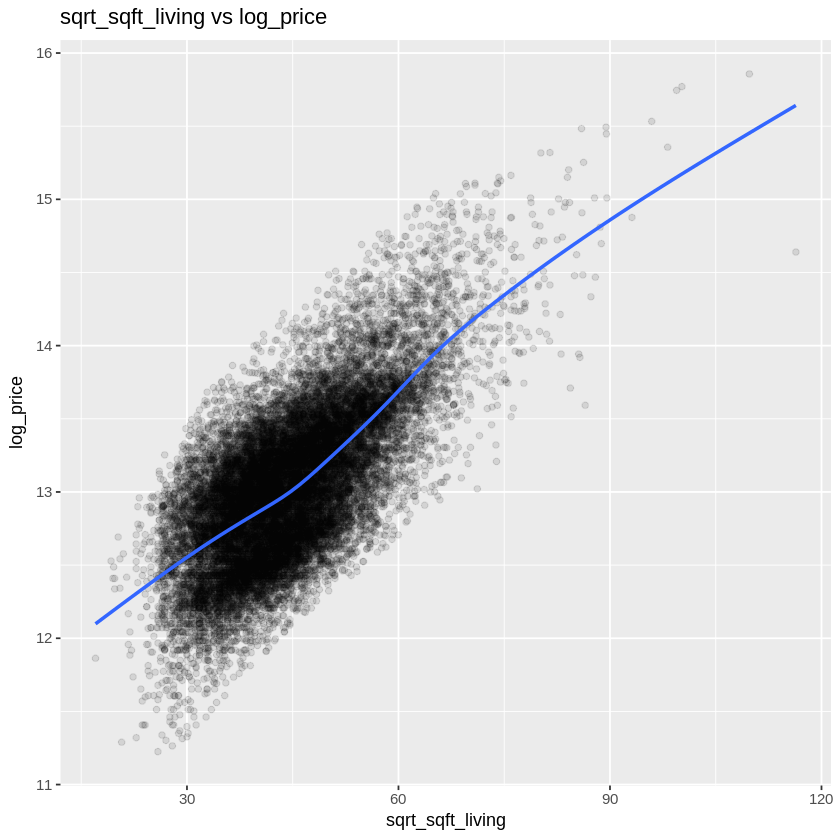

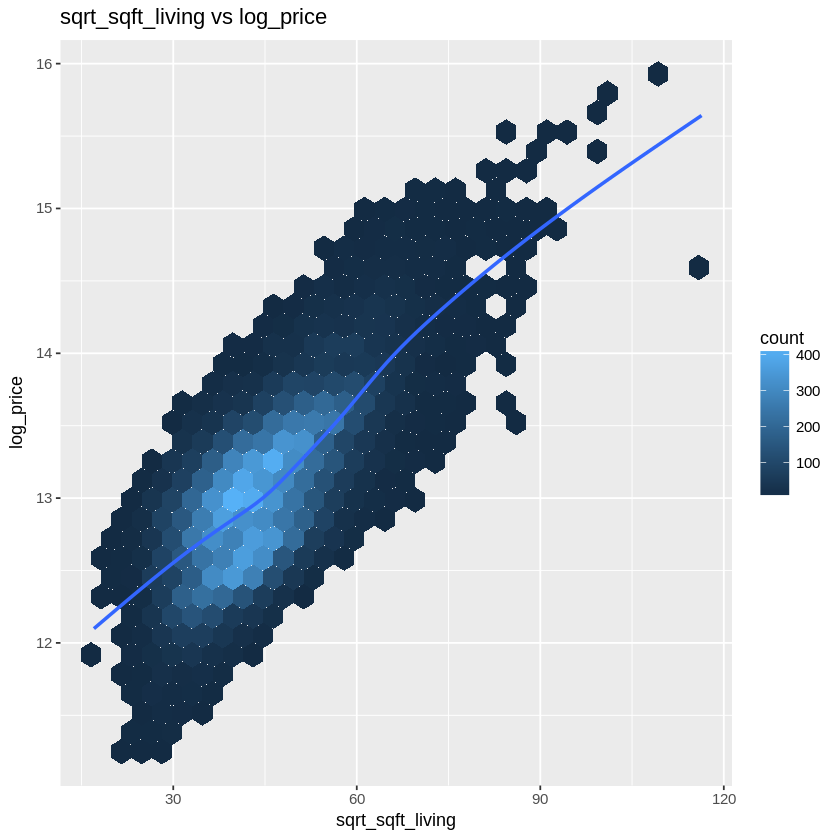

In [15]:
house %>% gg_scatter("sqrt_sqft_living", "log_price")
house %>% gg_hexbin("sqrt_sqft_living", "log_price")

`geom_smooth()` using method = 'gam'
`geom_smooth()` using method = 'gam'


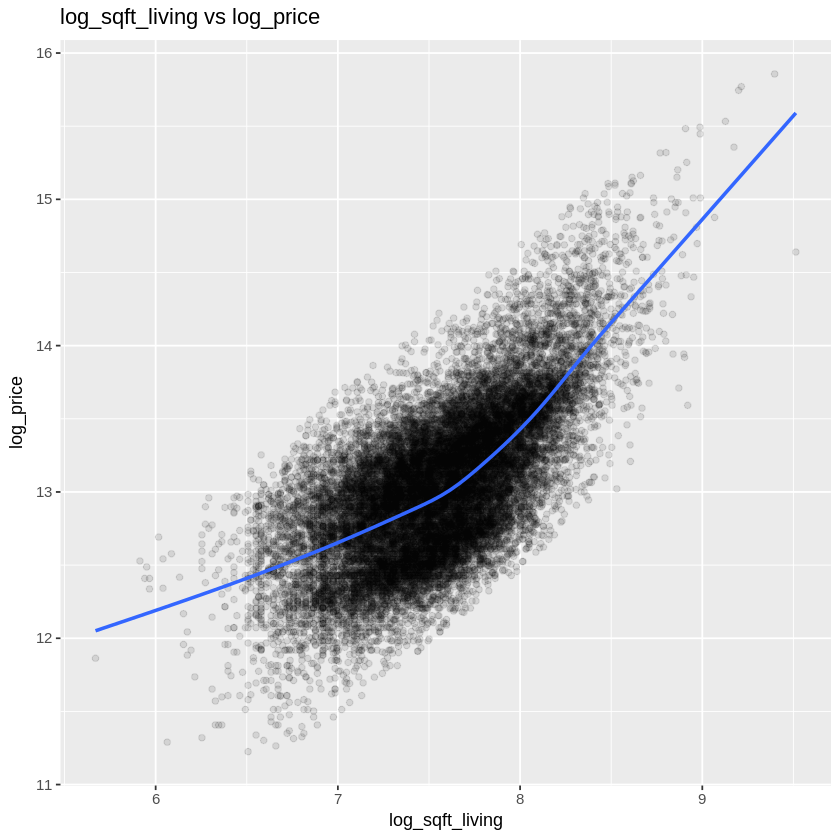

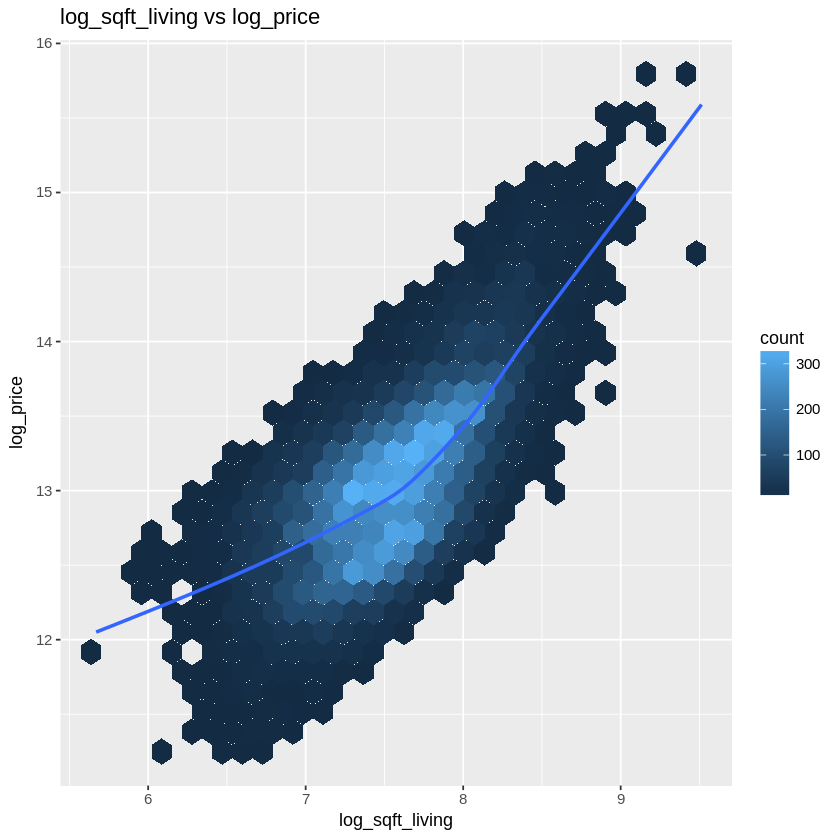

In [16]:
# Just try. The trend line for log of sqft_living vs. log of price is not as straight as 
# the trend line for square root of sqft_living vs. log of price
# So, this cell can be removed

house %>% gg_scatter("log_sqft_living", "log_price")
house %>% gg_hexbin("log_sqft_living", "log_price")

<div class="alert alert-block alert-info">Examine your plot(s). Is the shape of the smoothed trend line different from the plot of  living area vs. log price? </div>
    Answer: Yes. It is more staight than the plot of living area vs. log price.

## Summary Statistics

Now that you have visually explored the data set, you will now use summary statistical methods to explore the relationships in the data. With the visualizations you have already seen a number of relationships with apparently significant differences in the prices of homes. In this section, you will investigate the significance of some of these differences.

### Two population tests

As a first step you will investigate the significance in the differences in prices between waterfront homes and non-waterfront homes. The plots you created earlier showed that there was a noticeable price difference between waterfront and non-waterfront homes. The starting point is to confirm the apparent price difference is indeed significant. 

In the code cell below, create and execute the code to compute and display the results of a two sample t-test. **Hint** Use dplyr to create data frames for waterfront homes and non-waterfront homes. 

In [17]:
# Do t-test of the price for waterfront vs. non-waterfront homes
wt_price <- house %>% 
  #filter(waterfront_fac) %>%  
  group_by(waterfront_fac) %>%
  summarise(count=n(), min=min(`price`), mean=mean(`price` ), max=max(`price`), sds=sd(`price`))  

#we see that means are different, however both have fairly large standard deviation
print(wt_price)

tstat = (
        wt_price[wt_price$waterfront_fac == "0", ]$mean 
         -
        wt_price[wt_price$waterfront_fac == "1", ]$mean
        )         /
        as.numeric(sqrt
        (
          wt_price[wt_price$waterfront_fac == "0", ]$sds^2/wt_price[wt_price$waterfront_fac == "0", ]$count
          +
          wt_price[wt_price$waterfront_fac == "1", ]$sds^2/wt_price[wt_price$waterfront_fac == "1", ]$count
        ))

df <- min(wt_price[wt_price$waterfront_fac == "0", ]$count - 1, 
          wt_price[wt_price$waterfront_fac == "1", ]$count - 1)


sprintf("t-Statistics: %f; degrees of freedom: %f;", tstat, df)

#reject H0 if it's probability < 0.025 (0.25 = 5%/2 - two tailed test)
sprintf("Reject null hypothesis: %s", pt(abs(tstat), df, lower.tail = FALSE) < 0.025)

# A tibble: 2 x 6
  waterfront_fac count    min      mean     max       sds
          <fctr> <int>  <dbl>     <dbl>   <dbl>     <dbl>
1              0 21450  75000  531563.6 7700000  341599.6
2              1   163 285000 1661876.0 7062500 1120371.7


[1] "t-Statistics: -12.875877; degrees of freedom: 162.000000;"

[1] "Reject null hypothesis: TRUE"

<div class="alert alert-block alert-info">Examine the results of your t-test. Can you reject the null hypothesis that *difference between the price of waterfront and non-waterfront* homes not significant, and why? </div>
    Answer: Yes. We can reject the null hypothesis. That means the price of waterfront homes is significantly different with the price of non-waterfront homes.

Whatever price difference there might be between waterfront and non-waterfront homes could arise from a difference in the value of the property per square foot of living space. The charts you created earlier seemed to indicate that this was the case. 

In the cell below create and execute the code to preform and display the results of a t-test of the log price per square foot for waterfront vs. non-waterfront homes. **Hint:** Since we suspect that waterfront property has a higher log price from square foot, use the argument `alternative = "greater"` for the `t.test` function. Make sure the values of log price per square foot of waterfront homes is the first argument. 

In [18]:
# Result modified !!!!! See Greg's comment in L09 code talk

# Use t.test to do t-test of the log price per square foot for waterfront vs. non-waterfront homes
wt1_lprice <- house %>%
    filter(waterfront_fac == "1") %>%
    select(lprice_persq)
#wt1_lprice

wt0_lprice <- house %>%
    filter(waterfront_fac == "0") %>%
    select(lprice_persq)
#wt1_lprice

t.test(wt1_lprice$lprice_persq, wt0_lprice$lprice_persq, alternative = 'greater')


	Welch Two Sample t-test

data:  wt1_lprice$lprice_persq and wt0_lprice$lprice_persq
t = -6.3066, df = 164, p-value = 1
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -0.002177728          Inf
sample estimates:
  mean of x   mean of y 
0.005719521 0.007444734 


<div class="alert alert-block alert-info">Examine the results of your t-test. Can you reject the null hypothesis that the *log price per square foot* for waterfront homes is less than or equal to than non-waterfront homes? </div>
    No. The null hypothesis is not rejected. The *log price per square foot* for waterfront homes is less than or equal to than non-waterfront homes.

It is also possible that waterfront homes are simply larger than non-waterfront homes. In the cell below create and execute the code to preform and display the results of a t-test of the square foot of living space for waterfront vs. non-waterfront homes.

In [19]:
# Result modified !!!!! See Greg's comment in L09 code talk

# Use t.test to do t-test of the square foot of living space for waterfront vs. non-waterfront homes
wt1_sqft_living <- house %>%
    filter(waterfront_fac == '1') %>%
    select(sqft_living)

wt0_sqft_living <- house %>% 
    filter(waterfront_fac == '0') %>%
    select(sqft_living)

t.test(wt1_sqft_living$sqft_living, wt0_sqft_living$sqft_living, alternative = "less")



	Welch Two Sample t-test

data:  wt1_sqft_living$sqft_living and wt0_sqft_living$sqft_living
t = 8.7506, df = 162.78, p-value = 1
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
     -Inf 1310.447
sample estimates:
mean of x mean of y 
 3173.687  2071.588 


<div class="alert alert-block alert-info">Examine the results of your t-test. Can you reject the null hypothesis that the *size* of waterfront homes is greater than non-waterfront homes?   </div>
     Yes. The null hypothesis is not rejected. The *size* of waterfront homes is greater than non-waterfront homes.

### Grouped aggregations and summaries

You have investigated some simple relationships between waterfront homes and non-waterfront homes. Now, you will investigate the effects of location. In particular, you will investigate the effect of zip code area on the prices and characteristics of homes.  

As a first step you will create and execute code to perform the following operations using a dplyr verb chain:
1. Group the table by the zip code.
2. For each group, compute the following summary statistics for the homes in the groups
  - Number (count)
  - Mean log price
  - Median log price
  - Standard deviation of the log of price
  - Mean log price per square foot 
  - Median log price per square foot
  - Standard deviation of log price per square foot
3. Sort the groups by mean price
  
Print and examine the resulting summary tables for the 10 rows of the most and least expensive mean price zip codes. 

In [20]:
house %>% 
    group_by(zipcode) %>%
    summarize(count=n(), mean=mean(`log_price` ), median=median(`log_price`), sds=sd(`log_price`)) %>%
    arrange(mean %>% desc()) %>%
    print(head(10)) %>%
    tail(10)


house %>% 
    group_by(zipcode) %>%
    summarise(count=n(), mean=mean(lprice_persq), median=median(`lprice_persq`), sds=sd(`lprice_persq`)) %>%
    arrange(mean %>% desc()) %>%
    print(head(10)) %>%
    tail(10)



# A tibble: 70 x 5
   zipcode count     mean   median       sds
     <int> <int>    <dbl>    <dbl>     <dbl>
 1   98039    50 14.47003 14.45339 0.4745788
 2   98004   317 14.00838 13.95527 0.4537474
 3   98040   282 13.90256 13.80924 0.4012818
 4   98112   269 13.77928 13.72668 0.4988403
 5   98109   109 13.58536 13.50899 0.4403891
 6   98102   105 13.56355 13.48701 0.4748035
 7   98006   498 13.56241 13.54132 0.4360199
 8   98005   168 13.56010 13.54824 0.2904471
 9   98119   184 13.55992 13.52108 0.4057914
10   98105   229 13.55873 13.42247 0.4396038
# ... with 60 more rows


zipcode count mean     median   sds      
1  98178   262   12.55938 12.53637 0.3927232
2  98003   280   12.53986 12.49678 0.3086117
3  98198   280   12.53205 12.48749 0.3981400
4  98188   136   12.51861 12.48370 0.3312261
5  98148    57   12.51399 12.53538 0.3082471
6  98023   499   12.51242 12.50042 0.3174986
7  98001   362   12.49135 12.46844 0.3238185
8  98032   125   12.39819 12.42521 0.2824866
9  98168   269   12.34447 12.36734 0.3128324
10 98002   199   12.33770 12.36734 0.2377800

# A tibble: 70 x 5
   zipcode count        mean      median         sds
     <int> <int>       <dbl>       <dbl>       <dbl>
 1   98126   354 0.009882338 0.008873115 0.004004900
 2   98106   335 0.009841428 0.009005856 0.003795143
 3   98168   269 0.009638933 0.008909360 0.003729826
 4   98107   266 0.009379037 0.009164224 0.003062271
 5   98146   288 0.009199303 0.008342024 0.003915918
 6   98117   553 0.009107301 0.008543114 0.003717406
 7   98118   508 0.009103135 0.008099325 0.003826606
 8   98103   602 0.009070115 0.008739309 0.003197173
 9   98136   263 0.009052797 0.008345828 0.003907126
10   98133   494 0.008883590 0.008536352 0.002999148
# ... with 60 more rows


zipcode count mean        median      sds        
1  98053   405   0.006015186 0.005443867 0.002481504
2  98065   310   0.005813333 0.005358111 0.002416971
3  98004   317   0.005803822 0.005188333 0.002565797
4  98074   441   0.005686338 0.005301980 0.002170004
5  98005   168   0.005672386 0.005425866 0.001878704
6  98006   498   0.005440187 0.005010151 0.002143975
7  98077   198   0.005438808 0.004647505 0.002344308
8  98040   282   0.005095695 0.004603736 0.001917537
9  98075   359   0.004859510 0.004521834 0.001465869
10 98039    50   0.004619762 0.004095718 0.002207712

<div class="alert alert-block alert-info">Examine and compare the tables of the highest average price and lowest average price of homes zip code areas. Answer the following questions:</div>
1.	Do any of the mean or median log prices for the lowest and highest priced zip code areas overlap? <br>
    Not overlap for both mean and median.
2.	Do any of the mean or median log prices per square foot for the lowest and highest priced zip code areas overlap? <br>
    Not overlap for both mean and median.
3.	Do the standard deviations of the mean log price and mean log price per square foot indicate a distribution with high or lot dispersion for each zip code? What does this indicate in terms of how similar home prices are within zip code areas? <br>
    Not significant dispersion of standard deviation for both mean log price and mean log price per square foot. 


Next, you will determine which features might be significant in determining the differences in prices of homes by zip code area. 
Use a t-test to determine if the differences in log prices per square foot are significant between the 10 highest and 10 lowest zip code areas. The log price per square foot is used since the visualization revealed that this transformed feature was closer to a Normal distribution that the price per square foot. 
**Hints:** You can perform the required processing as follows:
1.	Use the head and tail functions to find the 10 zip codes for the highest and lowest priced areas.
2.	Filter the data set for two subsets; one for high priced and low priced areas. The goal is to find all the rows in each of the zip code areas, so you can reference the values needed for the t-tests.
3.	Use the appropriate column from the two subsets as the data for the t.test function. 
4.	Since we suspect that high priced areas have higher log prices per square foot, use the alternative = "greater" argument for `t.test.
 prices are within zip code areas?


In [21]:
# Filter the data set for two subsets; one for high priced and low priced areas.
top10_zipcode <- house %>% 
    group_by(zipcode) %>%
    summarize(mean = mean(lprice_persq)) %>%
    arrange(mean %>% desc()) %>%
    head(10)

print(top10_zipcode)

top10 <- house %>% 
     filter(zipcode %in% top10_zipcode$zipcode)

glimpse(top10)

last10_zipcode <- house %>% 
    group_by(zipcode) %>%
    summarize(mean = mean(lprice_persq)) %>%
    arrange(mean %>% desc()) %>%
    tail(10)

print(last10_zipcode$zipcode)

last10 <- house %>% 
     filter(zipcode %in% last10_zipcode$zipcode)

glimpse(last10)

# A tibble: 10 x 2
   zipcode        mean
     <int>       <dbl>
 1   98126 0.009882338
 2   98106 0.009841428
 3   98168 0.009638933
 4   98107 0.009379037
 5   98146 0.009199303
 6   98117 0.009107301
 7   98118 0.009103135
 8   98103 0.009070115
 9   98136 0.009052797
10   98133 0.008883590
Observations: 3,932
Variables: 33
$ id               <chr> "2487200875", "2414600126", "1175000570", "9297300...
$ date             <dttm> 2014-12-09, 2015-04-15, 2015-03-12, 2015-01-24, 2...
$ price            <dbl> 604000, 229500, 530000, 650000, 485000, 385000, 28...
$ bedrooms         <int> 4, 3, 5, 4, 4, 4, 2, 4, 3, 4, 3, 2, 3, 2, 2, 3, 3,...
$ bathrooms        <dbl> 3.00, 1.00, 2.00, 3.00, 1.00, 1.75, 1.50, 1.75, 1....
$ sqft_living      <int> 1960, 1780, 1810, 2950, 1600, 1620, 1190, 2330, 10...
$ sqft_lot         <int> 5000, 7470, 4850, 5000, 4300, 4980, 1265, 5000, 30...
$ floors           <dbl> 1.0, 1.0, 1.5, 2.0, 1.5, 1.0, 3.0, 1.5, 1.5, 2.0, ...
$ waterfront       <int> 0, 0, 0, 0, 0,

In [22]:

# Do t-test to determine if the differences in log prices per square foot are significant between the 10 highest and 10 lowest zip code areas

t.test(top10$lprice_persq, last10$lprice_persq, alternative = 'greater')


	Welch Two Sample t-test

data:  top10$lprice_persq and last10$lprice_persq
t = 53.203, df = 6653.1, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.003620093         Inf
sample estimates:
  mean of x   mean of y 
0.009263134 0.005527532 


<div class="alert alert-block alert-info">Examine the results of your t-test. Can you reject the null hypothesis that the *log price per square foot* of the high priced zip code areas are less than or equal to the low priced areas. </div>
    Yes. We can reject the null hypothesis. The *log price per square foot* of the high priced zip code areas are significantly greater than the low priced area. 

The visualizations indicate that high priced homes are larger than low priced homes. You will now investigate if the difference in the log square foot of living area is significantly larger for high mean cost zip code areas than low cost areas. Test this hypothesis with a t.test on the log of square foot living area for the 10 highest cost and lowest cost zip coded areas. Again, we use the log transformed variables since it is closer to a Normal distribution.  

In [23]:

# Do t-test to determine if the difference in the log square foot of living area is significantly larger for high mean cost zip code areas than low cost areas

t.test(top10$log_sqft_living, last10$log_sqft_living, alternative = "greater")


	Welch Two Sample t-test

data:  top10$log_sqft_living and last10$log_sqft_living
t = -59.191, df = 6562.5, p-value = 1
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -0.5755194        Inf
sample estimates:
mean of x mean of y 
 7.311888  7.871845 


<div class="alert alert-block alert-info">Examine the results of your t-test. Can you reject the null hypothesis that the *log of square foot living area* of the high priced zip code areas are less than or equal to the low priced areas?</div>
    No. The null hypothesis is not rejected. The *log of square foot living area* of the high priced zip code areas are less than or equal to the low priced areas.

The visualizations indicated that homes with more bedrooms and bathrooms are more expensive in general. You will investigate if this difference is significant. 

As a first step, use dplyr verbs to compute the mean and  median of the number of bathrooms and bedrooms for the 10 highest and lowest median priced zip code areas. 

In [24]:
# Compute the mean and median of the number of bathrooms and bedrooms for the 10 highest and lowest median priced zip code areas
top10_zipcode_medpr <- house %>% 
    group_by(zipcode) %>%
    summarize(median_price = median(lprice_persq), 
              mean_bedrooms = mean(bedrooms), median_bedrooms = median(bedrooms),
              mean_bathrooms = mean(bathrooms), median_bathrooms = median(bathrooms)) %>%
    arrange(median_price %>% desc()) %>%
    head(10)

print(top10_zipcode_medpr)

last10_zipcode_medpr <- house %>% 
    group_by(zipcode) %>%
    summarize(median_price = median(lprice_persq), 
              mean_bedrooms = mean(bedrooms), median_bedrooms = median(bedrooms),
              mean_bathrooms = mean(bathrooms), median_bathrooms = median(bathrooms)) %>%
    arrange(median_price %>% desc()) %>%
    tail(10)

print(last10_zipcode_medpr)


# A tibble: 10 x 6
   zipcode median_price mean_bedrooms median_bedrooms mean_bathrooms
     <int>        <dbl>         <dbl>           <dbl>          <dbl>
 1   98107  0.009164224      2.996241               3       2.045113
 2   98106  0.009005856      3.101493               3       1.804478
 3   98168  0.008909360      2.996283               3       1.433086
 4   98126  0.008873115      2.836158               3       1.678672
 5   98103  0.008739309      3.059801               3       1.934801
 6   98117  0.008543114      3.019892               3       1.812839
 7   98133  0.008536352      3.131579               3       1.731781
 8   98136  0.008345828      2.931559               3       1.865019
 9   98146  0.008342024      3.125000               3       1.633681
10   98125  0.008154017      3.202439               3       1.818902
# ... with 1 more variables: median_bathrooms <dbl>
# A tibble: 10 x 6
   zipcode median_price mean_bedrooms median_bedrooms mean_bathrooms
     <int>   

<div class="alert alert-block alert-info">Examine these results and determine if the highest priced zip code areas have more  bedrooms and bathrooms than for the lowest priced zip code areas? </div>
    No. Actually, the higherst priced zip code areas have less bedrooms and bathooms than for the lowerst priced zip code areas.

Now, the questions are if the differences in the number of bedrooms and bathrooms in the 10 highest price and lowest price zip code areas are significant. Use a one sided t-test to determine if these differences are significant.

In [25]:

# Do t-test to determine if the differences in the number of bedrooms and bathrooms in the 10 highest price and lowest price zip code areas are significant

top10_medpr <- house %>%
    filter(zipcode %in% top10_zipcode_medpr$zipcode)

last10_medpr <- house %>%
    filter(zipcode %in% last10_zipcode_medpr$zipcode)

t.test(top10_medpr$bedrooms, last10_medpr$bedrooms, alternative = 'greater')

t.test(top10_medpr$bathrooms, last10_medpr$bathrooms, alternative = 'greater')


	Welch Two Sample t-test

data:  top10_medpr$bedrooms and last10_medpr$bedrooms
t = -27.945, df = 6858.4, p-value = 1
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -0.6928497        Inf
sample estimates:
mean of x mean of y 
 3.048774  3.703104 



	Welch Two Sample t-test

data:  top10_medpr$bathrooms and last10_medpr$bathrooms
t = -41.746, df = 6369.4, p-value = 1
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -0.8047564        Inf
sample estimates:
mean of x mean of y 
 1.788667  2.562913 


<div class="alert alert-block alert-info">Examine the results of your t-tests and answer these questions:</div>

1. Can you reject the null hypothesis that the number of bedrooms for the homes in the highest zip code areas are less than or equal to the number of bedrooms in the lowest area. <br>
    No. The null hypothesis is not rejected. The number of bedrooms for the homes in the highest zip code areas are less than or equal to the number of bedrooms in the lowest area.

2. Can you reject the null hypothesis that the number of bathrooms for the homes in the highest zip code areas are less than or equal to the number of bedrooms in the lowest area. <br>
    No. The null hypothesis is not rejected. The number of bathrooms for the homes in the highest zip code areas are less than or equal to the number of bedrooms in the lowest area.

## Prediction of Home Price

You have explored the data set and tested the significance of some of the relationships in the data. Now, you will compute and test a linear regression model to predict the price of homes in King County. 

As a first step, compute a linear regression model and print the summary and coefficient confidence intervals to predict the log price of homes. Some features, such as `ID` are known to not be useful in predicting price. Use the following features:
- bedrooms
- bathrooms
- sqft_living             
- sqft_lot
- floors
- waterfront            
- view
- condition
- grade
- sqft_above 
- square root of sqft_living
- log of sqft_living

**Hint:** Ensure that you scale the features before you compute the model. You can use `lapply` with the R `scale` function to iterate over the numeric feature columns. 

In [26]:
summary(house)

      id                 date                         price        
 Length:21613       Min.   :2014-05-02 00:00:00   Min.   :  75000  
 Class :character   1st Qu.:2014-07-22 00:00:00   1st Qu.: 321950  
 Mode  :character   Median :2014-10-16 00:00:00   Median : 450000  
                    Mean   :2014-10-29 04:38:01   Mean   : 540088  
                    3rd Qu.:2015-02-17 00:00:00   3rd Qu.: 645000  
                    Max.   :2015-05-27 00:00:00   Max.   :7700000  
                                                                   
    bedrooms        bathrooms      sqft_living       sqft_lot      
 Min.   : 0.000   Min.   :0.000   Min.   :  290   Min.   :    520  
 1st Qu.: 3.000   1st Qu.:1.750   1st Qu.: 1427   1st Qu.:   5040  
 Median : 3.000   Median :2.250   Median : 1910   Median :   7618  
 Mean   : 3.371   Mean   :2.115   Mean   : 2080   Mean   :  15107  
 3rd Qu.: 4.000   3rd Qu.:2.500   3rd Qu.: 2550   3rd Qu.:  10688  
 Max.   :33.000   Max.   :8.000   Max.   :13540 

In [27]:
# Scale the features before computing the model

normalize = function(x) (x - mean(x))/sd(x)
    
numeric_features <- c("sqft_living", "sqft_lot", "sqft_above", "sqrt_sqft_living")

numeric_features

house_new <- house %>%
    select(numeric_features)
    
i <- sapply(house_new, is.numeric)    
house_new[i] <- lapply(house_new[i], normalize)
glimpse(house_new)

house_new <- house_new %>%
    mutate(price = house$price,
          log_price = house$log_price,
          bedrooms_fac = house$bedrooms_fac,
          bathrooms_fac = house$bathrooms_fac,
          floors_fac = house$floors_fac,
          waterfront_fac = house$waterfront_fac,
          view_fac = house$view_fac,
          grade_fac = house$grade_fac,
          condition_fac = house$condition_fac
          )
    


glimpse(house_new)

[1] "sqft_living"      "sqft_lot"         "sqft_above"       "sqrt_sqft_living"

Observations: 21,613
Variables: 4
$ sqft_living      <dbl> -0.9798124, 0.5336220, -1.4262210, -0.1305470, -0....
$ sqft_lot         <dbl> -0.2283160, -0.1898810, -0.1232956, -0.2440088, -0...
$ sqft_above       <dbl> -0.73469064, 0.46083017, -1.22980532, -0.89167822,...
$ sqrt_sqft_living <dbl> -1.07391406, 0.63919567, -1.76593307, -0.03406408,...
Observations: 21,613
Variables: 13
$ sqft_living      <dbl> -0.9798124, 0.5336220, -1.4262210, -0.1305470, -0....
$ sqft_lot         <dbl> -0.2283160, -0.1898810, -0.1232956, -0.2440088, -0...
$ sqft_above       <dbl> -0.73469064, 0.46083017, -1.22980532, -0.89167822,...
$ sqrt_sqft_living <dbl> -1.07391406, 0.63919567, -1.76593307, -0.03406408,...
$ price            <dbl> 221900, 538000, 180000, 604000, 510000, 1225000, 2...
$ log_price        <dbl> 12.30998, 13.19561, 12.10071, 13.31133, 13.14217, ...
$ bedrooms_fac     <fctr> 3, 3, 2, 4, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 5, 4, 3...
$ bathrooms_fac    <fctr> 1, 2.25, 1, 3, 2, 4.5, 2.25, 1.5, 1,

In [28]:
# Create original model which include 12 features of numerical type and categorical type
house.mod <- lm(log_price ~bedrooms_fac + bathrooms_fac + sqft_living + 
                sqft_lot + sqft_above + sqrt_sqft_living + 
                floors_fac + waterfront_fac + view_fac + condition_fac + grade_fac,
               data = house_new)

summary(house.mod)
cat('The coefficient confidence intervals')
confint(house.mod)


Call:
lm(formula = log_price ~ bedrooms_fac + bathrooms_fac + sqft_living + 
    sqft_lot + sqft_above + sqrt_sqft_living + floors_fac + waterfront_fac + 
    view_fac + condition_fac + grade_fac, data = house_new)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.28348 -0.22749  0.01114  0.21751  1.41802 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       12.477260   0.326652  38.197  < 2e-16 ***
bedrooms_fac1      0.167171   0.123272   1.356 0.175077    
bedrooms_fac2      0.146469   0.122081   1.200 0.230242    
bedrooms_fac3      0.016041   0.122035   0.131 0.895421    
bedrooms_fac4      0.003859   0.122119   0.032 0.974788    
bedrooms_fac5     -0.001841   0.122397  -0.015 0.987998    
bedrooms_fac6     -0.021498   0.123827  -0.174 0.862174    
bedrooms_fac7     -0.051203   0.133763  -0.383 0.701883    
bedrooms_fac8      0.124387   0.152635   0.815 0.415122    
bedrooms_fac9      0.258478   0.191064   1.353 0.176123    
bedro

The coefficient confidence intervals

2.5 %        97.5 %      
(Intercept)       11.83699765  13.1175228  
bedrooms_fac1     -0.07445110   0.4087932  
bedrooms_fac2     -0.09281892   0.3857577  
bedrooms_fac3     -0.22315708   0.2552401  
bedrooms_fac4     -0.23550380   0.2432226  
bedrooms_fac5     -0.24174896   0.2380667  
bedrooms_fac6     -0.26420816   0.2212130  
bedrooms_fac7     -0.31338801   0.2109830  
bedrooms_fac8     -0.17478937   0.4235631  
bedrooms_fac9     -0.11602160   0.6329781  
bedrooms_fac10    -0.35516435   0.5327736  
bedrooms_fac11    -0.58745066   0.7770197  
bedrooms_fac33    -0.25814149   1.1057012  
bathrooms_fac0.5  -0.57312439   0.3008321  
bathrooms_fac0.75 -0.15171387   0.4597597  
bathrooms_fac1    -0.13796500   0.4595947  
bathrooms_fac1.25 -0.24756691   0.4852316  
bathrooms_fac1.5  -0.18208212   0.4156971  
bathrooms_fac1.75 -0.14826661   0.4492649  
bathrooms_fac2    -0.15110212   0.4466796  
bathrooms_fac2.25 -0.17514236   0.4226325  
bathrooms_fac2.5  -0.22174331   0.3755439  
bathrooms_fac2.75 -0.16788635   0.4304621  
bathrooms_fac3    -0.14701558   0.4520039  
bathrooms_fac3.25 -0.10422185   0.4956098  
bathrooms_fac3.5  -0.13327468   0.4662144  
bathrooms_fac3.75 -0.01996164   0.5866585  
bathrooms_fac4    -0.06945935   0.5384722  
bathrooms_fac4.25 -0.06182960   0.5541599  
bathrooms_fac4.5  -0.10900023   0.5035159  
⋮                 ⋮            ⋮           
bathrooms_fac8    -0.582903282  0.593972696
sqft_living       -0.062254715  0.033171058
sqft_lot          -0.010630742 -0.001629119
sqft_above        -0.073722595 -0.050549796
sqrt_sqft_living   0.214178570  0.307431328
floors_fac1.5      0.174175656  0.207076306
floors_fac2        0.010327029  0.039180292
floors_fac2.5      0.135475983  0.240224908
floors_fac3        0.114836602  0.173230612
floors_fac3.5      0.039966850  0.499184244
waterfront_fac1    0.282308796  0.407921313
view_fac1          0.171582653  0.243026726
view_fac2          0.111710372  0.154945138
view_fac3          0.131443036  0.190808170
view_fac4          0.231210307  0.323193156
condition_fac2    -0.184004102  0.073208236
condition_fac3    -0.070332352  0.168970324
condition_fac4    -0.005599365  0.233885421
condition_fac5     0.107510493  0.348439990
grade_fac3        -1.021147140  0.526493156
grade_fac4        -0.964575807  0.440097526
grade_fac5        -0.940981846  0.446755521
grade_fac6        -0.763419794  0.623706561
grade_fac7        -0.549914168  0.837460206
grade_fac8        -0.345601244  1.042224650
grade_fac9        -0.114794756  1.273494347
grade_fac10        0.056145536  1.444791090
grade_fac11        0.194731883  1.584348287
grade_fac12        0.367849425  1.761488873
grade_fac13        0.604554683  2.049339816

<div class="alert alert-block alert-info">Examine the summary and the confidence intervals of the coefficients for the linear regression model. Which feature is not significant? </div> 
    The sqft_living coefficient is not significant. The confidence interval overlaps with 0.

Now, you will update the model until all features have significant coefficients. Remove features that do not have significant coefficients one at a time until all model coefficients are significant. This process may take several steps. 

In [29]:
levels(house_new$bathrooms_fac)

[1] "0"    "0.5"  "0.75" "1"    "1.25" "1.5"  "1.75" "2"    "2.25" "2.5" 
[11] "2.75" "3"    "3.25" "3.5"  "3.75" "4"    "4.25" "4.5"  "4.75" "5"   
[21] "5.25" "5.5"  "5.75" "6"    "6.25" "6.5"  "6.75" "7.5"  "7.75" "8"

In [30]:
# Remove sqft_living feature since its coefficient is not significant, create a new model
noliving.house.mod <- lm(log_price ~ bedrooms_fac + bathrooms_fac + 
                sqft_lot + sqft_above + sqrt_sqft_living +
                floors_fac + waterfront_fac + view_fac + condition_fac + grade_fac,
               data = house_new)

summary(noliving.house.mod)
cat('The coefficient confidence intervals')
confint(noliving.house.mod)


Call:
lm(formula = log_price ~ bedrooms_fac + bathrooms_fac + sqft_lot + 
    sqft_above + sqrt_sqft_living + floors_fac + waterfront_fac + 
    view_fac + condition_fac + grade_fac, data = house_new)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.28624 -0.22728  0.01115  0.21782  1.41919 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       12.4647322  0.3259735  38.238  < 2e-16 ***
bedrooms_fac1      0.1657913  0.1232485   1.345 0.178582    
bedrooms_fac2      0.1466247  0.1220792   1.201 0.229740    
bedrooms_fac3      0.0172387  0.1220172   0.141 0.887649    
bedrooms_fac4      0.0052521  0.1220954   0.043 0.965689    
bedrooms_fac5     -0.0009186  0.1223857  -0.008 0.994011    
bedrooms_fac6     -0.0206805  0.1238178  -0.167 0.867353    
bedrooms_fac7     -0.0502216  0.1337510  -0.375 0.707303    
bedrooms_fac8      0.1241962  0.1526326   0.814 0.415829    
bedrooms_fac9      0.2596339  0.1910515   1.359 0.174169    
bedrooms

The coefficient confidence intervals

2.5 %        97.5 %      
(Intercept)       11.82580006  13.1036644  
bedrooms_fac1     -0.07578484   0.4073674  
bedrooms_fac2     -0.09265950   0.3859089  
bedrooms_fac3     -0.22192403   0.2564015  
bedrooms_fac4     -0.23406387   0.2445682  
bedrooms_fac5     -0.24080372   0.2389665  
bedrooms_fac6     -0.26337264   0.2220117  
bedrooms_fac7     -0.31238340   0.2119403  
bedrooms_fac8     -0.17497490   0.4233674  
bedrooms_fac9     -0.11484116   0.6341089  
bedrooms_fac10    -0.35498792   0.5329361  
bedrooms_fac11    -0.58635297   0.7780786  
bedrooms_fac33    -0.25690835   1.1068908  
bathrooms_fac0.5  -0.57464115   0.2992429  
bathrooms_fac0.75 -0.15369029   0.4576254  
bathrooms_fac1    -0.13949134   0.4579700  
bathrooms_fac1.25 -0.24757790   0.4852097  
bathrooms_fac1.5  -0.18280141   0.4149495  
bathrooms_fac1.75 -0.14853904   0.4489807  
bathrooms_fac2    -0.15136187   0.4464084  
bathrooms_fac2.25 -0.17534361   0.4224208  
bathrooms_fac2.5  -0.22180618   0.3754720  
bathrooms_fac2.75 -0.16819415   0.4301419  
bathrooms_fac3    -0.14752324   0.4514777  
bathrooms_fac3.25 -0.10551549   0.4942437  
bathrooms_fac3.5  -0.13464734   0.4647611  
bathrooms_fac3.75 -0.02181505   0.5846647  
bathrooms_fac4    -0.07211330   0.5355320  
bathrooms_fac4.25 -0.06590273   0.5493946  
bathrooms_fac4.5  -0.11259255   0.4993908  
⋮                 ⋮            ⋮           
bathrooms_fac7.75  0.003472207  1.475980387
bathrooms_fac8    -0.609431304  0.507509382
sqft_lot          -0.010647380 -0.001646586
sqft_above        -0.074195826 -0.051496616
sqrt_sqft_living   0.234714768  0.259495683
floors_fac1.5      0.174920240  0.207568989
floors_fac2        0.010766999  0.039509305
floors_fac2.5      0.135496362  0.240243645
floors_fac3        0.114805900  0.173198676
floors_fac3.5      0.038675194  0.497801915
waterfront_fac1    0.282099638  0.407702428
view_fac1          0.171452630  0.242890287
view_fac2          0.111561915  0.154784109
view_fac3          0.131123099  0.190445024
view_fac4          0.230801475  0.322739399
condition_fac2    -0.184418920  0.072774510
condition_fac3    -0.070565382  0.168728652
condition_fac4    -0.005823723  0.233652794
condition_fac5     0.107124523  0.348036499
grade_fac3        -1.012241848  0.534392827
grade_fac4        -0.955094112  0.448352268
grade_fac5        -0.929347887  0.456581366
grade_fac6        -0.750781845  0.634238962
grade_fac7        -0.536330128  0.848641883
grade_fac8        -0.331714462  1.053611158
grade_fac9        -0.101361553  1.284574957
grade_fac10        0.068387649  1.455048792
grade_fac11        0.204494328  1.592803803
grade_fac12        0.373864091  1.766972042
grade_fac13        0.606140220  2.050867670

In [31]:
# Since bedrooms's coefficient is not significant, remove it and update the model 
nobedrooms.house.mod <- lm(log_price ~ bathrooms_fac + sqft_lot + 
                sqft_above + sqrt_sqft_living + 
                floors_fac + waterfront_fac + view_fac + condition_fac + grade_fac,
               data = house_new)

summary(nobedrooms.house.mod)
cat('The coefficient confidence intervals')
confint(nobedrooms.house.mod)


Call:
lm(formula = log_price ~ bathrooms_fac + sqft_lot + sqft_above + 
    sqrt_sqft_living + floors_fac + waterfront_fac + view_fac + 
    condition_fac + grade_fac, data = house_new)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3010 -0.2293  0.0130  0.2194  1.3482 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       12.397471   0.328169  37.778  < 2e-16 ***
bathrooms_fac0.5  -0.072149   0.203093  -0.355 0.722404    
bathrooms_fac0.75  0.205304   0.125410   1.637 0.101632    
bathrooms_fac1     0.195076   0.119817   1.628 0.103514    
bathrooms_fac1.25  0.172387   0.162108   1.063 0.287609    
bathrooms_fac1.5   0.133179   0.119924   1.111 0.266786    
bathrooms_fac1.75  0.158831   0.119781   1.326 0.184849    
bathrooms_fac2     0.156689   0.119855   1.307 0.191119    
bathrooms_fac2.25  0.126749   0.119838   1.058 0.290216    
bathrooms_fac2.5   0.078553   0.119713   0.656 0.511716    
bathrooms_fac2.75  0.135038   0.120032   1.1

The coefficient confidence intervals

2.5 %         97.5 %       
(Intercept)       11.7542349332 13.0407073857
bathrooms_fac0.5  -0.4702258105  0.3259276565
bathrooms_fac0.75 -0.0405085083  0.4511159490
bathrooms_fac1    -0.0397738665  0.4299256708
bathrooms_fac1.25 -0.1453572379  0.4901314489
bathrooms_fac1.5  -0.1018817932  0.3682391218
bathrooms_fac1.75 -0.0759480175  0.3936105535
bathrooms_fac2    -0.0782365290  0.3916143087
bathrooms_fac2.25 -0.1081415450  0.3616399287
bathrooms_fac2.5  -0.1560933240  0.3131999112
bathrooms_fac2.75 -0.1002338106  0.3703105720
bathrooms_fac3    -0.0799146031  0.3913756928
bathrooms_fac3.25 -0.0384034377  0.4338549391
bathrooms_fac3.5  -0.0675721293  0.4042359845
bathrooms_fac3.75  0.0482248243  0.5290803794
bathrooms_fac4     0.0006597369  0.4826917539
bathrooms_fac4.25  0.0076236865  0.4996475461
bathrooms_fac4.5  -0.0361544307  0.4511985345
bathrooms_fac4.75  0.0738473844  0.6162910971
bathrooms_fac5    -0.0352281987  0.5128430563
bathrooms_fac5.25  0.0432870947  0.6338594619
bathrooms_fac5.5   0.0263088387  0.6550408232
bathrooms_fac5.75 -0.2351451416  0.5711420291
bathrooms_fac6     0.0492096176  0.7617956441
bathrooms_fac6.25 -0.1212980873  0.9249150186
bathrooms_fac6.5  -0.3700531984  0.6560368800
bathrooms_fac6.75 -0.8768111135  0.1509878674
bathrooms_fac7.5  -0.6467635840  0.7224412494
bathrooms_fac7.75  0.0668472105  1.4988239700
bathrooms_fac8    -0.5164192372  0.5355958792
sqft_lot          -0.0088932237  0.0001394751
sqft_above        -0.0788616435 -0.0560683239
sqrt_sqft_living   0.2150979869  0.2385122918
floors_fac1.5      0.1647977817  0.1975266557
floors_fac2        0.0183575352  0.0472282525
floors_fac2.5      0.1449614812  0.2500548025
floors_fac3        0.1249616528  0.1836067277
floors_fac3.5      0.0831581149  0.5429240158
waterfront_fac1    0.2987338748  0.4250718972
view_fac1          0.1809823511  0.2528523591
view_fac2          0.1179281026  0.1613895400
view_fac3          0.1381840708  0.1978419239
view_fac4          0.2407191088  0.3332084064
condition_fac2    -0.1957391035  0.0631806808
condition_fac3    -0.0821050443  0.1587555982
condition_fac4    -0.0211933031  0.2198415452
condition_fac5     0.0932795825  0.3357541597
grade_fac3        -0.8188974790  0.6941677487
grade_fac4        -0.8306620896  0.5795422899
grade_fac5        -0.8201725001  0.5707025880
grade_fac6        -0.6545020655  0.7356273307
grade_fac7        -0.4538359034  0.9362813584
grade_fac8        -0.2394099624  1.1510028626
grade_fac9        -0.0012218450  1.3897466400
grade_fac10        0.1788576339  1.5704772961
grade_fac11        0.3251462034  1.7183506436
grade_fac12        0.5087821919  1.9067732130
grade_fac13        0.7554694536  2.2052151625

In [32]:
# Remove non-significant feature "sqft_lot", update the model again
nolot.house.mod <- lm(log_price ~ bathrooms_fac +  
                sqft_above + sqrt_sqft_living + 
                floors_fac + waterfront_fac + view_fac + condition_fac + grade_fac,
               data = house_new)

summary(nolot.house.mod)
cat('The coefficient confidence intervals')
confint(nolot.house.mod)


Call:
lm(formula = log_price ~ bathrooms_fac + sqft_above + sqrt_sqft_living + 
    floors_fac + waterfront_fac + view_fac + condition_fac + 
    grade_fac, data = house_new)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.29798 -0.22919  0.01255  0.21958  1.34883 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       12.3946350  0.3281858  37.767  < 2e-16 ***
bathrooms_fac0.5  -0.0719714  0.2031050  -0.354 0.723076    
bathrooms_fac0.75  0.2043828  0.1254163   1.630 0.103193    
bathrooms_fac1     0.1947457  0.1198239   1.625 0.104121    
bathrooms_fac1.25  0.1722633  0.1621181   1.063 0.287985    
bathrooms_fac1.5   0.1328041  0.1199314   1.107 0.268162    
bathrooms_fac1.75  0.1583010  0.1197877   1.322 0.186345    
bathrooms_fac2     0.1562464  0.1198624   1.304 0.192402    
bathrooms_fac2.25  0.1262612  0.1198447   1.054 0.292105    
bathrooms_fac2.5   0.0783335  0.1197203   0.654 0.512923    
bathrooms_fac2.75  0.1349845  0.12

The coefficient confidence intervals

2.5 %         97.5 %     
(Intercept)       11.7513665216 13.03790348
bathrooms_fac0.5  -0.4700722109  0.32612934
bathrooms_fac0.75 -0.0414424937  0.45020803
bathrooms_fac1    -0.0401180439  0.42960941
bathrooms_fac1.25 -0.1455002616  0.49002682
bathrooms_fac1.5  -0.1022702564  0.36787846
bathrooms_fac1.75 -0.0764918291  0.39309387
bathrooms_fac2    -0.0786927814  0.39118559
bathrooms_fac2.25 -0.1086431868  0.36116563
bathrooms_fac2.5  -0.1563271970  0.31299421
bathrooms_fac2.75 -0.1003019084  0.37027093
bathrooms_fac3    -0.0803997498  0.39091805
bathrooms_fac3.25 -0.0389874467  0.43329803
bathrooms_fac3.5  -0.0676027548  0.40423390
bathrooms_fac3.75  0.0482287987  0.52911344
bathrooms_fac4     0.0004009636  0.48246188
bathrooms_fac4.25  0.0078844529  0.49993775
bathrooms_fac4.5  -0.0352755040  0.45210347
bathrooms_fac4.75  0.0759641271  0.61842294
bathrooms_fac5    -0.0345058378  0.51359646
bathrooms_fac5.25  0.0432350341  0.63384312
bathrooms_fac5.5   0.0181626795  0.64670255
bathrooms_fac5.75 -0.2435872751  0.56255721
bathrooms_fac6     0.0478550277  0.76047883
bathrooms_fac6.25 -0.1207264291  0.92554923
bathrooms_fac6.5  -0.3711471083  0.65500269
bathrooms_fac6.75 -0.8736254753  0.15421438
bathrooms_fac7.5  -0.6434758275  0.72579469
bathrooms_fac7.75  0.0679842063  1.50004553
bathrooms_fac8    -0.5254462962  0.52646560
sqft_above        -0.0801254611 -0.05750127
sqrt_sqft_living   0.2151713040  0.23858653
floors_fac1.5      0.1650091850  0.19773714
floors_fac2        0.0196521999  0.04841124
floors_fac2.5      0.1466485673  0.25169224
floors_fac3        0.1264938351  0.18506141
floors_fac3.5      0.0856746758  0.54543907
waterfront_fac1    0.2984623346  0.42480679
view_fac1          0.1815073534  0.25337360
view_fac2          0.1174471202  0.16089964
view_fac3          0.1366126112  0.19618074
view_fac4          0.2409106358  0.33340466
condition_fac2    -0.1970787659  0.06184193
condition_fac3    -0.0814483419  0.15942300
condition_fac4    -0.0206288519  0.22041770
condition_fac5     0.0940973750  0.33658068
grade_fac3        -0.8188844575  0.69427230
grade_fac4        -0.8299805386  0.58030836
grade_fac5        -0.8197419190  0.57121697
grade_fac6        -0.6528099278  0.73739897
grade_fac7        -0.4518156215  0.93837924
grade_fac8        -0.2373272765  1.15316277
grade_fac9         0.0008751139  1.39192076
grade_fac10        0.1809356555  1.57263265
grade_fac11        0.3272512496  1.72053295
grade_fac12        0.5108236216  1.90889262
grade_fac13        0.7644179676  2.21413413

In [33]:
# Use model.matrix to transform condition_fac into dummy variables. 
dummy_condition <- model.matrix(~ condition_fac, house_new)
house_new_lesscondition <- cbind(dummy_condition, house_new)

# Since some of dummy variables for condition_fac are not significant, remove those from data frame
house_new_lesscondition <- house_new_lesscondition %>%
    select(-condition_fac2, -condition_fac3, -condition_fac4)

head(house_new_lesscondition, 10)

(Intercept) condition_fac5 sqft_living sqft_lot   sqft_above 
1  1           0              -0.9798124  -0.2283160 -0.73469064
2  1           0               0.5336220  -0.1898810  0.46083017
3  1           0              -1.4262210  -0.1232956 -1.22980532
4  1           1              -0.1305470  -0.2440088 -0.89167822
5  1           0              -0.4354115  -0.1696495 -0.13089225
6  1           0               3.6367068   2.0961362  2.53789664
7  1           0              -0.3973034  -0.2000933 -0.08862636
8  1           0              -1.1104686  -0.1302728 -0.87960225
9  1           0              -0.3265313  -0.1843765 -0.89167822
10 1           0              -0.2067632  -0.2063463  0.12270307
   sqrt_sqft_living price   log_price bedrooms_fac bathrooms_fac floors_fac
1  -1.07391406       221900 12.30998  3            1             1         
2   0.63919567       538000 13.19561  3            2.25          2         
3  -1.76593307       180000 12.10071  2            1             1         
4  -0.03406408       604000 13.31133  4            3             1         
5  -0.37828722       510000 13.14217  3            2             1         
6   3.04214302      1225000 14.01845  4            4.5           1         
7  -0.33376624       257500 12.45877  3            2.25          2         
8  -1.26189940       291850 12.58400  3            1.5           1         
9  -0.25227342       229500 12.34366  3            1             1         
10 -0.11768143       323000 12.68541  3            2.5           2         
   waterfront_fac view_fac grade_fac condition_fac
1  0              0        7         3            
2  0              0        7         3            
3  0              0        6         3            
4  0              0        7         5            
5  0              0        8         3            
6  0              0        11        3            
7  0              0        7         3            
8  0              0        7         3            
9  0              0        7         3            
10 0              0        7         3

In [34]:
# Use the rest of dummy variables for grade_fac to update the model

lesscondition.house.mod <- lm(log_price ~ bathrooms_fac +  
                sqft_above + sqrt_sqft_living + 
                floors_fac + waterfront_fac + view_fac + condition_fac5 +
                grade_fac,
               data = house_new_lesscondition)

summary(lesscondition.house.mod)
cat('The coefficient confidence intervals')
confint(lesscondition.house.mod)


Call:
lm(formula = log_price ~ bathrooms_fac + sqft_above + sqrt_sqft_living + 
    floors_fac + waterfront_fac + view_fac + condition_fac5 + 
    grade_fac, data = house_new_lesscondition)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3118 -0.2298  0.0118  0.2207  1.3287 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       12.406275   0.329300  37.675  < 2e-16 ***
bathrooms_fac0.5  -0.070964   0.203786  -0.348  0.72767    
bathrooms_fac0.75  0.206571   0.125841   1.642  0.10070    
bathrooms_fac1     0.196222   0.120228   1.632  0.10268    
bathrooms_fac1.25  0.187201   0.162663   1.151  0.24981    
bathrooms_fac1.5   0.137135   0.120335   1.140  0.25446    
bathrooms_fac1.75  0.163124   0.120191   1.357  0.17473    
bathrooms_fac2     0.157117   0.120266   1.306  0.19143    
bathrooms_fac2.25  0.131557   0.120248   1.094  0.27395    
bathrooms_fac2.5   0.075312   0.120121   0.627  0.53069    
bathrooms_fac2.75  0.135598   0.120443  

The coefficient confidence intervals

2.5 %        97.5 %     
(Intercept)       11.760822426 13.05172804
bathrooms_fac0.5  -0.470398768  0.32847063
bathrooms_fac0.75 -0.040086004  0.45322783
bathrooms_fac1    -0.039433110  0.43187785
bathrooms_fac1.25 -0.131631128  0.50603297
bathrooms_fac1.5  -0.098730023  0.37300050
bathrooms_fac1.75 -0.072459041  0.39870763
bathrooms_fac2    -0.078613401  0.39284739
bathrooms_fac2.25 -0.104137347  0.36725073
bathrooms_fac2.5  -0.160133507  0.31075731
bathrooms_fac2.75 -0.100478572  0.37167487
bathrooms_fac3    -0.084784832  0.38810904
bathrooms_fac3.25 -0.042761492  0.43110317
bathrooms_fac3.5  -0.077538909  0.39585645
bathrooms_fac3.75  0.042633580  0.52512217
bathrooms_fac4    -0.006164281  0.47750259
bathrooms_fac4.25  0.004706407  0.49840900
bathrooms_fac4.5  -0.043987937  0.44500849
bathrooms_fac4.75  0.073243187  0.61752570
bathrooms_fac5    -0.047498859  0.50241533
bathrooms_fac5.25  0.027958912  0.62052028
bathrooms_fac5.5   0.009721966  0.64036824
bathrooms_fac5.75 -0.262321050  0.54651473
bathrooms_fac6     0.037926903  0.75294514
bathrooms_fac6.25 -0.140269714  0.90952342
bathrooms_fac6.5  -0.388848638  0.64075431
bathrooms_fac6.75 -0.907738693  0.12350135
bathrooms_fac7.5  -0.661405607  0.71249211
bathrooms_fac7.75  0.047795920  1.48469671
bathrooms_fac8    -0.524407681  0.53107356
sqft_above        -0.082009343 -0.05931652
sqrt_sqft_living   0.220351896  0.24377930
floors_fac1.5      0.166463466  0.19929831
floors_fac2        0.007770684  0.03628582
floors_fac2.5      0.142434991  0.24782228
floors_fac3        0.108958111  0.16735752
floors_fac3.5      0.068981029  0.53026824
waterfront_fac1    0.297677591  0.42445046
view_fac1          0.183643777  0.25574818
view_fac2          0.119183010  0.16277930
view_fac3          0.139781101  0.19954001
view_fac4          0.246338751  0.33911580
condition_fac5     0.137973746  0.17139927
grade_fac3        -0.805026715  0.69366557
grade_fac4        -0.788359737  0.60725996
grade_fac5        -0.765240492  0.61086756
grade_fac6        -0.595332257  0.77869758
grade_fac7        -0.393969042  0.97986392
grade_fac8        -0.180828241  1.19330204
grade_fac9         0.055746564  1.43041772
grade_fac10        0.233529253  1.60884649
grade_fac11        0.379390215  1.75630018
grade_fac12        0.561970014  1.94370942
grade_fac13        0.809626428  2.24397436

In [35]:
# Remove the column of "(Intercept)", so there wouldn't appear the error when running next cell
house_new_lesscondition <- house_new_lesscondition %>% select(2:length(house_new_lesscondition))
names(house_new_lesscondition)


[1] "condition_fac5"   "sqft_living"      "sqft_lot"         "sqft_above"      
 [5] "sqrt_sqft_living" "price"            "log_price"        "bedrooms_fac"    
 [9] "bathrooms_fac"    "floors_fac"       "waterfront_fac"   "view_fac"        
[13] "grade_fac"        "condition_fac"

In [36]:
# Use model.matrix to transform grade_fac into dummy variables. 
dummy_grade <- model.matrix(~ grade_fac, house_new_lesscondition)
house_new_lessgrade <- cbind(dummy_grade, house_new_lesscondition)

# Since some of dummy variables for grade_fac are not significant, remove those from data frame
house_new_lessgrade <- house_new_lessgrade %>%
    select(-grade_fac3, -grade_fac4, -grade_fac5, -grade_fac6, -grade_fac7, -grade_fac8)

head(house_new_lessgrade, 10)

(Intercept) grade_fac9 grade_fac10 grade_fac11 grade_fac12 grade_fac13
1  1           0          0           0           0           0          
2  1           0          0           0           0           0          
3  1           0          0           0           0           0          
4  1           0          0           0           0           0          
5  1           0          0           0           0           0          
6  1           0          0           1           0           0          
7  1           0          0           0           0           0          
8  1           0          0           0           0           0          
9  1           0          0           0           0           0          
10 1           0          0           0           0           0          
   condition_fac5 sqft_living sqft_lot   sqft_above  sqrt_sqft_living price  
1  0              -0.9798124  -0.2283160 -0.73469064 -1.07391406       221900
2  0               0.5336220  -0.1898810  0.46083017  0.63919567       538000
3  0              -1.4262210  -0.1232956 -1.22980532 -1.76593307       180000
4  1              -0.1305470  -0.2440088 -0.89167822 -0.03406408       604000
5  0              -0.4354115  -0.1696495 -0.13089225 -0.37828722       510000
6  0               3.6367068   2.0961362  2.53789664  3.04214302      1225000
7  0              -0.3973034  -0.2000933 -0.08862636 -0.33376624       257500
8  0              -1.1104686  -0.1302728 -0.87960225 -1.26189940       291850
9  0              -0.3265313  -0.1843765 -0.89167822 -0.25227342       229500
10 0              -0.2067632  -0.2063463  0.12270307 -0.11768143       323000
   log_price bedrooms_fac bathrooms_fac floors_fac waterfront_fac view_fac
1  12.30998  3            1             1          0              0       
2  13.19561  3            2.25          2          0              0       
3  12.10071  2            1             1          0              0       
4  13.31133  4            3             1          0              0       
5  13.14217  3            2             1          0              0       
6  14.01845  4            4.5           1          0              0       
7  12.45877  3            2.25          2          0              0       
8  12.58400  3            1.5           1          0              0       
9  12.34366  3            1             1          0              0       
10 12.68541  3            2.5           2          0              0       
   grade_fac condition_fac
1  7         3            
2  7         3            
3  6         3            
4  7         5            
5  8         3            
6  11        3            
7  7         3            
8  7         3            
9  7         3            
10 7         3

In [37]:
# Use the rest of dummy variables for grade_fac to update the model

lessgrade.house.mod <- lm(log_price ~ bathrooms_fac +  
                sqft_above + sqrt_sqft_living + 
                floors_fac + waterfront_fac + view_fac + 
                grade_fac9 + grade_fac10 + grade_fac11 + grade_fac12 + grade_fac13,
               data = house_new_lessgrade)

summary(lessgrade.house.mod)
cat('The coefficient confidence intervals')
confint(lessgrade.house.mod)


Call:
lm(formula = log_price ~ bathrooms_fac + sqft_above + sqrt_sqft_living + 
    floors_fac + waterfront_fac + view_fac + grade_fac9 + grade_fac10 + 
    grade_fac11 + grade_fac12 + grade_fac13, data = house_new_lessgrade)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.34793 -0.25248  0.01184  0.23885  1.36738 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       12.675546   0.110172 115.052  < 2e-16 ***
bathrooms_fac0.5  -0.134076   0.204889  -0.654 0.512871    
bathrooms_fac0.75  0.110149   0.117446   0.938 0.348322    
bathrooms_fac1     0.205236   0.110239   1.862 0.062656 .  
bathrooms_fac1.25  0.291347   0.159426   1.827 0.067642 .  
bathrooms_fac1.5   0.216436   0.110455   1.959 0.050067 .  
bathrooms_fac1.75  0.258431   0.110297   2.343 0.019136 *  
bathrooms_fac2     0.244991   0.110389   2.219 0.026474 *  
bathrooms_fac2.25  0.262017   0.110412   2.373 0.017649 *  
bathrooms_fac2.5   0.198827   0.110291   1.803 0.07144

The coefficient confidence intervals

2.5 %         97.5 %     
(Intercept)        1.245960e+01 12.89149164
bathrooms_fac0.5  -5.356737e-01  0.26752139
bathrooms_fac0.75 -1.200538e-01  0.34035131
bathrooms_fac1    -1.084199e-02  0.42131304
bathrooms_fac1.25 -2.113941e-02  0.60383332
bathrooms_fac1.5  -6.369529e-05  0.43293570
bathrooms_fac1.75  4.224024e-02  0.47462139
bathrooms_fac2     2.861955e-02  0.46136188
bathrooms_fac2.25  4.560066e-02  0.47843393
bathrooms_fac2.5  -1.735153e-02  0.41500512
bathrooms_fac2.75  3.946300e-02  0.47336961
bathrooms_fac3     4.009117e-02  0.47499110
bathrooms_fac3.25  8.963609e-02  0.52578552
bathrooms_fac3.5   4.261419e-02  0.47827598
bathrooms_fac3.75  1.461268e-01  0.59269279
bathrooms_fac4     9.230778e-02  0.54053024
bathrooms_fac4.25  8.157140e-02  0.54171775
bathrooms_fac4.5   3.250140e-02  0.48702880
bathrooms_fac4.75  1.360019e-01  0.65539195
bathrooms_fac5     8.093811e-03  0.53393900
bathrooms_fac5.25  7.791617e-02  0.65274085
bathrooms_fac5.5   4.602050e-02  0.66405045
bathrooms_fac5.75 -2.457907e-01  0.56987235
bathrooms_fac6     6.905530e-02  0.78176198
bathrooms_fac6.25 -1.788000e-01  0.89766463
bathrooms_fac6.5  -3.790305e-01  0.67594077
bathrooms_fac6.75 -9.659054e-01  0.09100942
bathrooms_fac7.5  -7.977827e-01  0.62513101
bathrooms_fac7.75 -3.030763e-02  1.45984617
bathrooms_fac8    -7.310997e-01  0.35183862
sqft_above        -8.752688e-02 -0.06381929
sqrt_sqft_living   2.792452e-01  0.30325063
floors_fac1.5      1.713056e-01  0.20567470
floors_fac2        3.827727e-02  0.06798425
floors_fac2.5      1.919209e-01  0.30249583
floors_fac3        2.125582e-01  0.27283579
floors_fac3.5      1.733405e-01  0.65675720
waterfront_fac1    2.742653e-01  0.40737189
view_fac1          2.010641e-01  0.27673535
view_fac2          1.440014e-01  0.18969111
view_fac3          1.588937e-01  0.22158806
view_fac4          2.711238e-01  0.36848844
grade_fac9         2.686984e-01  0.30240114
grade_fac10        4.095390e-01  0.46009736
grade_fac11        5.065901e-01  0.58926650
grade_fac12        6.262853e-01  0.78784571
grade_fac13        7.386206e-01  1.16808566

In [38]:
# Remove the column of "(Intercept)", so there wouldn't appear the error when running next cell
house_new_lessgrade <- house_new_lessgrade %>% select(2:length(house_new_lessgrade))
names(house_new_lessgrade)

[1] "grade_fac9"       "grade_fac10"      "grade_fac11"      "grade_fac12"     
 [5] "grade_fac13"      "condition_fac5"   "sqft_living"      "sqft_lot"        
 [9] "sqft_above"       "sqrt_sqft_living" "price"            "log_price"       
[13] "bedrooms_fac"     "bathrooms_fac"    "floors_fac"       "waterfront_fac"  
[17] "view_fac"         "grade_fac"        "condition_fac"

In [39]:
# Use model.matrix to transform bathrooms_fac into dummy variables
dummy_bathrooms <- model.matrix(~ bathrooms_fac, house_new_lessgrade)
house_new_lessbathrooms <- cbind(dummy_bathrooms, house_new_lessgrade)

# Since some of dummy variables for bathrooms_fac are not significant, remove those from data frame
house_new_lessbathrooms <- house_new_lessbathrooms %>% 
    select(-bathrooms_fac0.5, -bathrooms_fac0.75, -bathrooms_fac1, -bathrooms_fac1.25, -bathrooms_fac1.5, 
           -bathrooms_fac2.5, -bathrooms_fac5.75, -bathrooms_fac6.25,
          -bathrooms_fac6.5, -bathrooms_fac6.75, -bathrooms_fac7.5, -bathrooms_fac7.75, -bathrooms_fac8)

head(house_new_lessbathrooms, 10)
names(house_new_lessbathrooms)
#class(house_new2)

(Intercept) bathrooms_fac1.75 bathrooms_fac2 bathrooms_fac2.25
1  1           0                 0              0                
2  1           0                 0              1                
3  1           0                 0              0                
4  1           0                 0              0                
5  1           0                 1              0                
6  1           0                 0              0                
7  1           0                 0              1                
8  1           0                 0              0                
9  1           0                 0              0                
10 1           0                 0              0                
   bathrooms_fac2.75 bathrooms_fac3 bathrooms_fac3.25 bathrooms_fac3.5
1  0                 0              0                 0               
2  0                 0              0                 0               
3  0                 0              0                 0               
4  0                 1              0                 0               
5  0                 0              0                 0               
6  0                 0              0                 0               
7  0                 0              0                 0               
8  0                 0              0                 0               
9  0                 0              0                 0               
10 0                 0              0                 0               
   bathrooms_fac3.75 bathrooms_fac4 ⋯ sqrt_sqft_living price   log_price
1  0                 0              ⋯ -1.07391406       221900 12.30998 
2  0                 0              ⋯  0.63919567       538000 13.19561 
3  0                 0              ⋯ -1.76593307       180000 12.10071 
4  0                 0              ⋯ -0.03406408       604000 13.31133 
5  0                 0              ⋯ -0.37828722       510000 13.14217 
6  0                 0              ⋯  3.04214302      1225000 14.01845 
7  0                 0              ⋯ -0.33376624       257500 12.45877 
8  0                 0              ⋯ -1.26189940       291850 12.58400 
9  0                 0              ⋯ -0.25227342       229500 12.34366 
10 0                 0              ⋯ -0.11768143       323000 12.68541 
   bedrooms_fac bathrooms_fac floors_fac waterfront_fac view_fac grade_fac
1  3            1             1          0              0        7        
2  3            2.25          2          0              0        7        
3  2            1             1          0              0        6        
4  4            3             1          0              0        7        
5  3            2             1          0              0        8        
6  4            4.5           1          0              0        11       
7  3            2.25          2          0              0        7        
8  3            1.5           1          0              0        7        
9  3            1             1          0              0        7        
10 3            2.5           2          0              0        7        
   condition_fac
1  3            
2  3            
3  3            
4  5            
5  3            
6  3            
7  3            
8  3            
9  3            
10 3

[1] "(Intercept)"       "bathrooms_fac1.75" "bathrooms_fac2"   
 [4] "bathrooms_fac2.25" "bathrooms_fac2.75" "bathrooms_fac3"   
 [7] "bathrooms_fac3.25" "bathrooms_fac3.5"  "bathrooms_fac3.75"
[10] "bathrooms_fac4"    "bathrooms_fac4.25" "bathrooms_fac4.5" 
[13] "bathrooms_fac4.75" "bathrooms_fac5"    "bathrooms_fac5.25"
[16] "bathrooms_fac5.5"  "bathrooms_fac6"    "grade_fac9"       
[19] "grade_fac10"       "grade_fac11"       "grade_fac12"      
[22] "grade_fac13"       "condition_fac5"    "sqft_living"      
[25] "sqft_lot"          "sqft_above"        "sqrt_sqft_living" 
[28] "price"             "log_price"         "bedrooms_fac"     
[31] "bathrooms_fac"     "floors_fac"        "waterfront_fac"   
[34] "view_fac"          "grade_fac"         "condition_fac"

In [40]:
# Use the rest of dummy variables for bathrooms_fac to update the model
lessbathrooms.house.mod <- lm(log_price ~ bathrooms_fac1.75 +
                              bathrooms_fac2 + bathrooms_fac2.25 + bathrooms_fac2.75 + bathrooms_fac3 + 
                              bathrooms_fac3.25 + bathrooms_fac3.5 + bathrooms_fac3.75 + bathrooms_fac4 +
                              bathrooms_fac4.25 + bathrooms_fac4.5 + bathrooms_fac4.75 + bathrooms_fac5 +
                              bathrooms_fac5.25 + bathrooms_fac5.5 + bathrooms_fac6 +  
                              sqft_above + sqrt_sqft_living + 
                              floors_fac + waterfront_fac + view_fac + 
                              grade_fac9 + grade_fac10 + grade_fac11 + grade_fac12 + grade_fac13,
               data = house_new_lessbathrooms)

summary(lessbathrooms.house.mod)
cat('The coefficient confidence intervals')
confint(lessbathrooms.house.mod)


Call:
lm(formula = log_price ~ bathrooms_fac1.75 + bathrooms_fac2 + 
    bathrooms_fac2.25 + bathrooms_fac2.75 + bathrooms_fac3 + 
    bathrooms_fac3.25 + bathrooms_fac3.5 + bathrooms_fac3.75 + 
    bathrooms_fac4 + bathrooms_fac4.25 + bathrooms_fac4.5 + bathrooms_fac4.75 + 
    bathrooms_fac5 + bathrooms_fac5.25 + bathrooms_fac5.5 + bathrooms_fac6 + 
    sqft_above + sqrt_sqft_living + floors_fac + waterfront_fac + 
    view_fac + grade_fac9 + grade_fac10 + grade_fac11 + grade_fac12 + 
    grade_fac13, data = house_new_lessbathrooms)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.34789 -0.25317  0.01216  0.23932  1.38092 

Coefficients:
                   Estimate Std. Error  t value Pr(>|t|)    
(Intercept)       12.878308   0.005163 2494.154  < 2e-16 ***
bathrooms_fac1.75  0.055356   0.007434    7.447 9.94e-14 ***
bathrooms_fac2     0.042015   0.008702    4.828 1.39e-06 ***
bathrooms_fac2.25  0.060280   0.008524    7.071 1.58e-12 ***
bathrooms_fac2.75  0.055521   0.01

The coefficient confidence intervals

2.5 %        97.5 %     
(Intercept)       12.868187787 12.88842907
bathrooms_fac1.75  0.040785386  0.06992702
bathrooms_fac2     0.024957638  0.05907266
bathrooms_fac2.25  0.043571887  0.07698903
bathrooms_fac2.75  0.033874911  0.07716750
bathrooms_fac3     0.030627719  0.08338864
bathrooms_fac3.25  0.078259269  0.13885739
bathrooms_fac3.5   0.033669586  0.08975680
bathrooms_fac3.75  0.114381525  0.22723440
bathrooms_fac4     0.058662357  0.17974960
bathrooms_fac4.25  0.036026260  0.19394736
bathrooms_fac4.5  -0.007374115  0.13319751
bathrooms_fac4.75  0.055854197  0.34385530
bathrooms_fac5    -0.075476282  0.22436083
bathrooms_fac5.25 -0.018026468  0.36189607
bathrooms_fac5.5  -0.061934724  0.37834808
bathrooms_fac6    -0.042482393  0.52589640
sqft_above        -0.087361661 -0.06406085
sqrt_sqft_living   0.279398963  0.30022271
floors_fac1.5      0.172673103  0.20698526
floors_fac2        0.038100903  0.06479260
floors_fac2.5      0.188816927  0.29899587
floors_fac3        0.211861235  0.26968393
floors_fac3.5      0.148958527  0.62935396
waterfront_fac1    0.266774013  0.39942976
view_fac1          0.201113868  0.27675181
view_fac2          0.143041860  0.18869323
view_fac3          0.158725465  0.22138043
view_fac4          0.273712735  0.37072737
grade_fac9         0.268649350  0.30224995
grade_fac10        0.409971669  0.46028154
grade_fac11        0.506658957  0.58884524
grade_fac12        0.613726755  0.77305453
grade_fac13        0.779384905  1.17190551

In [41]:
# Remove the column of "(Intercept)", so there wouldn't appear the error when running next cell
glimpse(house_new_lessbathrooms)
house_new_lessbathrooms <- house_new_lessbathrooms %>% select(2:length(house_new_lessbathrooms))
names(house_new_lessbathrooms)

Observations: 21,613
Variables: 36
$ `(Intercept)`     <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...
$ bathrooms_fac1.75 <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0...
$ bathrooms_fac2    <dbl> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1...
$ bathrooms_fac2.25 <dbl> 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ bathrooms_fac2.75 <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ bathrooms_fac3    <dbl> 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0...
$ bathrooms_fac3.25 <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ bathrooms_fac3.5  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ bathrooms_fac3.75 <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ bathrooms_fac4    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ bathrooms_fac4.25 <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ bathrooms_fac4.5  <dbl> 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ bathrooms_fac4.

[1] "bathrooms_fac1.75" "bathrooms_fac2"    "bathrooms_fac2.25"
 [4] "bathrooms_fac2.75" "bathrooms_fac3"    "bathrooms_fac3.25"
 [7] "bathrooms_fac3.5"  "bathrooms_fac3.75" "bathrooms_fac4"   
[10] "bathrooms_fac4.25" "bathrooms_fac4.5"  "bathrooms_fac4.75"
[13] "bathrooms_fac5"    "bathrooms_fac5.25" "bathrooms_fac5.5" 
[16] "bathrooms_fac6"    "grade_fac9"        "grade_fac10"      
[19] "grade_fac11"       "grade_fac12"       "grade_fac13"      
[22] "condition_fac5"    "sqft_living"       "sqft_lot"         
[25] "sqft_above"        "sqrt_sqft_living"  "price"            
[28] "log_price"         "bedrooms_fac"      "bathrooms_fac"    
[31] "floors_fac"        "waterfront_fac"    "view_fac"         
[34] "grade_fac"         "condition_fac"

In [42]:
# Since there are still several dummy variables for bathrooms_fac which are not significant, remove those from data frame
house_new2_lessbathrooms <- house_new_lessbathrooms %>% 
    select(-bathrooms_fac4.5, -bathrooms_fac5, -bathrooms_fac5.25, -bathrooms_fac5.5, -bathrooms_fac6)

head(house_new2_lessbathrooms, 10)
names(house_new2_lessbathrooms)

bathrooms_fac1.75 bathrooms_fac2 bathrooms_fac2.25 bathrooms_fac2.75
1  0                 0              0                 0                
2  0                 0              1                 0                
3  0                 0              0                 0                
4  0                 0              0                 0                
5  0                 1              0                 0                
6  0                 0              0                 0                
7  0                 0              1                 0                
8  0                 0              0                 0                
9  0                 0              0                 0                
10 0                 0              0                 0                
   bathrooms_fac3 bathrooms_fac3.25 bathrooms_fac3.5 bathrooms_fac3.75
1  0              0                 0                0                
2  0              0                 0                0                
3  0              0                 0                0                
4  1              0                 0                0                
5  0              0                 0                0                
6  0              0                 0                0                
7  0              0                 0                0                
8  0              0                 0                0                
9  0              0                 0                0                
10 0              0                 0                0                
   bathrooms_fac4 bathrooms_fac4.25 ⋯ sqrt_sqft_living price   log_price
1  0              0                 ⋯ -1.07391406       221900 12.30998 
2  0              0                 ⋯  0.63919567       538000 13.19561 
3  0              0                 ⋯ -1.76593307       180000 12.10071 
4  0              0                 ⋯ -0.03406408       604000 13.31133 
5  0              0                 ⋯ -0.37828722       510000 13.14217 
6  0              0                 ⋯  3.04214302      1225000 14.01845 
7  0              0                 ⋯ -0.33376624       257500 12.45877 
8  0              0                 ⋯ -1.26189940       291850 12.58400 
9  0              0                 ⋯ -0.25227342       229500 12.34366 
10 0              0                 ⋯ -0.11768143       323000 12.68541 
   bedrooms_fac bathrooms_fac floors_fac waterfront_fac view_fac grade_fac
1  3            1             1          0              0        7        
2  3            2.25          2          0              0        7        
3  2            1             1          0              0        6        
4  4            3             1          0              0        7        
5  3            2             1          0              0        8        
6  4            4.5           1          0              0        11       
7  3            2.25          2          0              0        7        
8  3            1.5           1          0              0        7        
9  3            1             1          0              0        7        
10 3            2.5           2          0              0        7        
   condition_fac
1  3            
2  3            
3  3            
4  5            
5  3            
6  3            
7  3            
8  3            
9  3            
10 3

[1] "bathrooms_fac1.75" "bathrooms_fac2"    "bathrooms_fac2.25"
 [4] "bathrooms_fac2.75" "bathrooms_fac3"    "bathrooms_fac3.25"
 [7] "bathrooms_fac3.5"  "bathrooms_fac3.75" "bathrooms_fac4"   
[10] "bathrooms_fac4.25" "bathrooms_fac4.75" "grade_fac9"       
[13] "grade_fac10"       "grade_fac11"       "grade_fac12"      
[16] "grade_fac13"       "condition_fac5"    "sqft_living"      
[19] "sqft_lot"          "sqft_above"        "sqrt_sqft_living" 
[22] "price"             "log_price"         "bedrooms_fac"     
[25] "bathrooms_fac"     "floors_fac"        "waterfront_fac"   
[28] "view_fac"          "grade_fac"         "condition_fac"

In [43]:
# Use the rest of dummy variables for bathrooms_fac to update the model
lessbathrooms.house.mod2 <- lm(log_price ~ bathrooms_fac1.75 +
                              bathrooms_fac2 + bathrooms_fac2.25 + bathrooms_fac2.75 + bathrooms_fac3 + 
                              bathrooms_fac3.25 + bathrooms_fac3.5 + bathrooms_fac3.75 + bathrooms_fac4 +
                              bathrooms_fac4.25 + bathrooms_fac4.75 + 
                              sqft_above + sqrt_sqft_living + 
                              floors_fac + waterfront_fac + view_fac + 
                              grade_fac9 + grade_fac10 + grade_fac11 + grade_fac12 + grade_fac13,
               data = house_new2_lessbathrooms)

summary(lessbathrooms.house.mod2)
cat('The coefficient confidence intervals')
confint(lessbathrooms.house.mod2)


Call:
lm(formula = log_price ~ bathrooms_fac1.75 + bathrooms_fac2 + 
    bathrooms_fac2.25 + bathrooms_fac2.75 + bathrooms_fac3 + 
    bathrooms_fac3.25 + bathrooms_fac3.5 + bathrooms_fac3.75 + 
    bathrooms_fac4 + bathrooms_fac4.25 + bathrooms_fac4.75 + 
    sqft_above + sqrt_sqft_living + floors_fac + waterfront_fac + 
    view_fac + grade_fac9 + grade_fac10 + grade_fac11 + grade_fac12 + 
    grade_fac13, data = house_new2_lessbathrooms)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.21982 -0.25391  0.01183  0.23964  1.37912 

Coefficients:
                   Estimate Std. Error  t value Pr(>|t|)    
(Intercept)       12.880110   0.005128 2511.801  < 2e-16 ***
bathrooms_fac1.75  0.054380   0.007427    7.322 2.53e-13 ***
bathrooms_fac2     0.041051   0.008697    4.720 2.37e-06 ***
bathrooms_fac2.25  0.058733   0.008508    6.903 5.22e-12 ***
bathrooms_fac2.75  0.052741   0.011003    4.793 1.65e-06 ***
bathrooms_fac3     0.054008   0.013419    4.025 5.73e-05 ***
bathroom

The coefficient confidence intervals

2.5 %       97.5 %     
(Intercept)       12.87005924 12.89016113
bathrooms_fac1.75  0.03982254  0.06893732
bathrooms_fac2     0.02400438  0.05809775
bathrooms_fac2.25  0.04205673  0.07540841
bathrooms_fac2.75  0.03117443  0.07430663
bathrooms_fac3     0.02770481  0.08031097
bathrooms_fac3.25  0.07326410  0.13348186
bathrooms_fac3.5   0.02824022  0.08383834
bathrooms_fac3.75  0.10721201  0.21965864
bathrooms_fac4     0.04952617  0.17003961
bathrooms_fac4.25  0.02506396  0.18234798
bathrooms_fac4.75  0.04108112  0.32847173
sqft_above        -0.08651665 -0.06324081
sqrt_sqft_living   0.28074855  0.30149602
floors_fac1.5      0.17213454  0.20644357
floors_fac2        0.03745263  0.06412779
floors_fac2.5      0.18774803  0.29790635
floors_fac3        0.21268724  0.27048239
floors_fac3.5      0.14527921  0.62571551
waterfront_fac1    0.26934855  0.40195825
view_fac1          0.20093730  0.27657757
view_fac2          0.14349952  0.18914248
view_fac3          0.15945907  0.22208568
view_fac4          0.27363384  0.37061963
grade_fac9         0.26757837  0.30115290
grade_fac10        0.41066534  0.46093955
grade_fac11        0.51498542  0.59640240
grade_fac12        0.64048866  0.79577696
grade_fac13        0.80486335  1.19140964

<div class="alert alert-block alert-info">Which other features did you remove from the model? </div>
 * Bedrooms. All the dummy variables have non-significant coefficients.
 * Sqft_lot
 * Some of dummy cariables for condition_fac:2,3,4 
 * Some of dummy variables for grade_fac: 3,4,5,6,7,8
 * Some of dummy variables for bathrooms_fac: 0.5, 0.75, 1, 1.25, 1.5, 2.5, 4.5, 5, 5.25, 5.5, 5.75, 6, 6.25, 6.5, 6.75, 7.5, 7.75, 8

Now that you have a model with all coefficients significant you will investigate the residuals of the model. Use dplyr verbs to score the model using the `predict` method and compute the residuals. 

In [45]:
# Score the model using the predict method and compute the residuals
house_new = house_new2_lessbathrooms %>% 
                            mutate(score = predict(lessbathrooms.house.mod2, data = house_new2_lessbathrooms)) %>%
                            mutate(resids = log_price - score,
                            predicted.price = exp(score))
cols <- c("price","score", "resids", "predicted.price")

#house_new[1:1000, cols]

#house_new %>% arrange(predicted.price %>% desc()) %>% select(cols) %>%
sample_size <- 40
my_sample <- house_new %>% 
    #filter(floors_fac %in% c("1.5", "2.5", "3", "3.5")) %>%
    sample_n(sample_size)
#sample_n(house_new$floors_fac[, sample_size)

my_sample %>% select(cols) %>% print()


        price    score      resids predicted.price
1114   660000 13.24083  0.15916333        562885.7
18622  559950 13.36102 -0.12541517        634770.0
18609  480000 12.98035  0.10119359        433803.9
10904  331500 12.91664 -0.20525424        407028.0
15632  907500 13.37165  0.34679521        641557.2
3853   367000 13.09358 -0.28045989        485812.0
2812   963990 13.62744  0.15139264        828559.2
3034   170000 12.66696 -0.62340511        317095.7
4580   238000 12.89257 -0.51254598        397349.7
10674  216000 12.72134 -0.43830507        334816.8
1913   339950 12.90716 -0.17060694        403189.0
21382  339950 12.72222  0.01433723        335110.8
10450  650000 13.10752  0.27721150        492631.2
16006  747000 12.83898  0.68484194        376614.9
19875  333500 12.96315 -0.24574782        426405.5
18551  630000 12.89707  0.45640803        399139.8
16385  250000 12.51083 -0.08161827        271260.4
12039  420000 12.94986 -0.00184957        420777.5
15830  499950 13.33278 -0.21051

Next, you will visualize the properties of the residuals. Recall, that the residuals should be approximately Normal for a linear model. As a first step, use ggolot2 to display a histogram and/or density plot along with a q-q Normal plot of the residuals. 

Loading required package: gridExtra

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



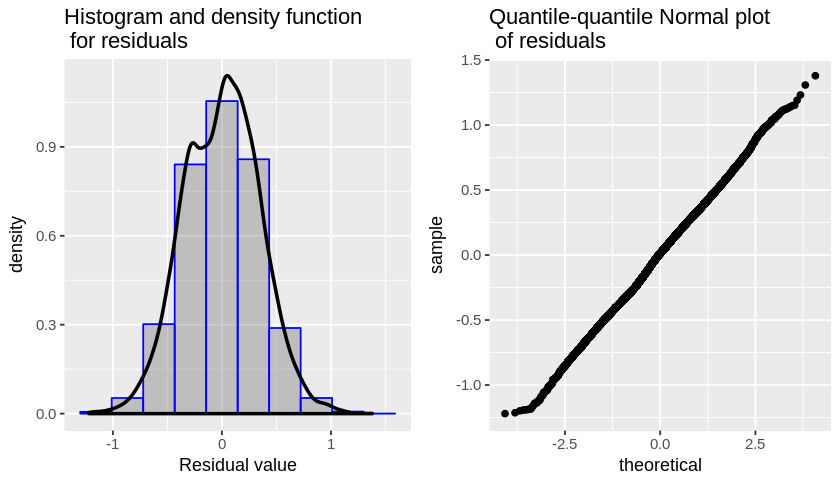

In [46]:
# Visualize the properties of the residuals
plot.resids <- function(df){
  require(ggplot2)
  require(gridExtra)  #Functions for "Grid" Graphics
  p1 = ggplot(df, aes(resids, ..density..)) + 
         geom_histogram(bins = 10, alpha = 0.3, color = 'blue') +
         geom_density(size = 1) +
         xlab('Residual value') +
         ggtitle('Histogram and density function \n for residuals')
  p2 = ggplot(df, aes(sample = resids)) + 
         geom_qq() + 
         ggtitle('Quantile-quantile Normal plot \n of residuals')
  grid.arrange(p1, p2, ncol = 2)  
}
options(repr.plot.width=7, repr.plot.height=4) ## set the plot area size
plot.resids(house_new)

`geom_smooth()` using method = 'gam'


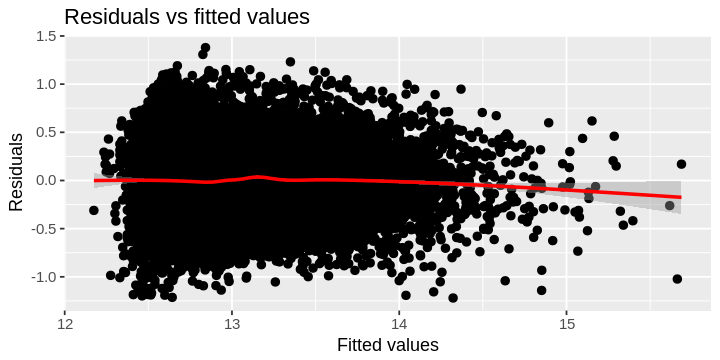

In [47]:
scatter.resids <- function(df){
  require(ggplot2)
  ggplot(df, aes(score, resids)) + 
    geom_point(size = 2) +
    geom_smooth(size = 1, color = 'red') +
    ggtitle('Residuals vs fitted values') +
    xlab('Fitted values') + ylab('Residuals')
}
options(repr.plot.width=6, repr.plot.height=3) ## set the plot area size
scatter.resids(house_new)

<div class="alert alert-block alert-info">Examine these plots. Do these residuals appear to be approximately Normally distributed and why? </div>
    Yes. The residuals are nearly normally distributed because all the points fall close to a straight line.

Another important properties of residuals is that they are homoscedastic. Use ggplot2 to create a plot of the residuals vs. the scored (predicted) values. **Hint** Make sure you include a loess trend line on your plot with `geom_smooth`. 

<div class="alert alert-block alert-info">Are these residuals homoscedastic or heteroscedastic and why? </div>
    Yes.  They are homoscedastic. The distribution of the residuals is fairly constant with the fitted values. Also, the loess line is close to 0 and nearly straight. These conditions indicate that the residuals are homoscedastic and our model is a good fit.

## Summary

In this challenge you have done the following:
- Loaded the data set on the prices and features of homes in King County, Washington USA.
- Perform some transformations on the label and features in the data set.
- Used visualizations to explore the relationships in the data set.
- Used summary statistics and hypothesis tests to verify some relationships in the data.
- Created and evaluated a linear regression model to predict the price of homes. 

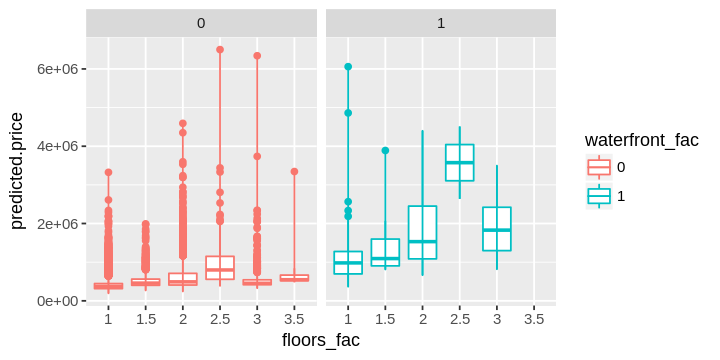

In [48]:
house_new %>% ggplot(aes(x=floors_fac, y=predicted.price,color=waterfront_fac)) + 
   geom_boxplot() + 
   geom_line()+ 
facet_wrap(~waterfront_fac)

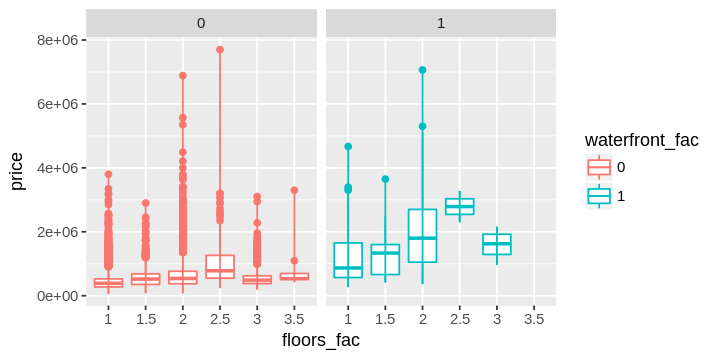

In [49]:
house %>% ggplot(aes(x=floors_fac, y=price,color=waterfront_fac)) + 
   geom_boxplot() + 
   geom_line()+ 
facet_wrap(~waterfront_fac)

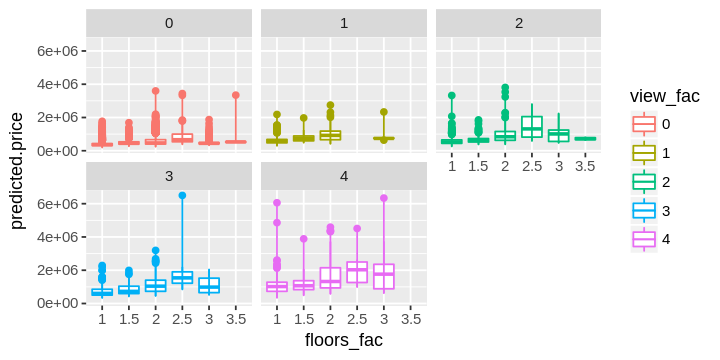

In [50]:
house_new %>% ggplot(aes(x=floors_fac, y=predicted.price,color=view_fac)) + 
   geom_boxplot() + 
   geom_line()+ 
facet_wrap(~view_fac)

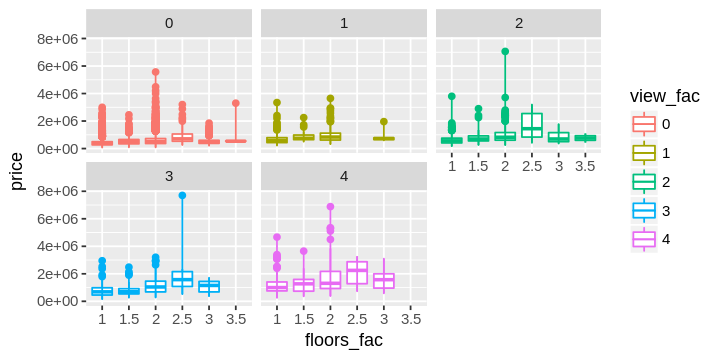

In [51]:
house %>% ggplot(aes(x=floors_fac, y=price,color=view_fac)) + 
   geom_boxplot() + 
   geom_line()+ 
facet_wrap(~view_fac)

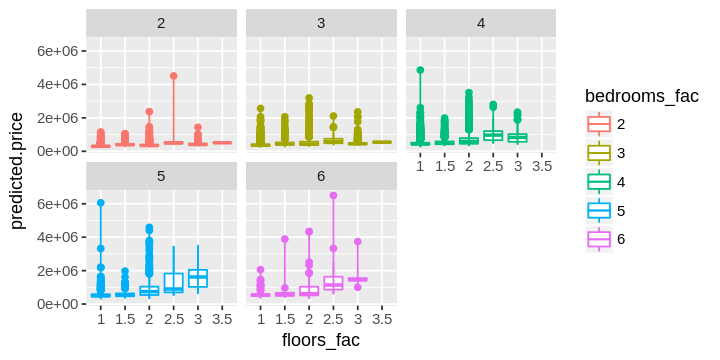

In [52]:
house_new %>% filter(bedrooms_fac %in% c("2","3","4","5","6")) %>%
   ggplot(aes(x=floors_fac, y=predicted.price,color=bedrooms_fac)) + 
   geom_boxplot() + 
   geom_line()+ 
facet_wrap(~bedrooms_fac)

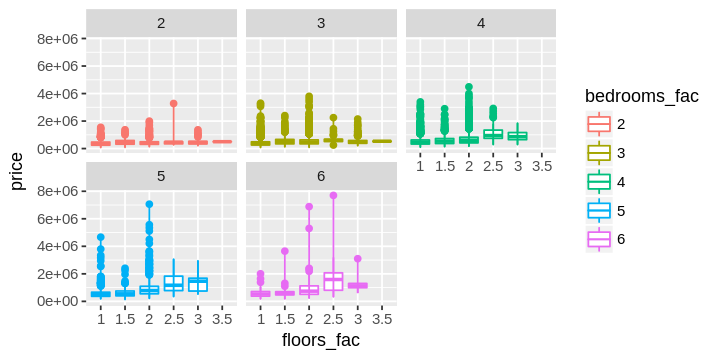

In [53]:
house %>% filter(bedrooms_fac %in% c("2","3","4","5","6")) %>%
   ggplot(aes(x=floors_fac, y=price,color=bedrooms_fac)) + 
   geom_boxplot() + 
   geom_line()+ 
facet_wrap(~bedrooms_fac)

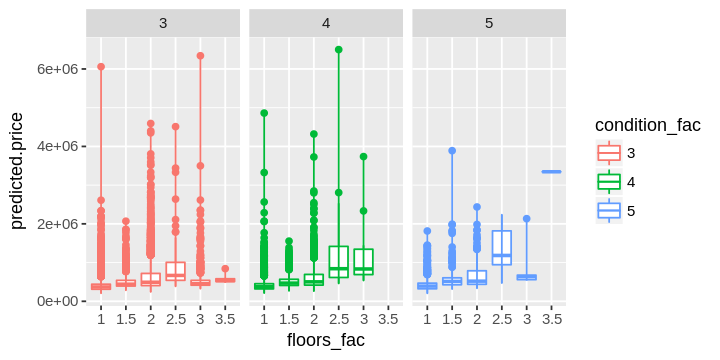

In [54]:
house_new %>% 
   filter(condition_fac %in% c("3","4","5")) %>%
   ggplot(aes(x=floors_fac, y=predicted.price,color=condition_fac)) + 
   geom_boxplot() + 
   geom_line()+ 
facet_wrap(~condition_fac)

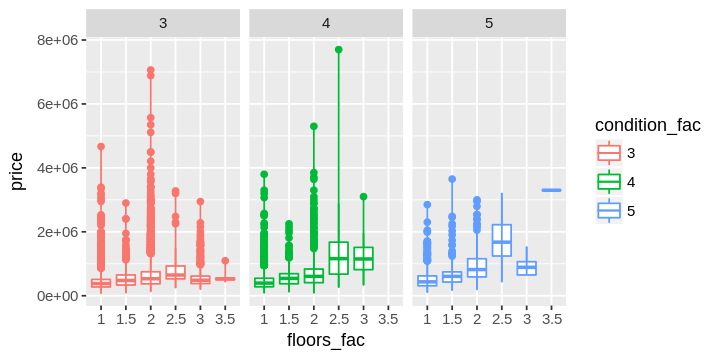

In [55]:
house %>% 
   filter(condition_fac %in% c("3","4","5")) %>%
   ggplot(aes(x=floors_fac, y=price,color=condition_fac)) + 
   geom_boxplot() + 
   geom_line()+ 
facet_wrap(~condition_fac)

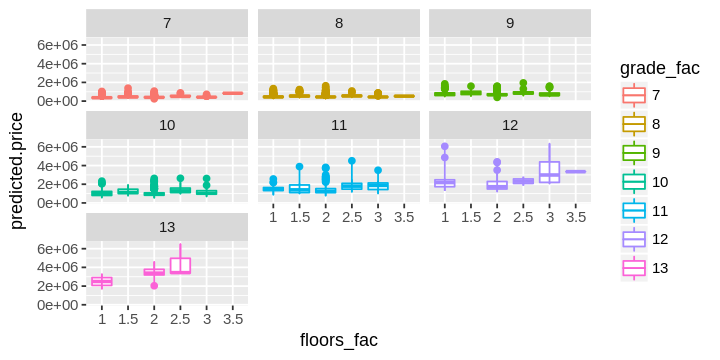

In [56]:
house_new %>% 
   filter(grade_fac %in% c("7","8","9","10","11","12","13")) %>%
   ggplot(aes(x=floors_fac, y=predicted.price,color=grade_fac)) + 
   geom_boxplot() + 
   geom_line()+ 
facet_wrap(~grade_fac)

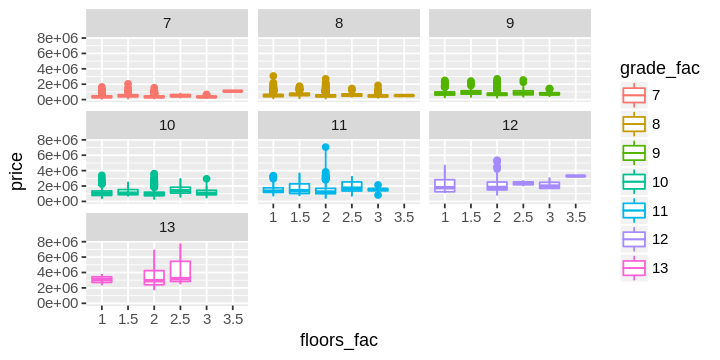

In [57]:
house %>% 
   filter(grade_fac %in% c("7","8","9","10","11","12","13")) %>%
   ggplot(aes(x=floors_fac, y=price,color=grade_fac)) + 
   geom_boxplot() + 
   geom_line()+ 
facet_wrap(~grade_fac)

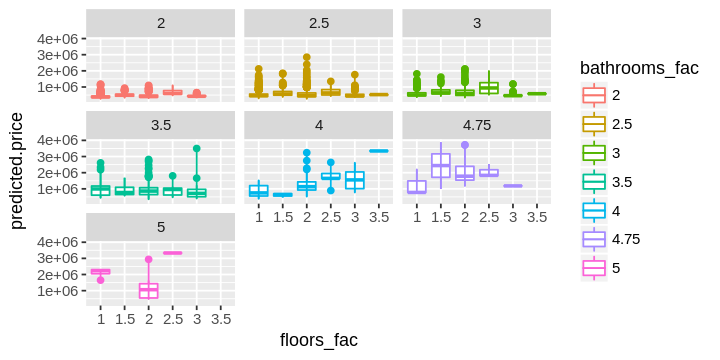

In [58]:
house_new %>% 
   filter(bathrooms_fac %in% c("2","2.5","3","3.5","4","4,5","4.75", "5")) %>%
   ggplot(aes(x=floors_fac, y=predicted.price,color=bathrooms_fac)) + 
   geom_boxplot() + 
   geom_line()+ 
facet_wrap(~bathrooms_fac)

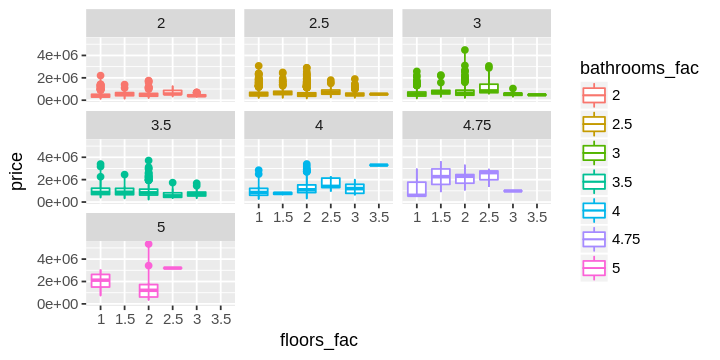

In [59]:
house %>% 
   filter(bathrooms_fac %in% c("2","2.5","3","3.5","4","4,5","4.75","5")) %>%
   ggplot(aes(x=floors_fac, y=price,color=bathrooms_fac)) + 
   geom_boxplot() + 
   geom_line()+ 
facet_wrap(~bathrooms_fac)

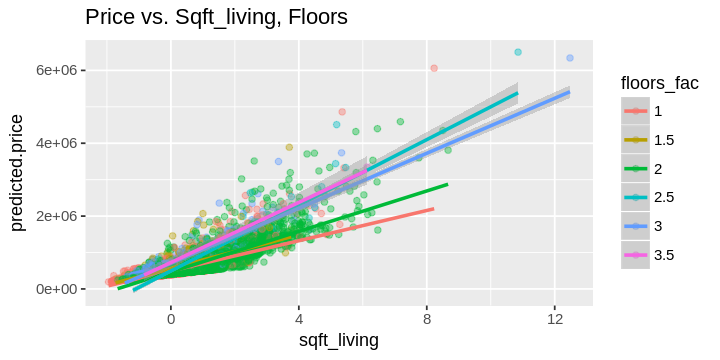

In [60]:
house_new %>% ggplot(mapping = aes(x = sqft_living, 
    y = predicted.price, color = floors_fac)) +
    geom_jitter(alpha = 0.4) +
    geom_smooth(method = "lm") +
    labs(title = "Price vs. Sqft_living, Floors")

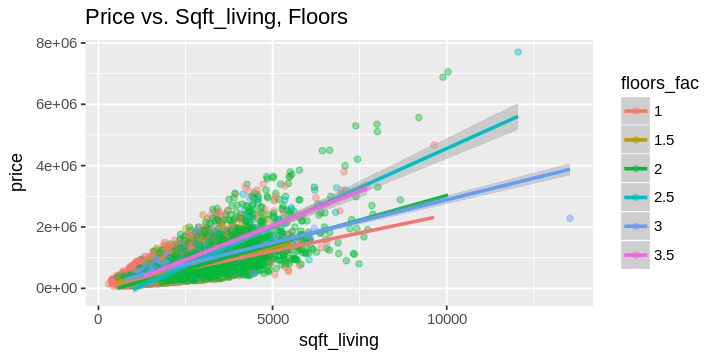

In [61]:
house %>% ggplot(mapping = aes(x = sqft_living, 
    y = price, color = floors_fac)) +
    geom_jitter(alpha = 0.4) +
    geom_smooth(method = "lm") +
    labs(title = "Price vs. Sqft_living, Floors")